## MCS Benchmark Dataset
* B-associated Signal.
* Four background processes: DY, TTbar, ST, Diboson.

In [1]:
import os
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from script import free_mem
from script import utils, cms
from script.datasets import Benchmark

from typing import List, Tuple, Dict, Union

%matplotlib inline
sns.set()

In [2]:
# for debugging, comment if not needed
%load_ext autoreload
%autoreload 2

# %reload_ext autoreload

In [3]:
utils.set_random_seed(42)

Random seed 42 set.


### Data Preparation & Cleaning
Signal:

In [4]:
s = pd.read_csv('data/mcs/signal_bassociated_cat1.csv', dtype=np.float32)

print(s.shape)
s.columns

(533777, 23)


Index(['mA', 'dimuon_deltar', 'dimuon_deltaphi', 'dimuon_deltaeta', 'dimuon_M',
       'dimuon_pt', 'met_pt', 'met_phi', 'met_eta', 'bjet_n', 'bjet_1_pt',
       'bjet_1_eta', 'jetfwd_n', 'ljet_n', 'ljet_1_pt', 'ljet_1_eta',
       'deltar_bjet1_dimuon', 'deltapt_bjet1_dimuon', 'deltaeta_bjet1_dimuon',
       'deltaphi_bjet1_dimuon', 'PU_Weight', 'weight', 'type'],
      dtype='object')

In [5]:
# rename column "dimuon_M"
s.rename(columns={'dimuon_M': 'dimuon_mass'}, inplace=True)
s.columns

Index(['mA', 'dimuon_deltar', 'dimuon_deltaphi', 'dimuon_deltaeta',
       'dimuon_mass', 'dimuon_pt', 'met_pt', 'met_phi', 'met_eta', 'bjet_n',
       'bjet_1_pt', 'bjet_1_eta', 'jetfwd_n', 'ljet_n', 'ljet_1_pt',
       'ljet_1_eta', 'deltar_bjet1_dimuon', 'deltapt_bjet1_dimuon',
       'deltaeta_bjet1_dimuon', 'deltaphi_bjet1_dimuon', 'PU_Weight', 'weight',
       'type'],
      dtype='object')

In [6]:
s['met_eta'].unique()

array([-999.], dtype=float32)

In [7]:
# keep only these columns
columns = ['mA', 'dimuon_deltar', 'dimuon_deltaphi', 'dimuon_deltaeta', 'dimuon_mass',
           'dimuon_pt', 'met_pt', 'met_phi', 'bjet_n', 'bjet_1_pt',
           'bjet_1_eta', 'jetfwd_n', 'ljet_n', 'ljet_1_pt', 'ljet_1_eta',
           'deltar_bjet1_dimuon', 'deltapt_bjet1_dimuon', 'deltaeta_bjet1_dimuon',
           'deltaphi_bjet1_dimuon', 'weight', 'type']

s = s[columns]
s.columns

Index(['mA', 'dimuon_deltar', 'dimuon_deltaphi', 'dimuon_deltaeta',
       'dimuon_mass', 'dimuon_pt', 'met_pt', 'met_phi', 'bjet_n', 'bjet_1_pt',
       'bjet_1_eta', 'jetfwd_n', 'ljet_n', 'ljet_1_pt', 'ljet_1_eta',
       'deltar_bjet1_dimuon', 'deltapt_bjet1_dimuon', 'deltaeta_bjet1_dimuon',
       'deltaphi_bjet1_dimuon', 'weight', 'type'],
      dtype='object')

In [8]:
s.shape

(533777, 21)

Background:

In [4]:
b = pd.read_csv('data/mcs/background_cat1.csv', dtype=None)

print(b.shape)
b.columns

(814694, 24)


Index(['mA', 'dimuon_deltar', 'dimuon_deltaphi', 'dimuon_deltaeta', 'dimuon_M',
       'dimuon_pt', 'met_pt', 'met_phi', 'met_eta', 'bjet_n', 'bjet_1_pt',
       'bjet_1_eta', 'jetfwd_n', 'ljet_n', 'ljet_1_pt', 'ljet_1_eta',
       'deltar_bjet1_dimuon', 'deltapt_bjet1_dimuon', 'deltaeta_bjet1_dimuon',
       'deltaphi_bjet1_dimuon', 'PU_Weight', 'weight', 'bkg_name', 'type'],
      dtype='object')

In [5]:
# rename columns
b.rename(columns={'dimuon_M': 'dimuon_mass', 'bkg_name': 'name'}, inplace=True)
b.columns

Index(['mA', 'dimuon_deltar', 'dimuon_deltaphi', 'dimuon_deltaeta',
       'dimuon_mass', 'dimuon_pt', 'met_pt', 'met_phi', 'met_eta', 'bjet_n',
       'bjet_1_pt', 'bjet_1_eta', 'jetfwd_n', 'ljet_n', 'ljet_1_pt',
       'ljet_1_eta', 'deltar_bjet1_dimuon', 'deltapt_bjet1_dimuon',
       'deltaeta_bjet1_dimuon', 'deltaphi_bjet1_dimuon', 'PU_Weight', 'weight',
       'name', 'type'],
      dtype='object')

In [6]:
b['met_eta'].unique()

array([-999.])

In [7]:
# keep only these columns
b_columns = ['mA', 'dimuon_deltar', 'dimuon_deltaphi', 'dimuon_deltaeta',
             'dimuon_mass', 'dimuon_pt', 'met_pt', 'met_phi', 'bjet_n',
             'bjet_1_pt', 'bjet_1_eta', 'jetfwd_n', 'ljet_n', 'ljet_1_pt',
             'ljet_1_eta', 'deltar_bjet1_dimuon', 'deltapt_bjet1_dimuon',
             'deltaeta_bjet1_dimuon', 'deltaphi_bjet1_dimuon', 'weight',
             'name', 'type']

b = b[b_columns]
print(b.shape)

(814694, 22)


In [8]:
b['name'].unique()

array(['ST_t-channel_antitop', 'diboson_ZZTo2L2Q', 'DY',
       'diboson_ZZTo2L2Nu', 'ST_s-channel', 'ST_t-channel_top',
       'ST_tW_antitop', 'diboson_WZTo3LNu', 'diboson_WZTo2L2Q',
       'ST_tW_top', 'TTbar', 'diboson_WWTo2L2Nu'], dtype=object)

In [9]:
b['name'].value_counts()

TTbar                   658291
ST_tW_top                44169
ST_tW_antitop            43990
DY                       20354
diboson_ZZTo2L2Q         18544
diboson_ZZTo2L2Nu        12039
diboson_WZTo2L2Q         11235
diboson_WZTo3LNu          4947
diboson_WWTo2L2Nu          788
ST_t-channel_top           187
ST_t-channel_antitop       138
ST_s-channel                12
Name: name, dtype: int64

In [12]:
# aggregate names for background processes
def agg_names(x):
    if 'ST_' in x or 'X' == x:
        return 'ST'
    
    if 'TTbar' in x:
        return 'TTbar'

    if 'diboson_' in x:
        return 'diboson'

    return x

b['name'] = b['name'].apply(agg_names)
b['name'].unique()

array(['ST', 'diboson', 'DY', 'TTbar'], dtype=object)

In [13]:
b['name'].value_counts()

TTbar      658291
ST          88496
diboson     47553
DY          20354
Name: name, dtype: int64

Write to Disk:

In [14]:
# cast backgound to np.float32
mask = (b.dtypes != 'object') & (b.dtypes != 'string')
cast_columns = list(b.dtypes[mask].index)

b[cast_columns] = b[cast_columns].astype(np.float32, copy=False)

In [16]:
# set minimum of 'ljet_1_eta' to -3, instead of -10
for df in [s, b]:
    df.loc[df['ljet_1_eta'] <= -10, 'ljet_1_eta'] = -3.0

In [17]:
s.to_csv('data/benchmark/signal_bassociated.csv', index=False)
b.to_csv('data/benchmark/background.csv', index=False)

---
## Data Exploration
* Feature Distributions (all data)
* Correlation Plots vs mA, mass, class-label (type)

In [4]:
s = pd.read_csv('data/benchmark/signal_bassociated.csv', dtype=None)
b = pd.read_csv('data/benchmark/background.csv', dtype=None)

In [5]:
mass = np.sort(s['mA'].unique())
mass

array([ 110.,  120.,  130.,  140.,  150.,  160.,  170.,  180.,  190.,
        200.,  225.,  250.,  275.,  300.,  350.,  400.,  450.,  500.,
        600.,  700.,  800.,  900., 1000.])

In [6]:
mticks = [110, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]

Data Imbalance:

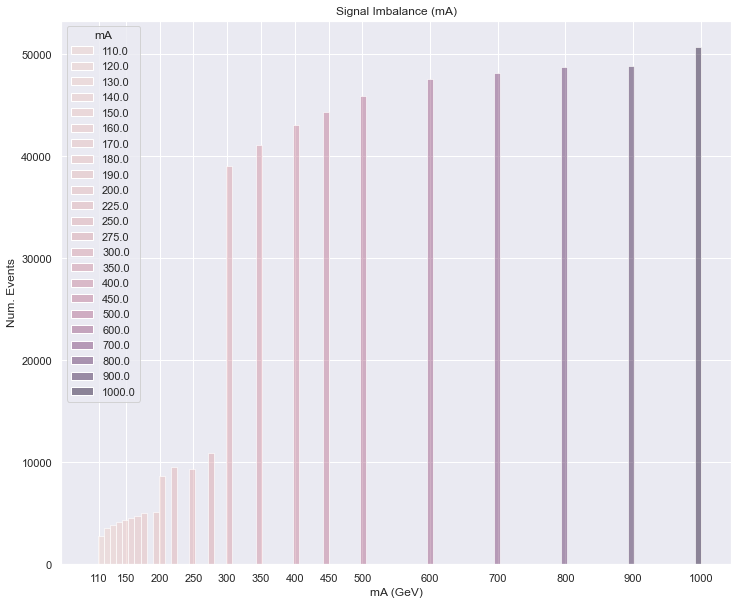

In [83]:
plt.figure(figsize=(12, 10))

sns.histplot(s, x='mA', hue='mA', bins=100, binrange=(100, 1000))

plt.xlabel('mA (GeV)')
plt.ylabel('Num. Events')
plt.title('Signal Imbalance (mA)')

plt.xticks(mticks)
plt.show()

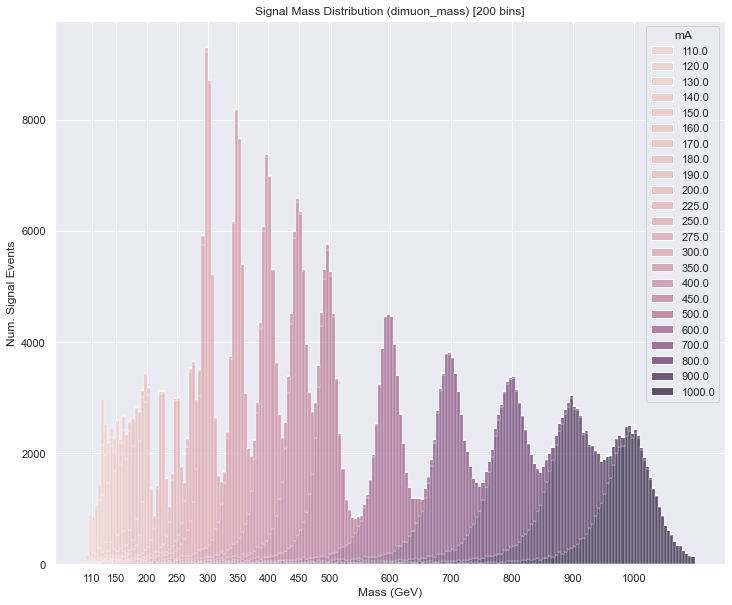

In [98]:
plt.figure(figsize=(12, 10))

sns.histplot(s, x='dimuon_mass', hue='mA', bins=200, binrange=(100, 1100),
             multiple='stack')

plt.xlabel('Mass (GeV)')
plt.ylabel('Num. Signal Events')
plt.title('Signal Mass Distribution (dimuon_mass) [200 bins]')

plt.xticks(mticks)
plt.show()

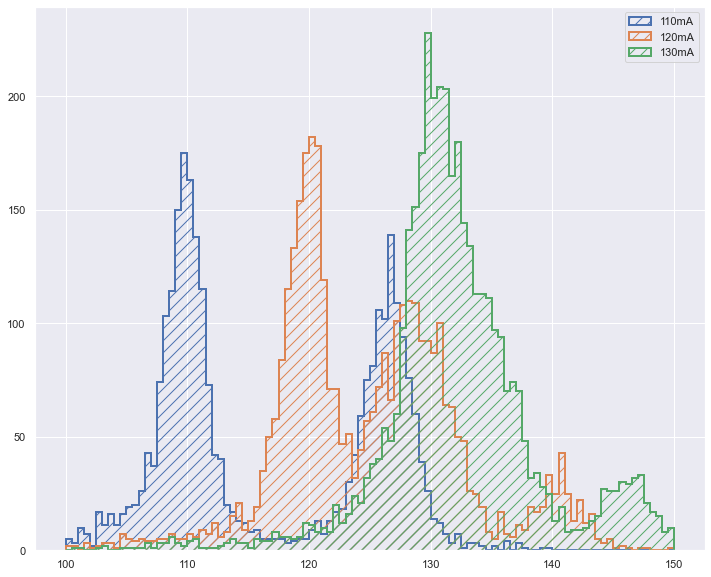

In [33]:
plt.figure(figsize=(12, 10))

for m in [110, 120, 130]:
    plt.hist(s[s['mA'] == m]['dimuon_mass'], label=f'{int(m)}mA', bins=100, 
             range=(100, 150), histtype='step', hatch='//', linewidth=2)

plt.legend()
plt.show()

In [39]:
def plot_intervals(signal, bkg, intervals: list, width=0.8, **kwargs):
    mass = np.sort(s['mA'].unique())
    
    a = width
    b = 1 + (1 - a)
    
    if isinstance(intervals, list):
        intervals = [intervals]
    
    for i, m in enumerate(mass):
        axes = utils.get_plot_axes(rows=1, cols=len(intervals), **kwargs)
        
        for j, intervals_ in enumerate(intervals):
            low, up = intervals_[i]
            ax = axes[j]
            
            ax.hist(signal[signal['mA'] == m]['dimuon_mass'], label=f'{int(m)}mA', bins=100, 
                    histtype='step', hatch='//', range=(low * a, up * b), linewidth=2)

            ax.axvline(x=low, color='red', linestyle='dashed')
            ax.axvline(x=up, color='red', linestyle='dashed')

            mask = (bkg['dimuon_mass'] >= low) & (bkg['dimuon_mass'] <= up)

            ax.set_xticks([low * a, low, m, up, up * b])
            ax.set_title(f'[{int(m)}mA] #s: {sum(signal["mA"] == m)}; #b: {sum(mask)}' + \
                         r' ($\Delta = {}$)'.format(int(up - low)))
            ax.legend()
        
        plt.tight_layout()
        plt.show()

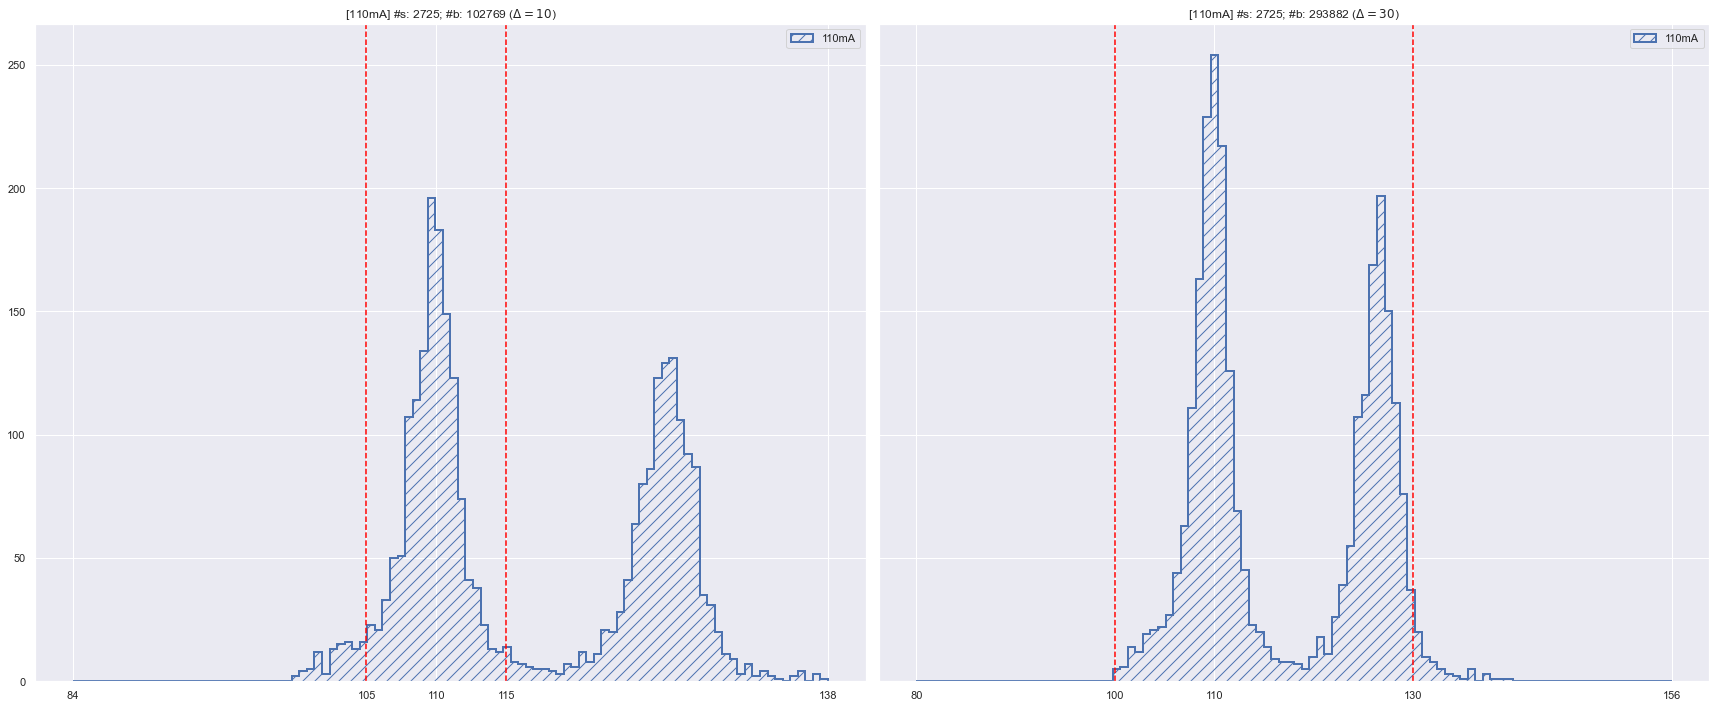

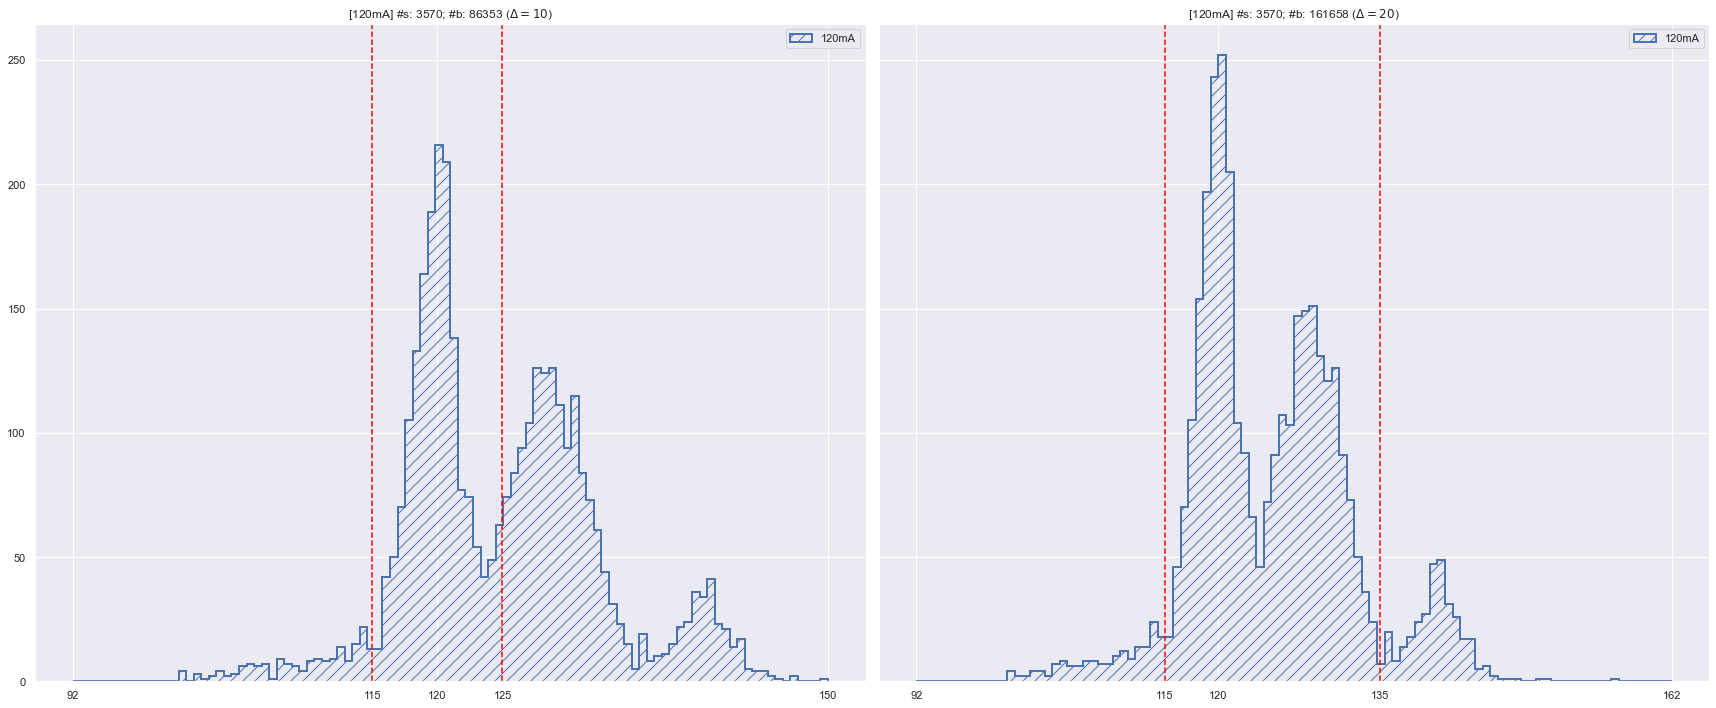

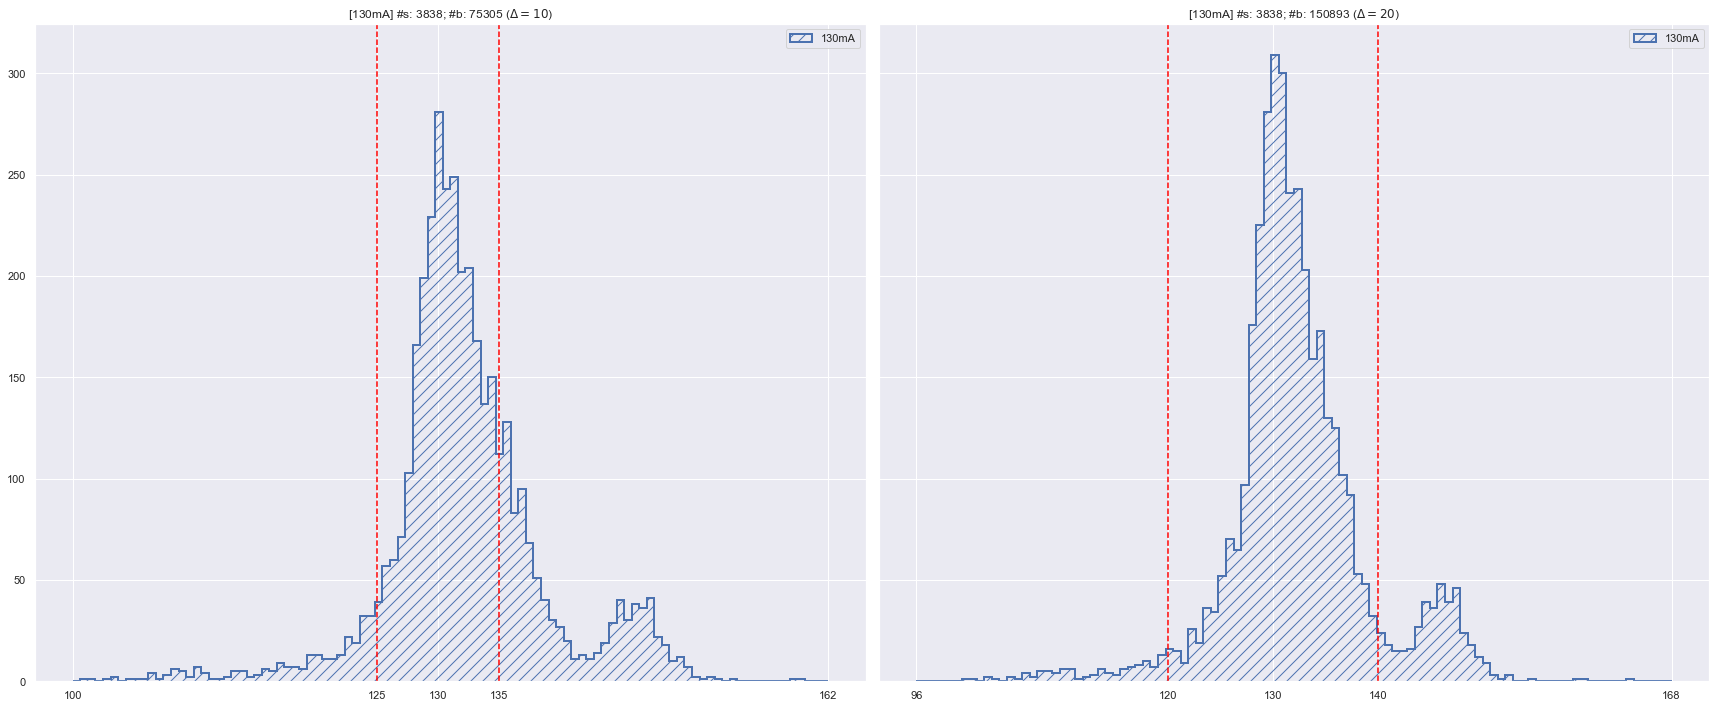

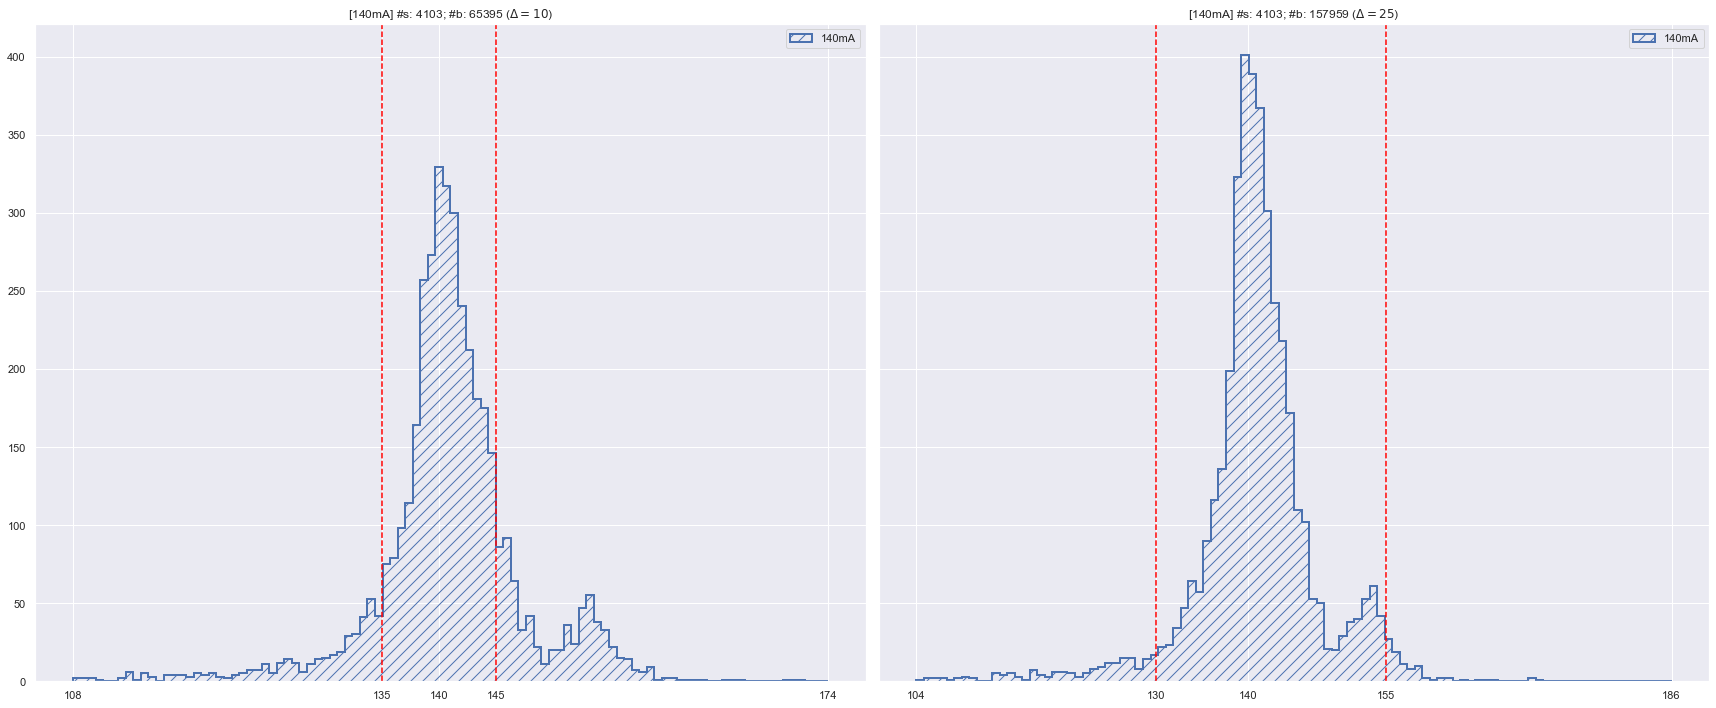

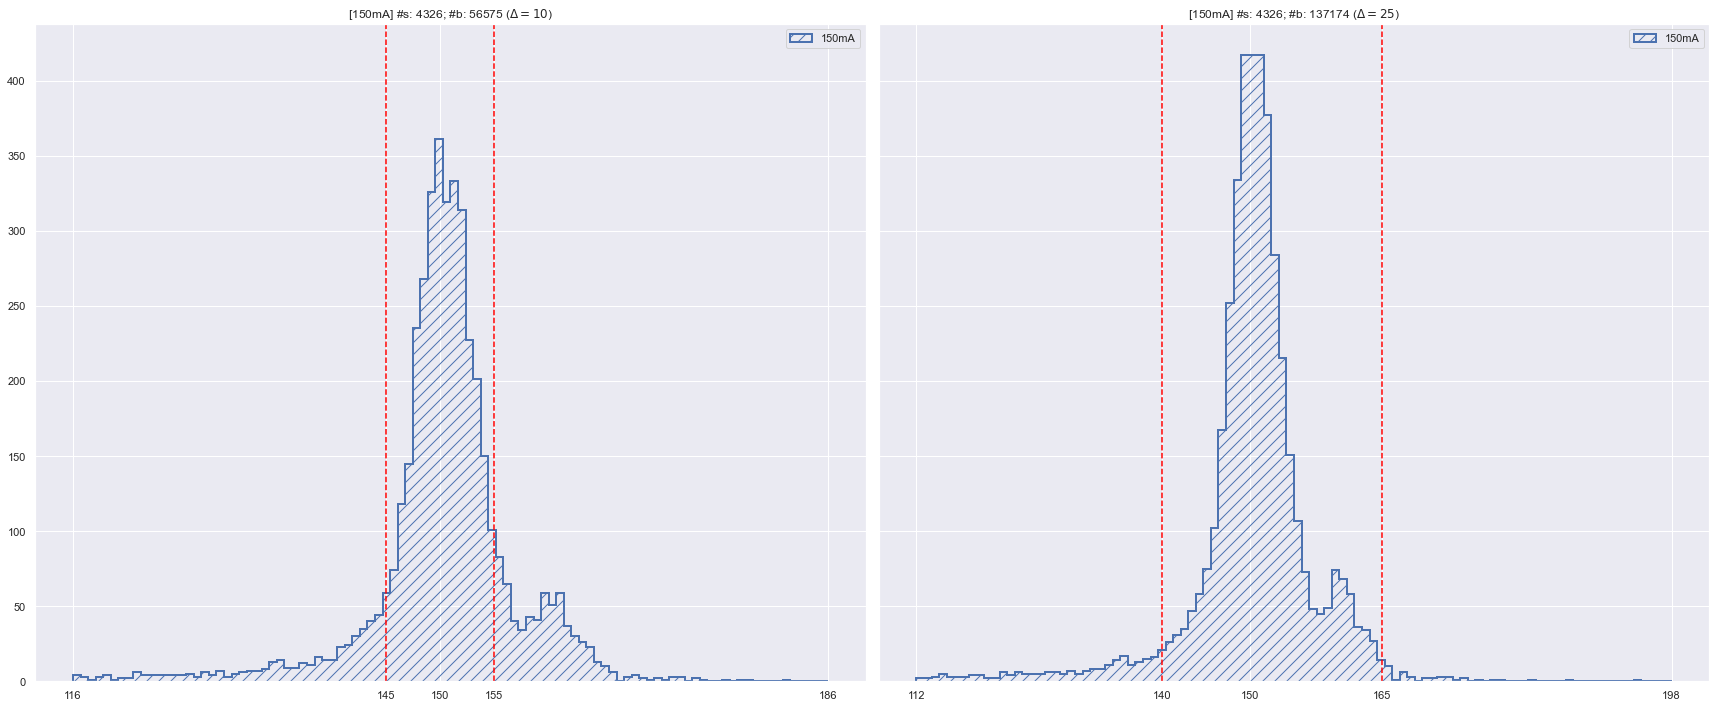

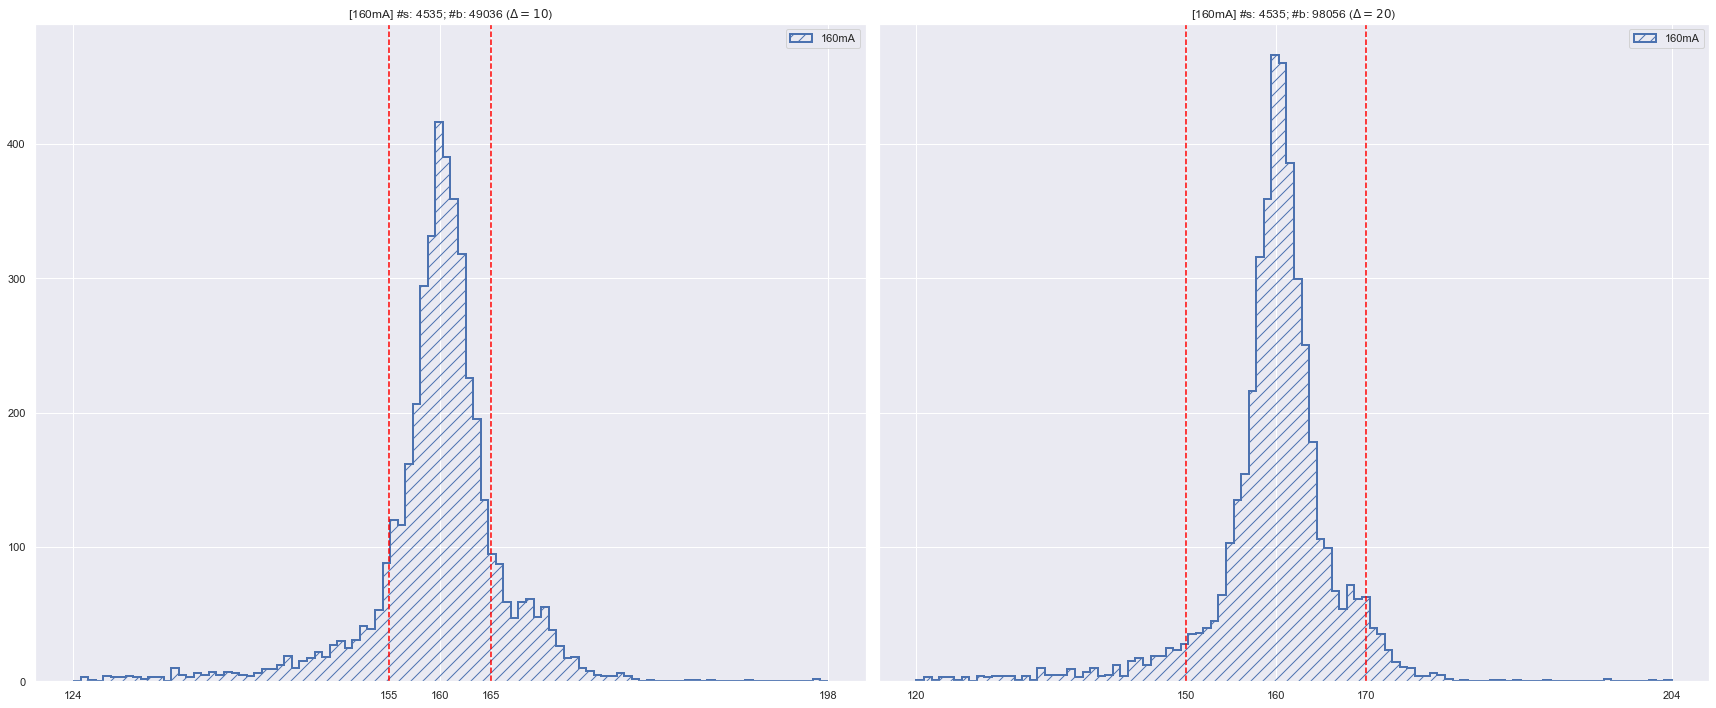

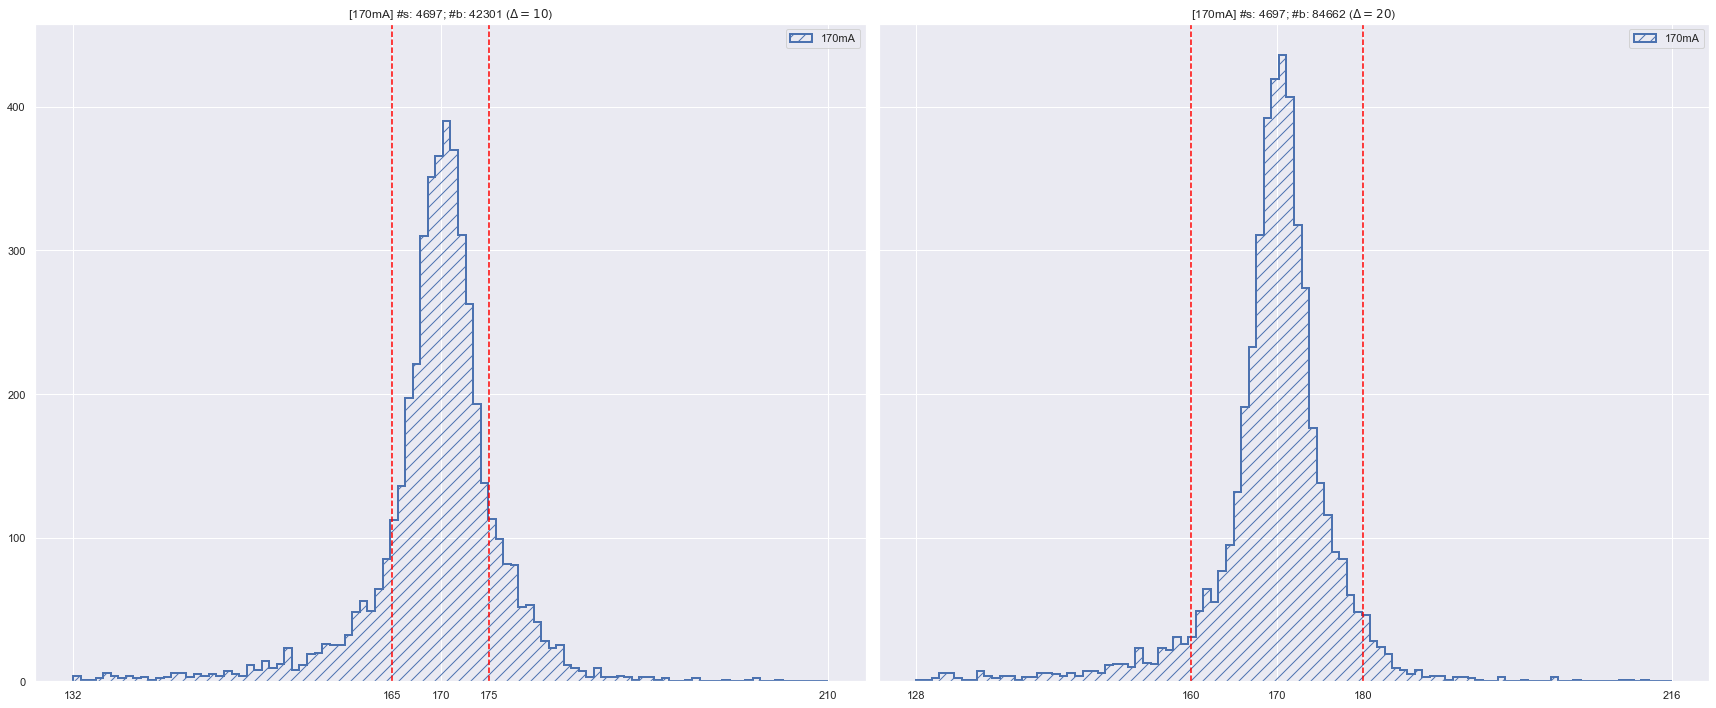

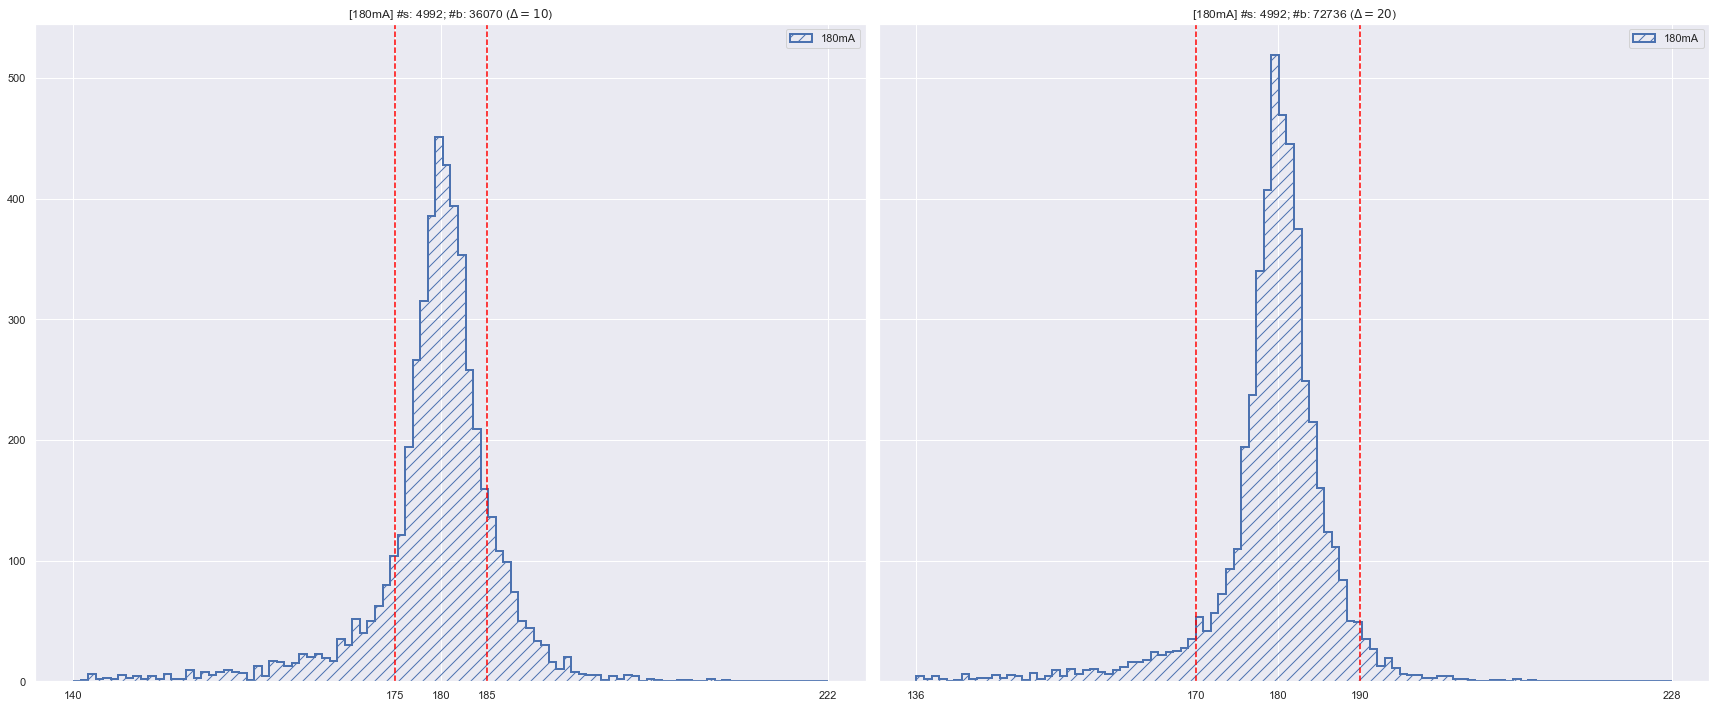

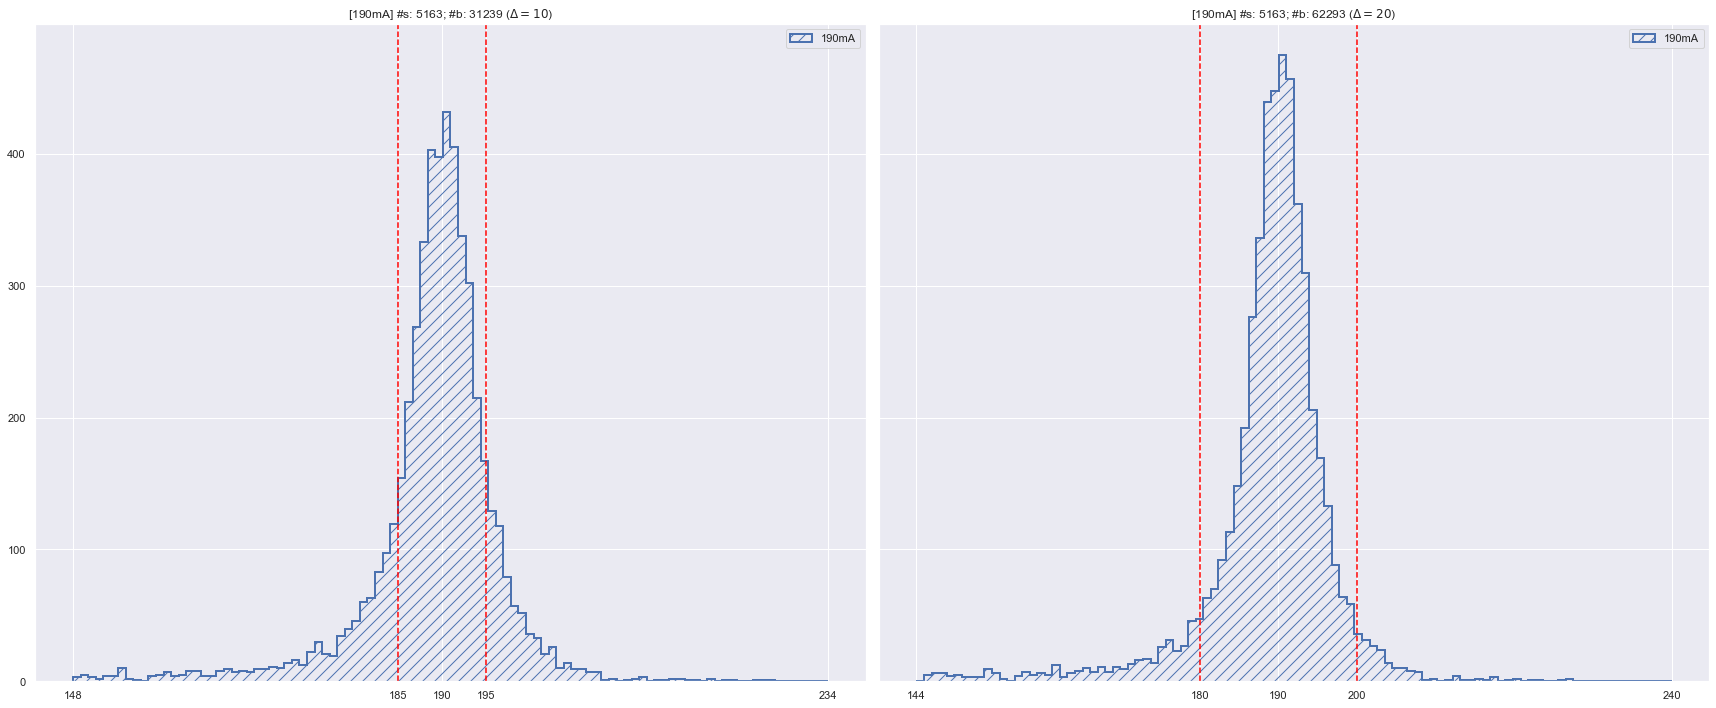

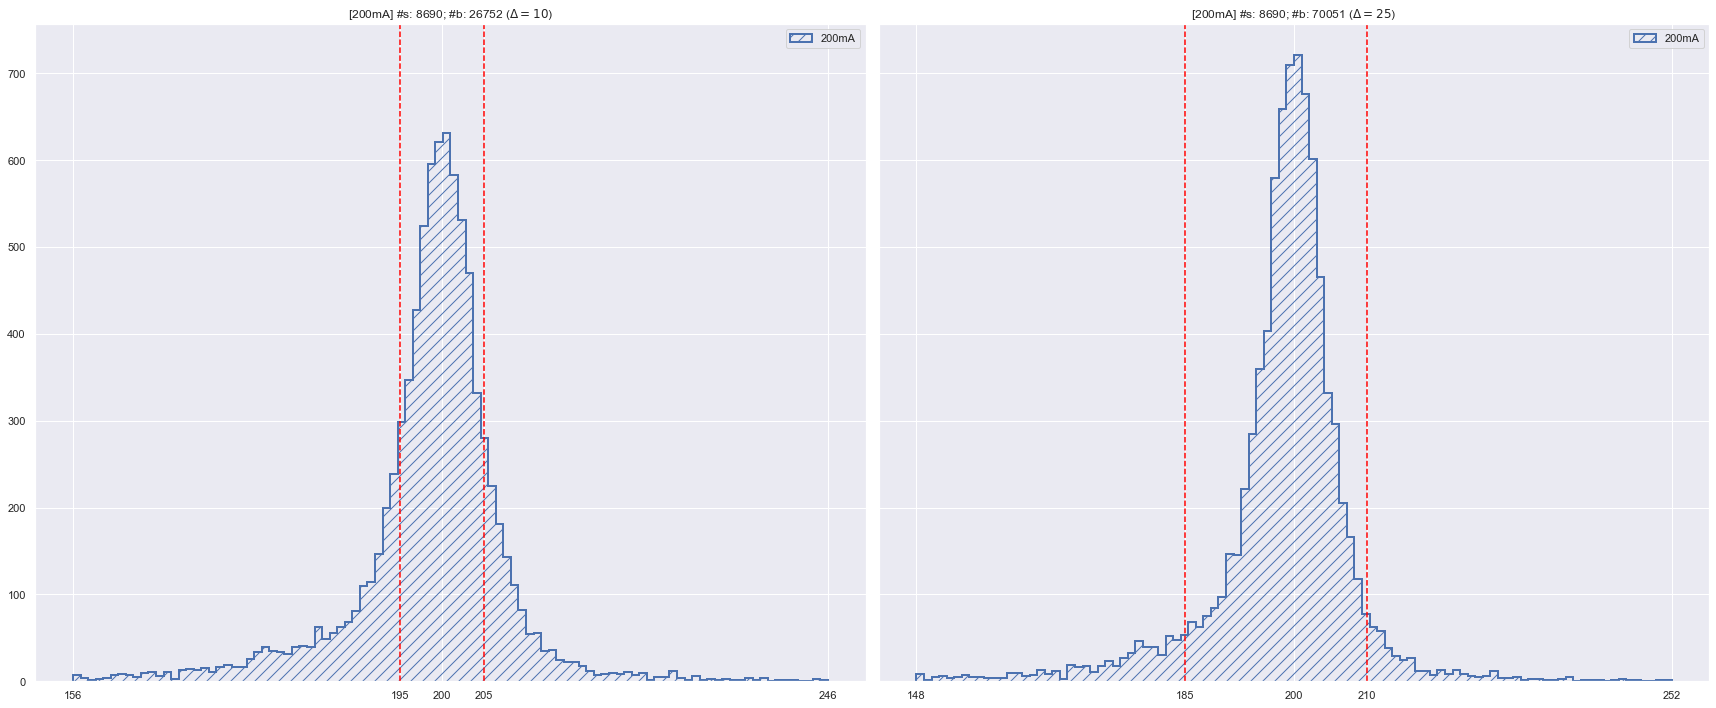

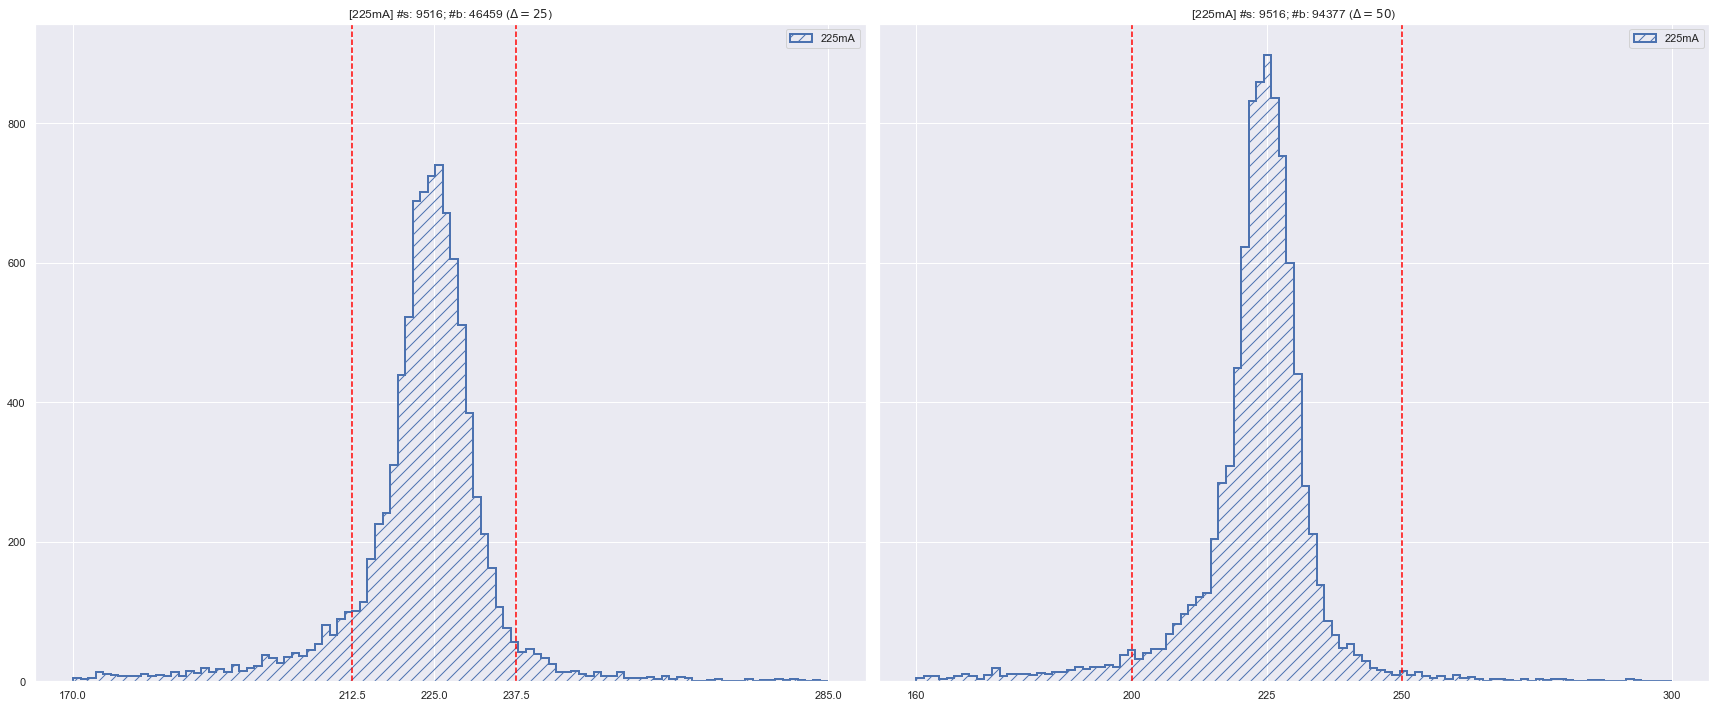

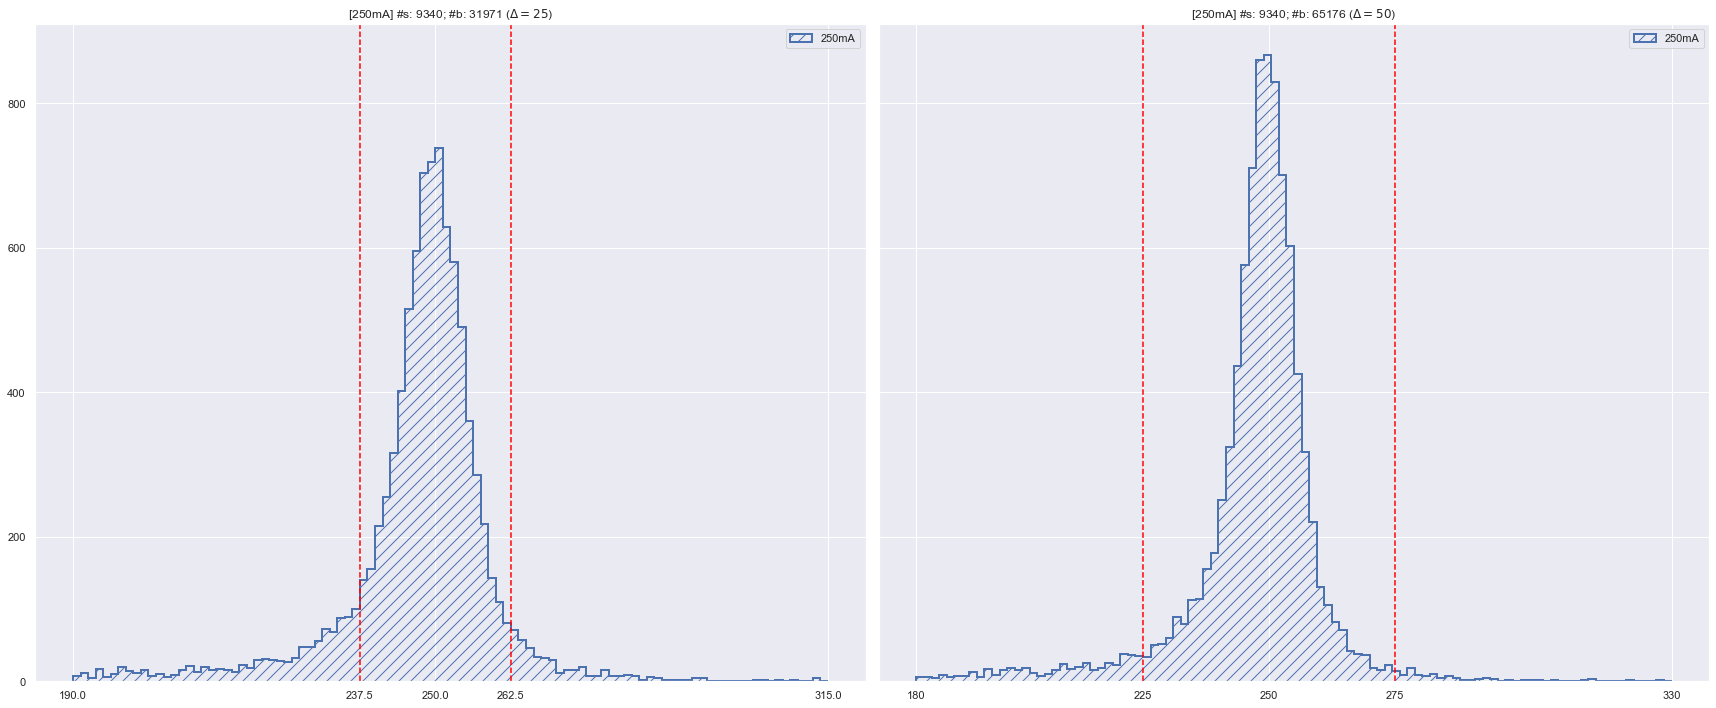

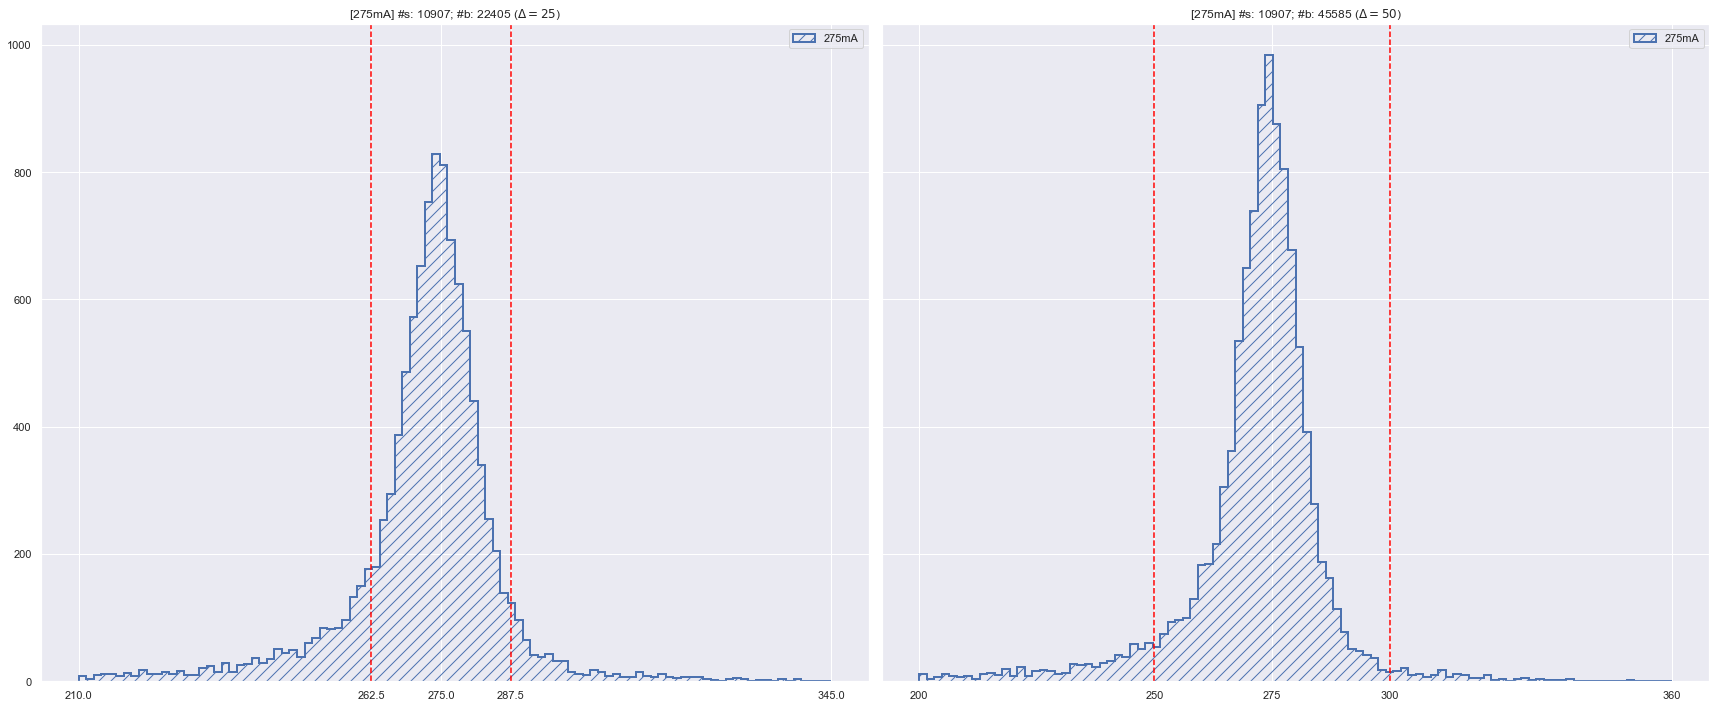

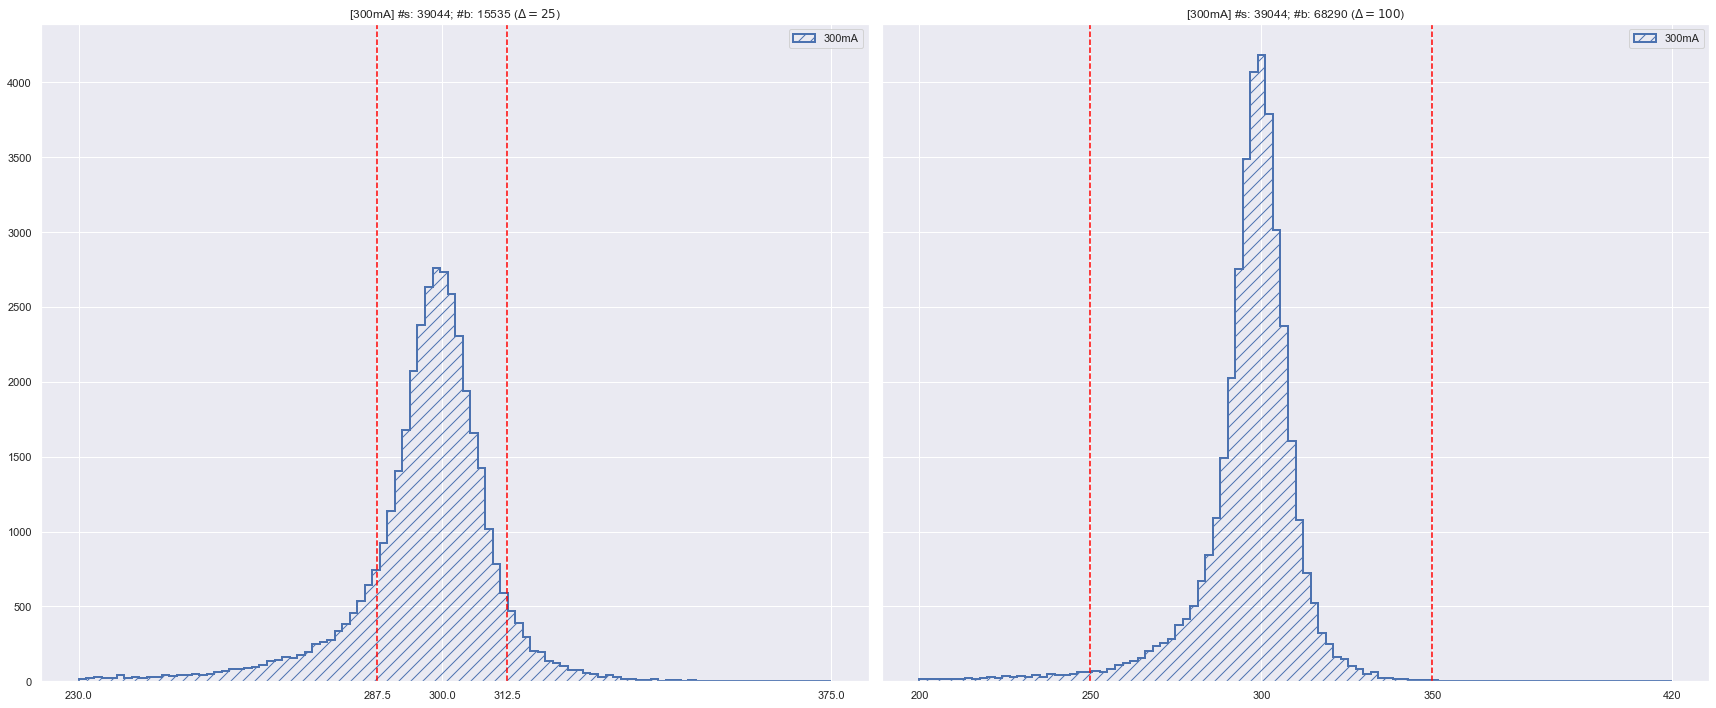

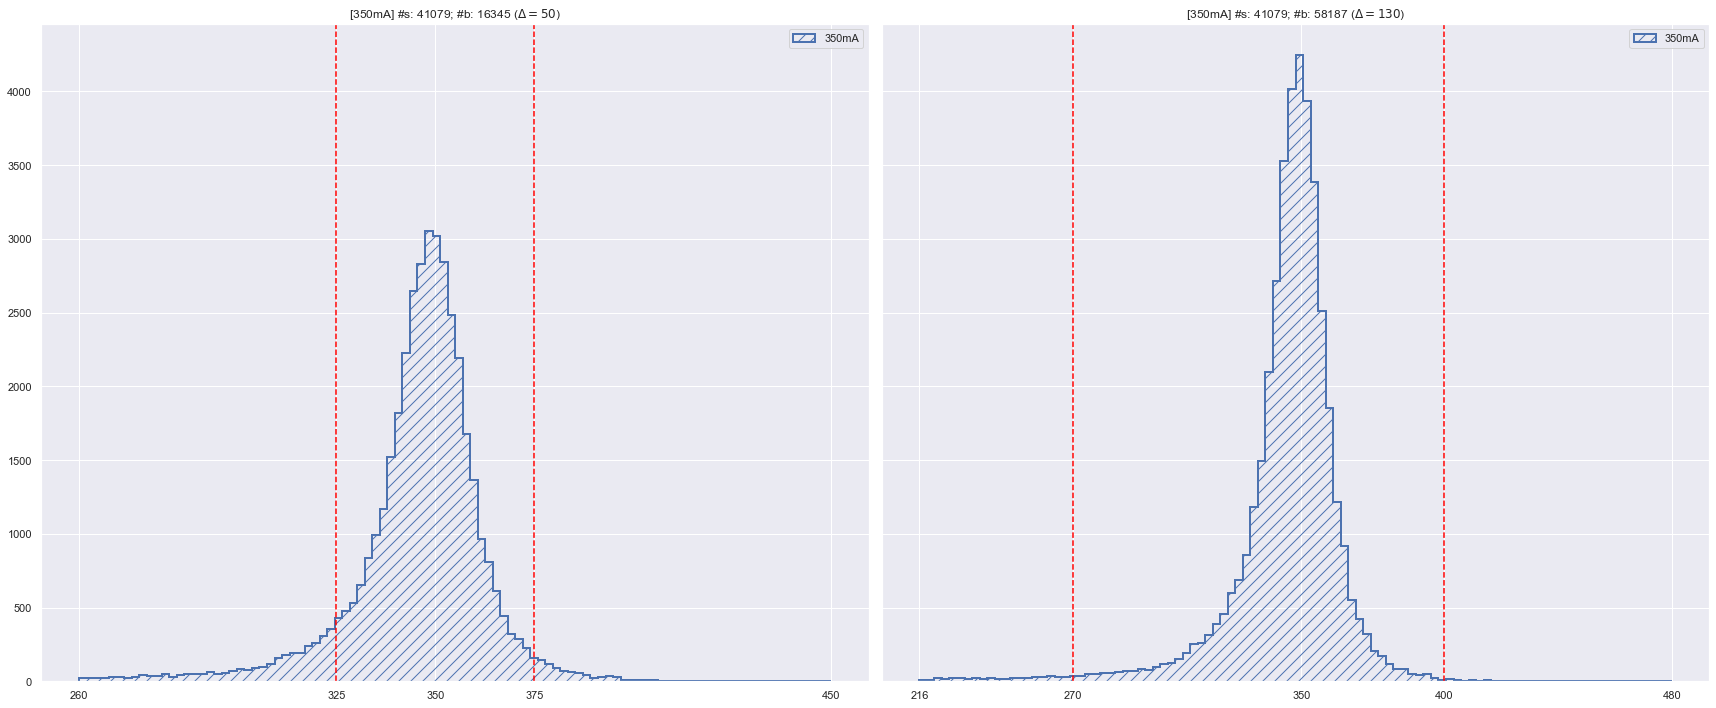

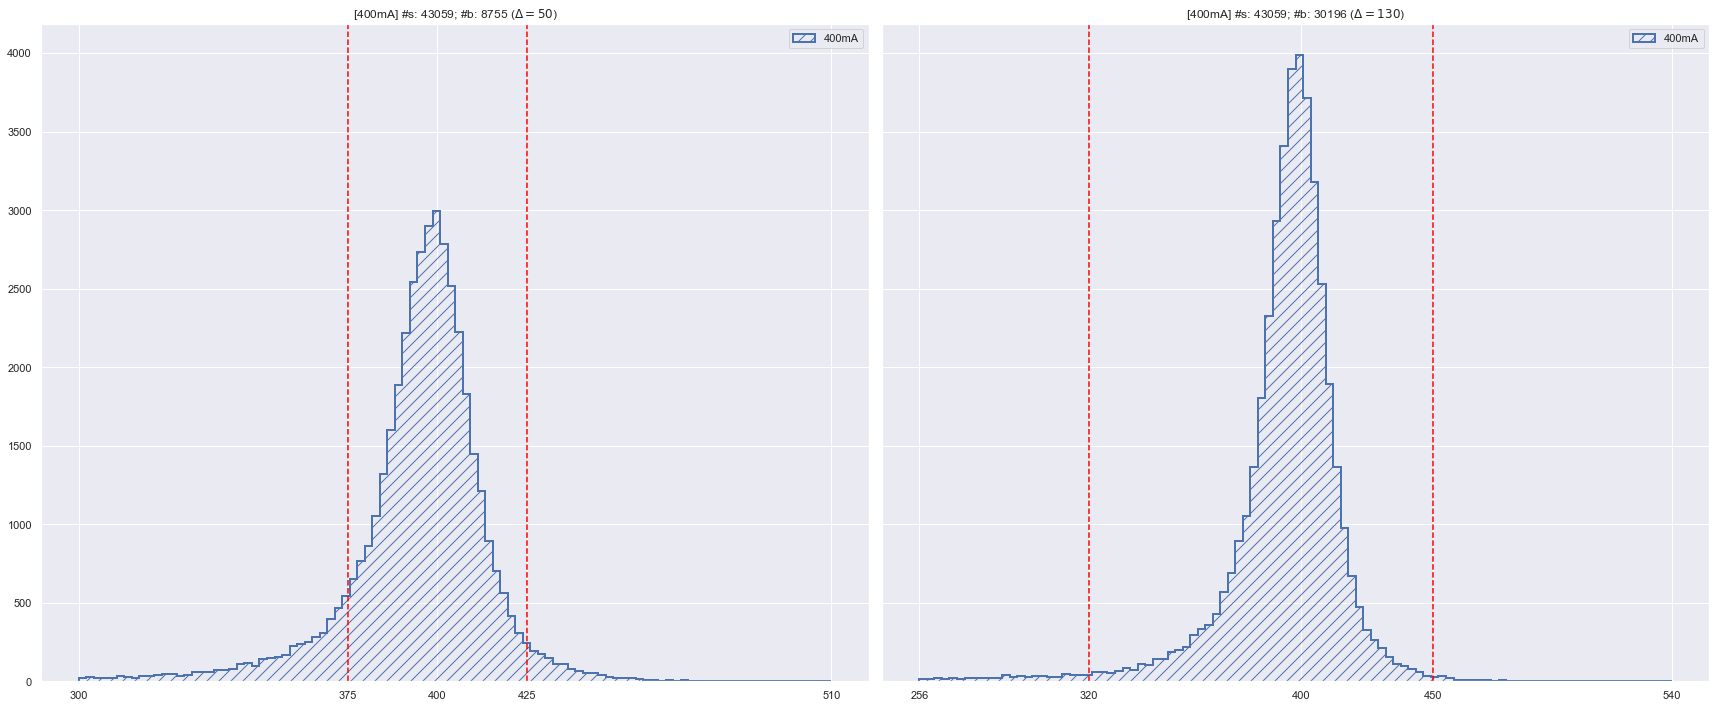

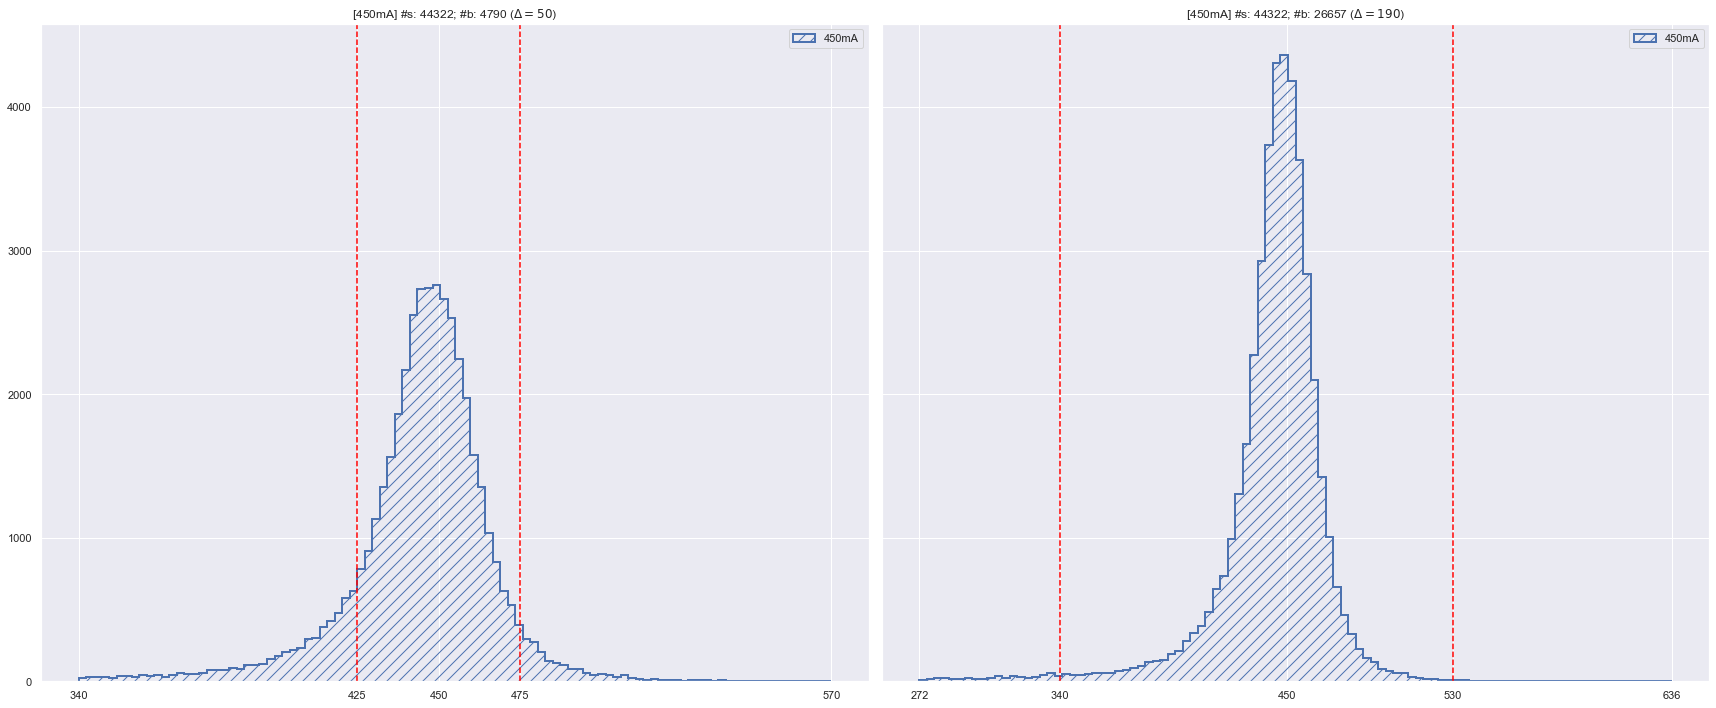

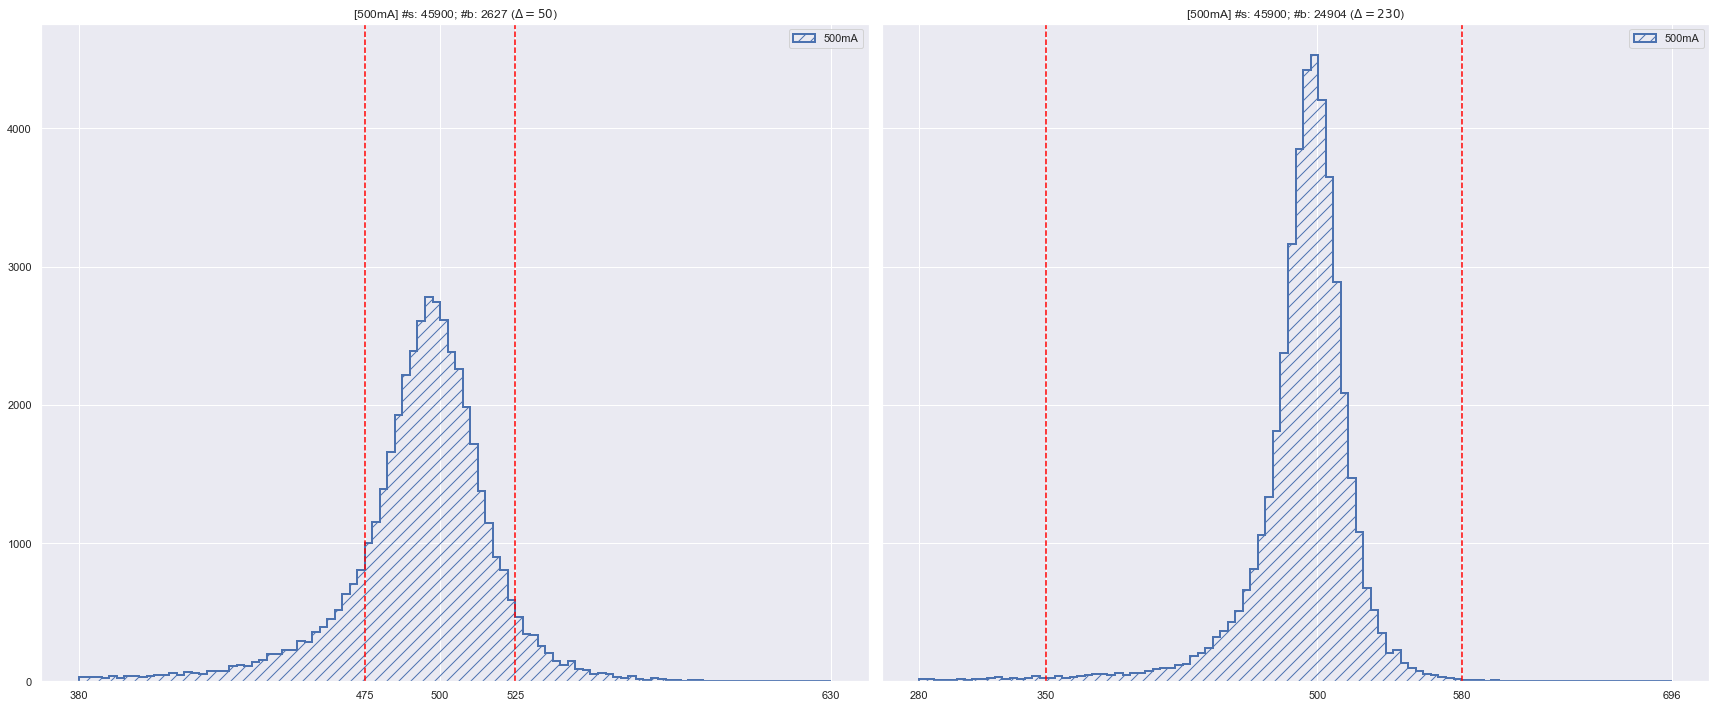

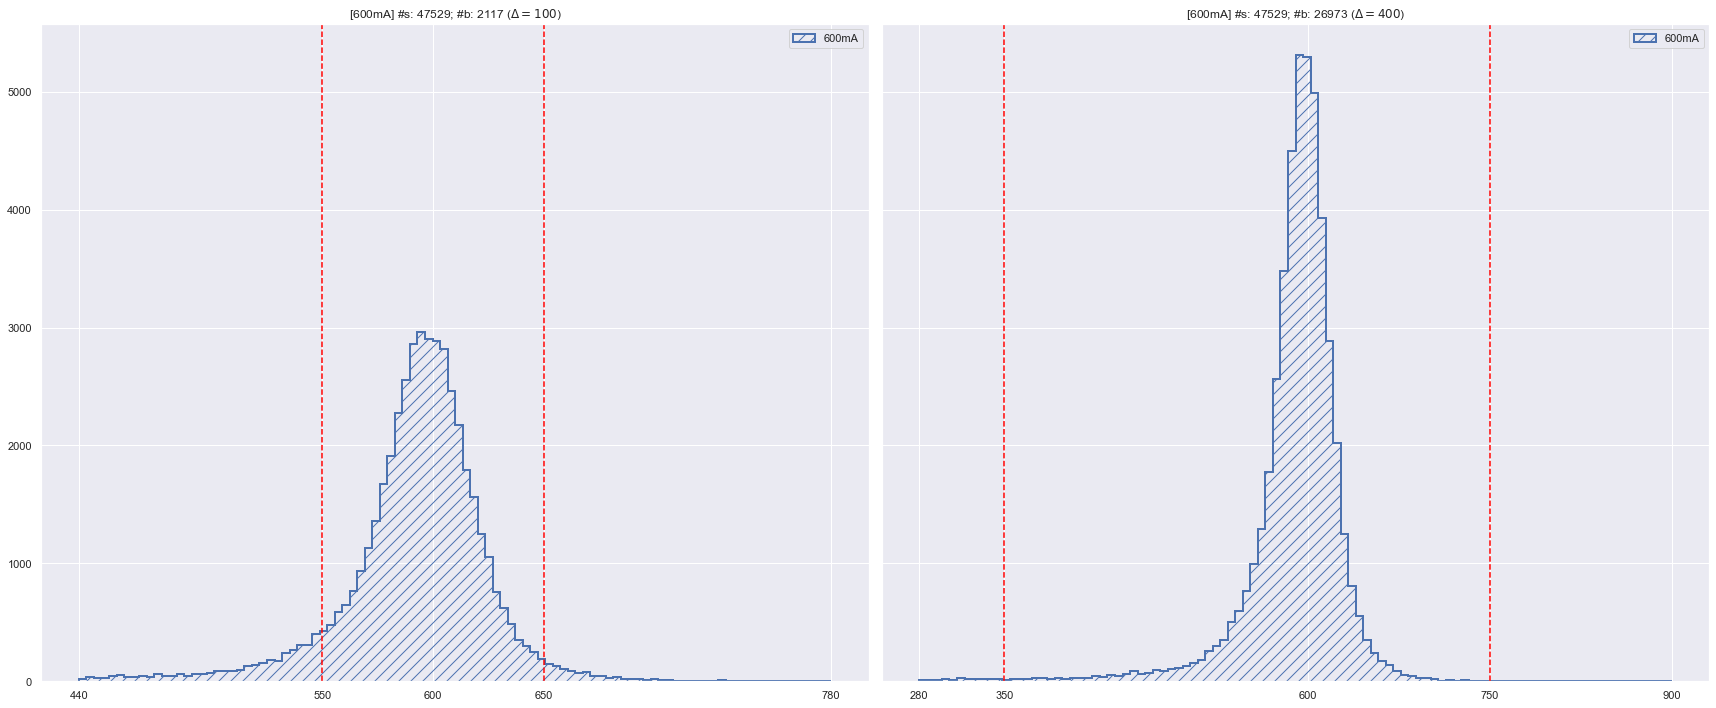

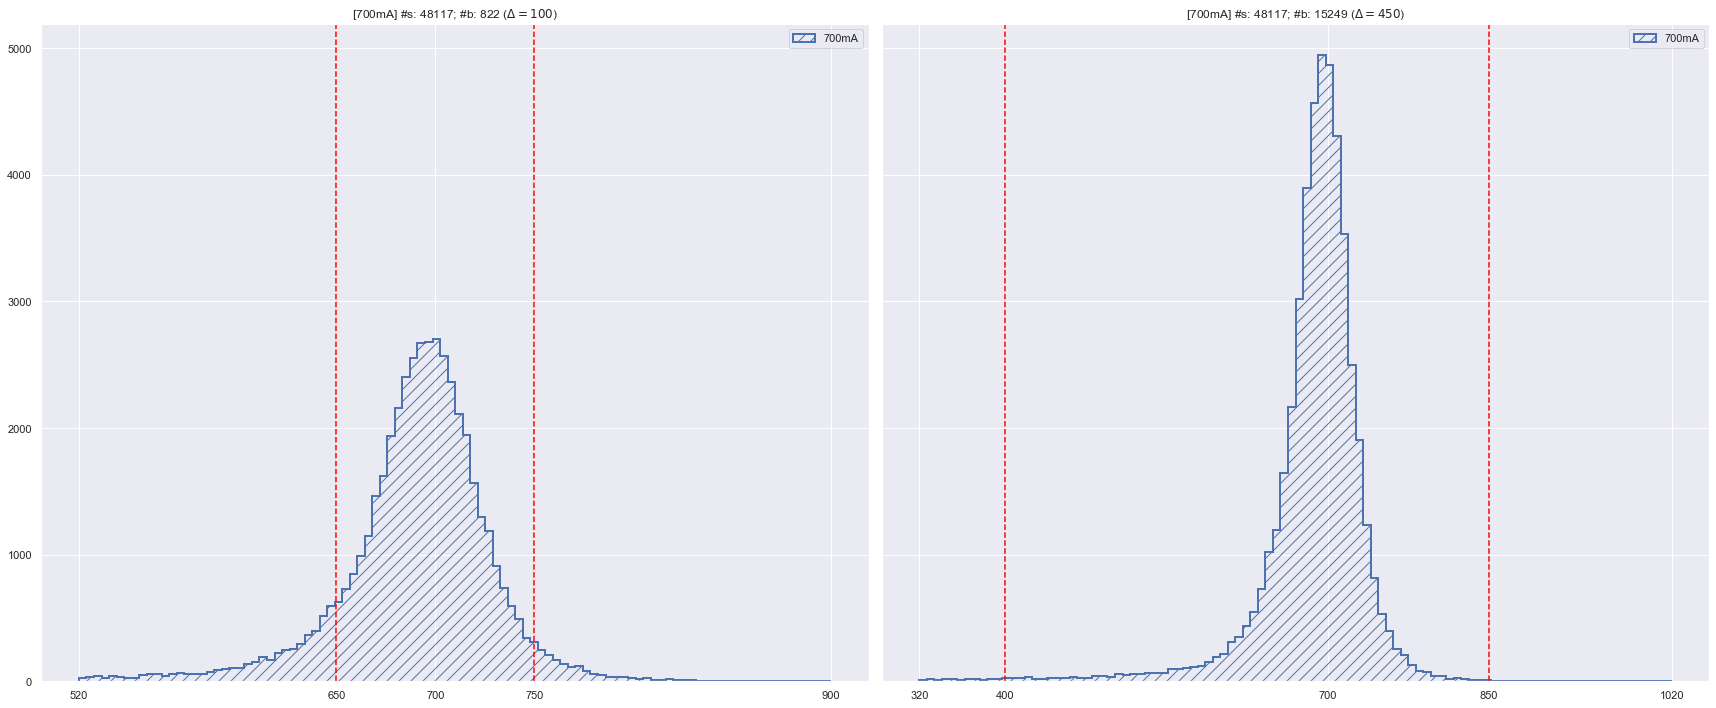

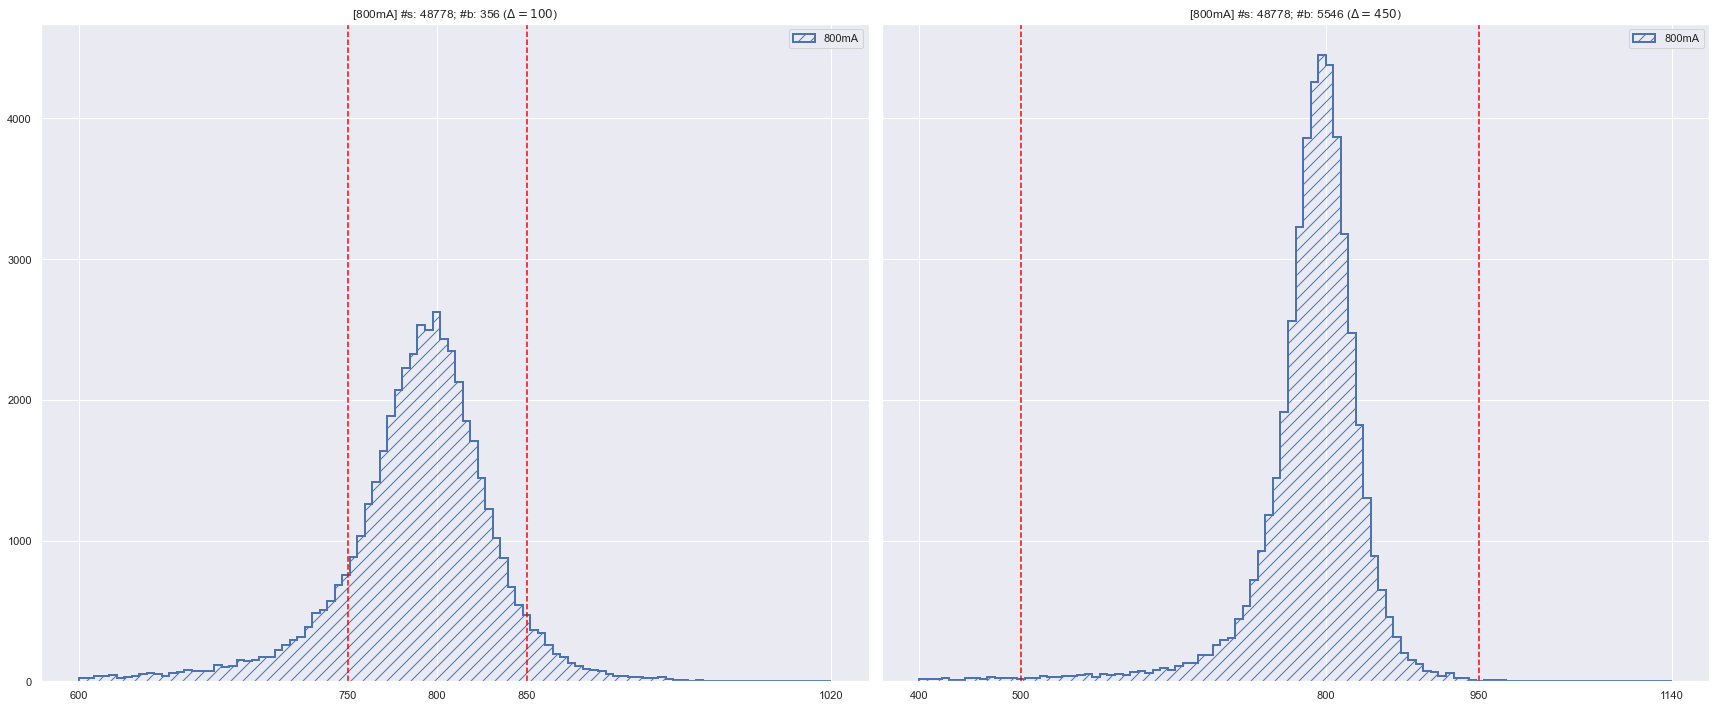

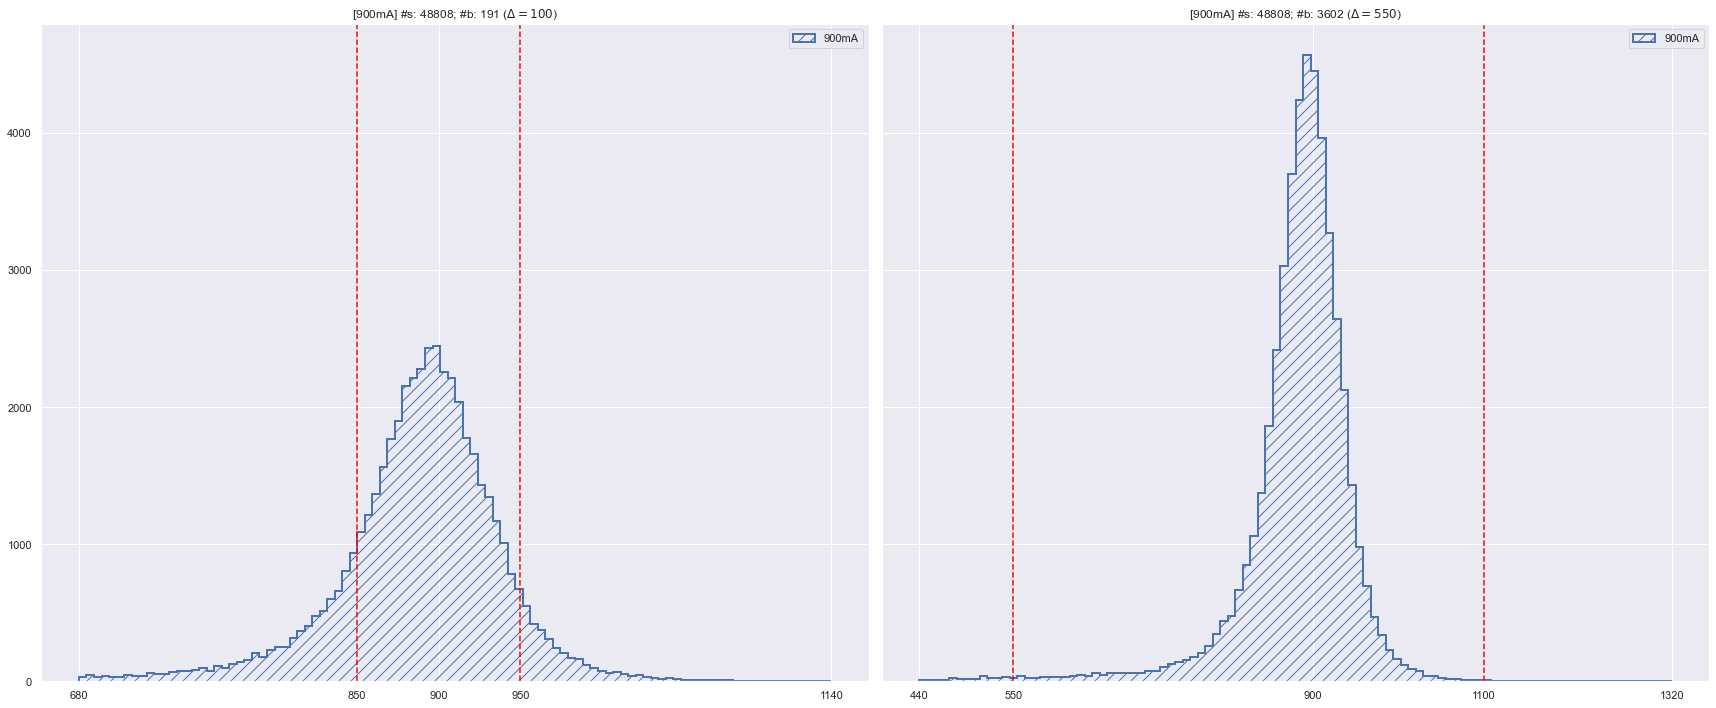

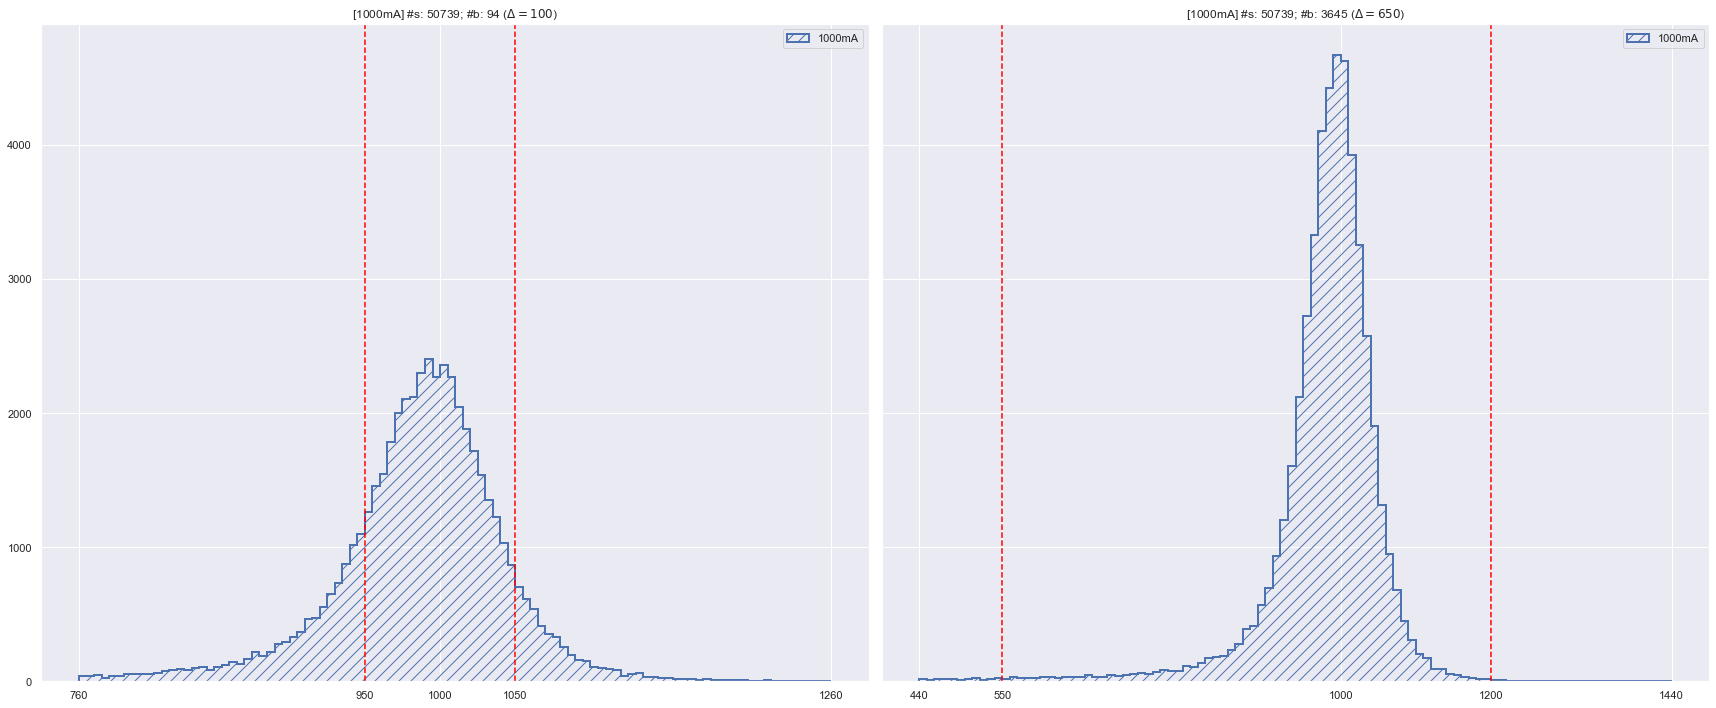

In [40]:
plot_intervals(s, b, intervals=(Benchmark.DISJOINT_INTERVALS, Benchmark.INTERVALS), sharey=True)

In [43]:
def plot_mA_imbalance(signal: pd.DataFrame, bkg: pd.DataFrame, intervals: list, 
                      ax=None, size=(12, 10), title=''):
    if ax is None:
        plt.figure(figsize=size)
        ax = plt.gca()
    
        should_show = True
    else:
        should_show = False
    
    df = signal[['mA', 'type']].copy()
    mass = np.sort(signal['mA'].unique())

    def fn(x):
        return np.argmax(x == mass)

    df['mA'] = df['mA'].apply(fn)

    for i, interval in enumerate(intervals):
        mask = (bkg['dimuon_mass'] > interval[0]) & (bkg['dimuon_mass'] < interval[1])
        df_ = bkg[mask][['mA', 'type']].copy()
        df_['mA'] = i

        df = df.append(df_, ignore_index=True)

    x = [df[df['type'] == 0.0]['mA'],
         df[df['type'] == 1.0]['mA']]

    _, _, (b_patches, s_patches) = ax.hist(x, bins=len(mass), label=['bkg', 'signal'], 
                                           histtype='barstacked', stacked=True, rwidth=0.8)
    for bar in b_patches:
        bar.set_edgecolor('white')
        bar.set_color('purple')
        bar.set_alpha(0.75)

    for bar in s_patches:
        bar.set_edgecolor('black')
        bar.set_hatch('//')
        bar.set_facecolor((0, 0, 0, 0))

    ax.set_xticks(ticks=np.arange(len(mass)), labels=mass.astype('int'))
    ax.legend()

    ax.set_xlabel('mA')
    ax.set_ylabel('Num. Events')
    ax.set_title(f'Mass Imbalance ({title})')

    ax.set_yscale('log')
    
    if should_show:
        plt.show()

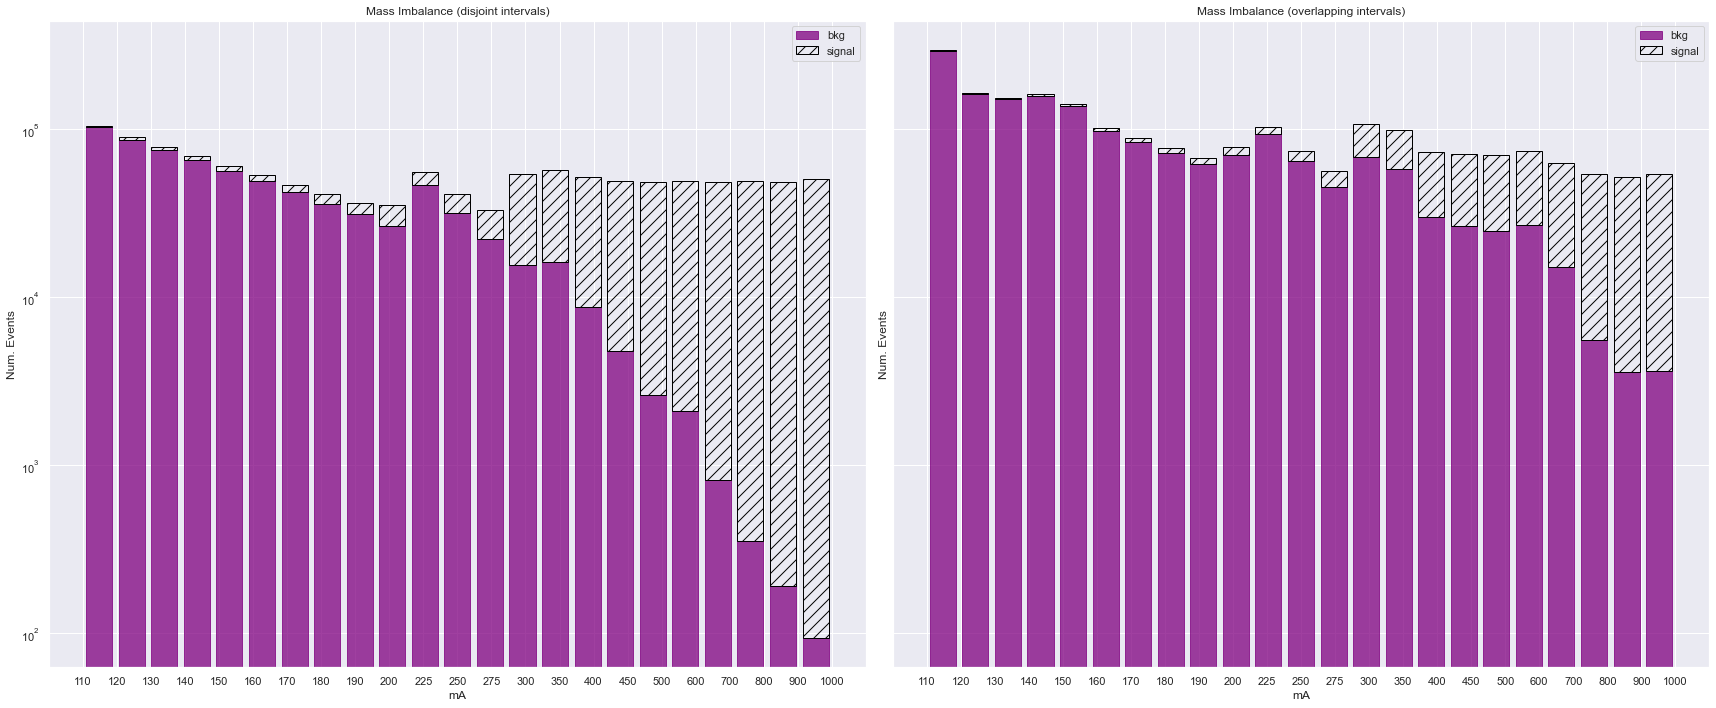

In [44]:
ax1, ax2 = utils.get_plot_axes(rows=1, cols=2, sharey=True)

plot_mA_imbalance(s, b, intervals=Benchmark.DISJOINT_INTERVALS, ax=ax1, title='disjoint intervals')
plot_mA_imbalance(s, b, intervals=Benchmark.INTERVALS, ax=ax2, title='overlapping intervals')

plt.tight_layout()
plt.show()

In [46]:
free_mem()

22

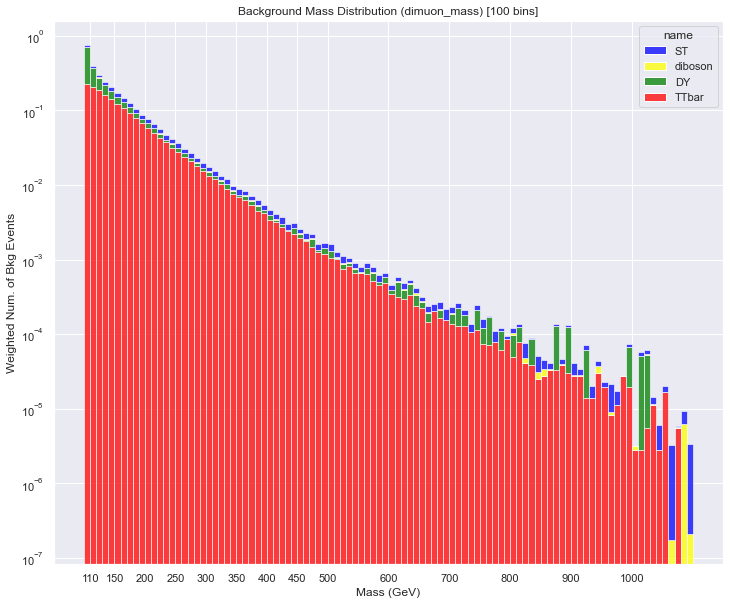

In [105]:
plt.figure(figsize=(12, 10))

sns.histplot(b, x='dimuon_mass', hue='name', bins=100, binrange=(100, 1100),
             multiple='stack', palette=cms.plot.PALETTE, weights=b['weight'])

plt.xlabel('Mass (GeV)')
plt.ylabel('Weighted Num. of Bkg Events')
plt.title('Background Mass Distribution (dimuon_mass) [100 bins]')

plt.yscale('log')
plt.xticks(mticks)

plt.show()

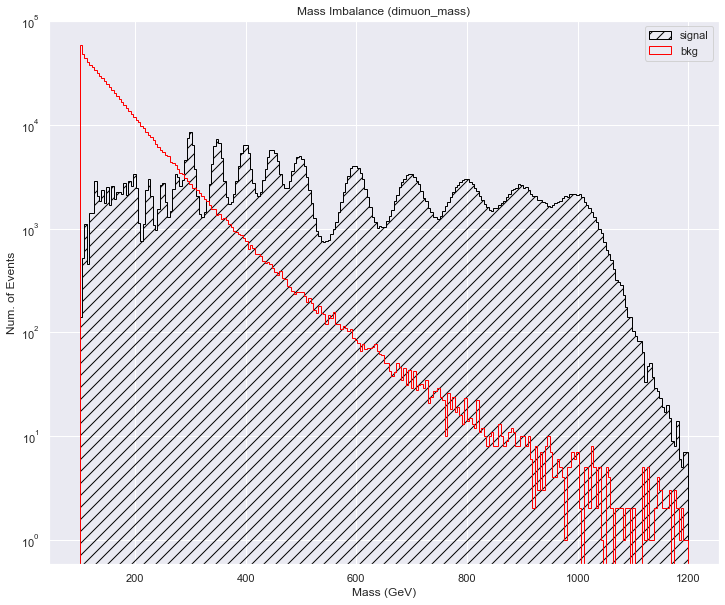

In [111]:
plt.figure(figsize=(12, 10))

plt.hist(s['dimuon_mass'], bins=250, range=(100, 1200), label='signal', color='black',
         histtype='step', hatch='//', edgecolor='black')

plt.hist(b['dimuon_mass'], bins=250, range=(100, 1200), label='bkg', color='red',
         histtype='step', edgecolor='red', linewidth=1)

plt.xlabel('Mass (GeV)')
plt.ylabel('Num. of Events')
plt.title('Mass Imbalance (dimuon_mass)')

plt.yscale('log')
plt.legend()
plt.show()

Feature Plots:

In [50]:
VARS = Benchmark.FEATURES

In [48]:
def plot_var(signal: pd.DataFrame, background: pd.DataFrame, variable: str, title: str, 
             mass: list, bins=50, size=(12, 10), limit=None):
    plt.figure(figsize=size)
    
    var_range = (signal[variable].min(), signal[variable].max())
    var_range = (min(var_range[0], background[variable].min()), 
                 max(var_range[1], background[variable].max()))
    
    if isinstance(limit, (int, float)):
        a, b = var_range
        var_range = (a, min(b, limit))
    
    w_s = 0.0
    w_b = np.sum(background['weight'])

    plt.hist(background[variable], bins=bins, label='bkg', color='red', range=var_range, 
             weights=background['weight'], histtype='step', edgecolor='red', linewidth=2)

    for m in reversed(mass):
        s = signal[signal['mA'] == m][variable]
        w_s += len(s)
    
    w_s = w_b / w_s

    for m in reversed(mass):
        s = signal[signal['mA'] == m][variable]

        plt.hist(s, bins=bins, label=f'{int(m)}mA', hatch='//', histtype='step', 
                 linewidth=2, range=var_range,  weights=np.ones((s.shape[0],)) * w_s)

    plt.title(f'{variable} [{bins} bins]')
    plt.xlabel(variable)
    plt.ylabel(f'Weighted Count')

    plt.legend(loc='best')
    plt.show()
    free_mem()


In [55]:
data = Benchmark()
data.load(None, signal=s, bkg=b, features=VARS + ['dimuon_pt'])

loading...
dataset loaded.


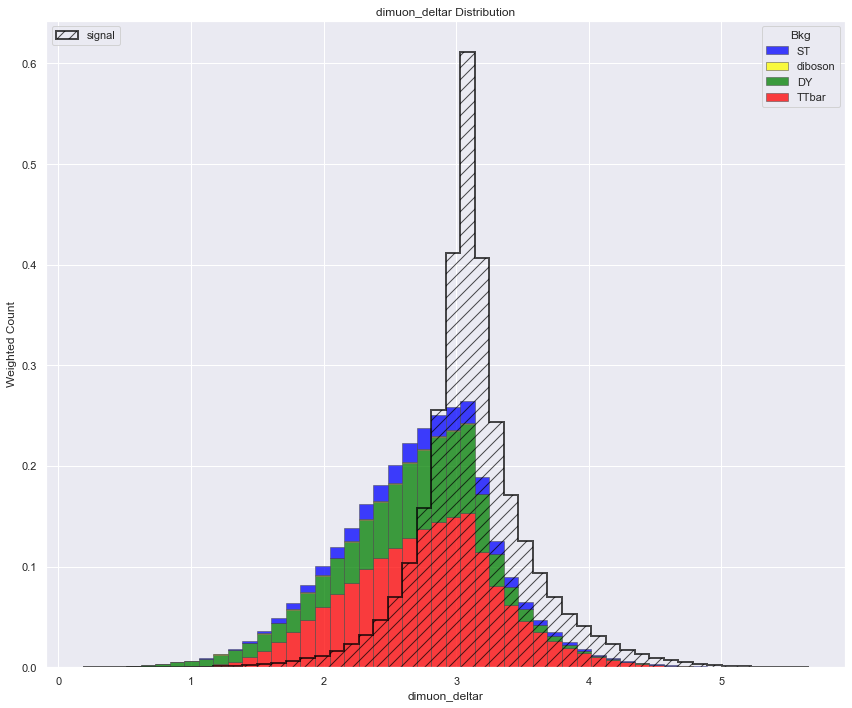

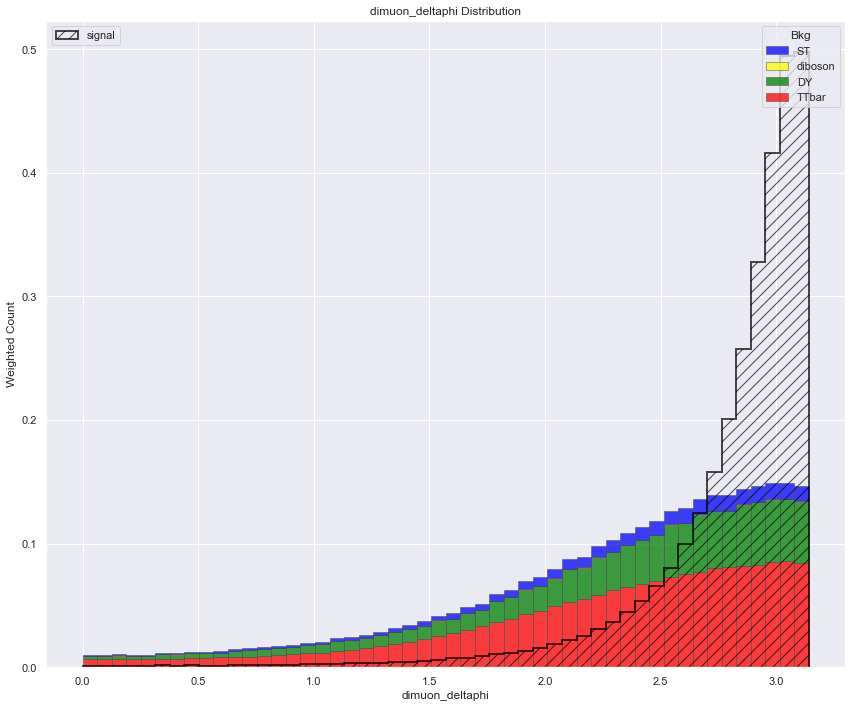

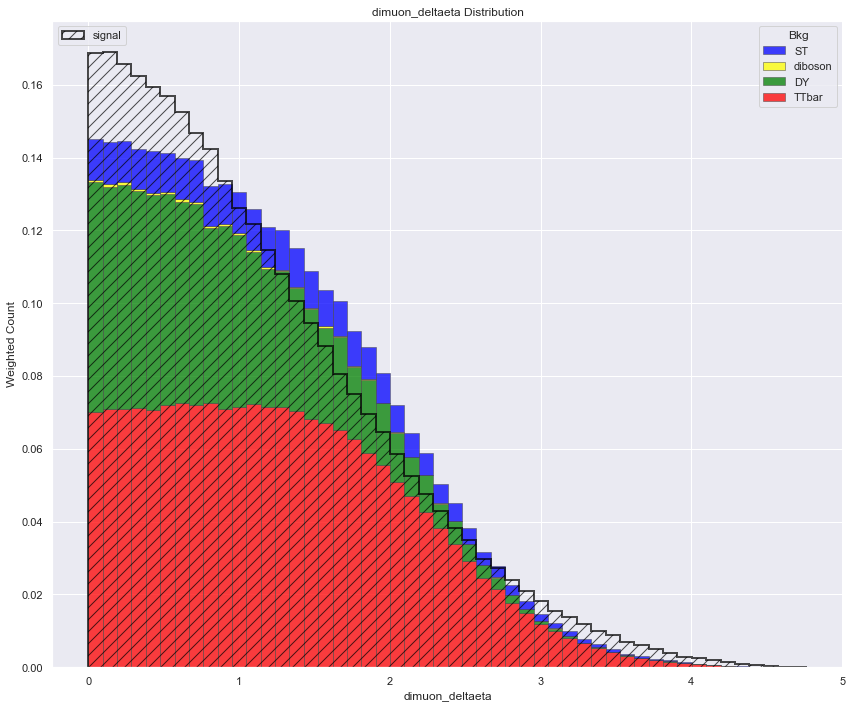

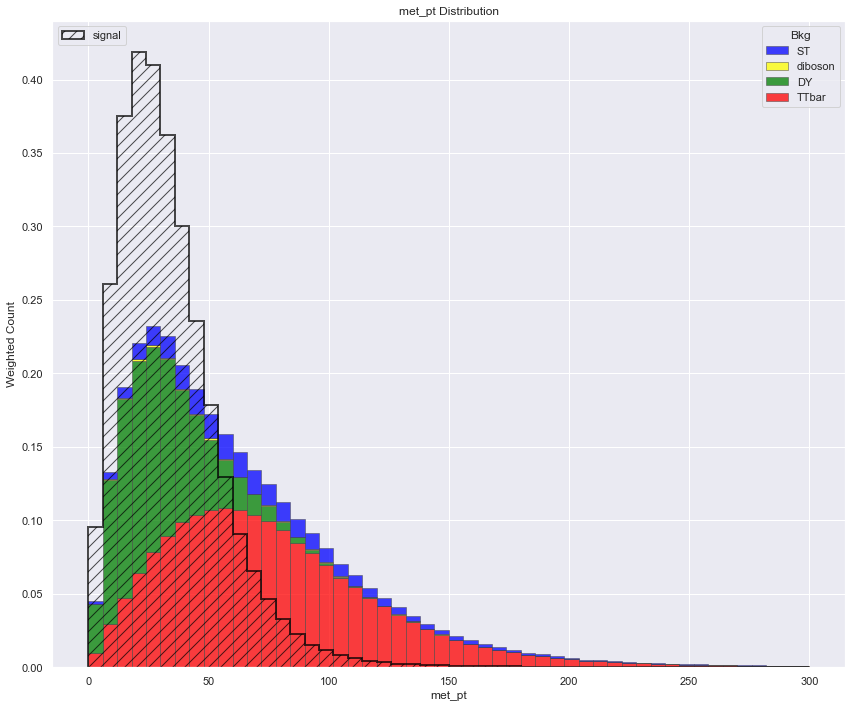

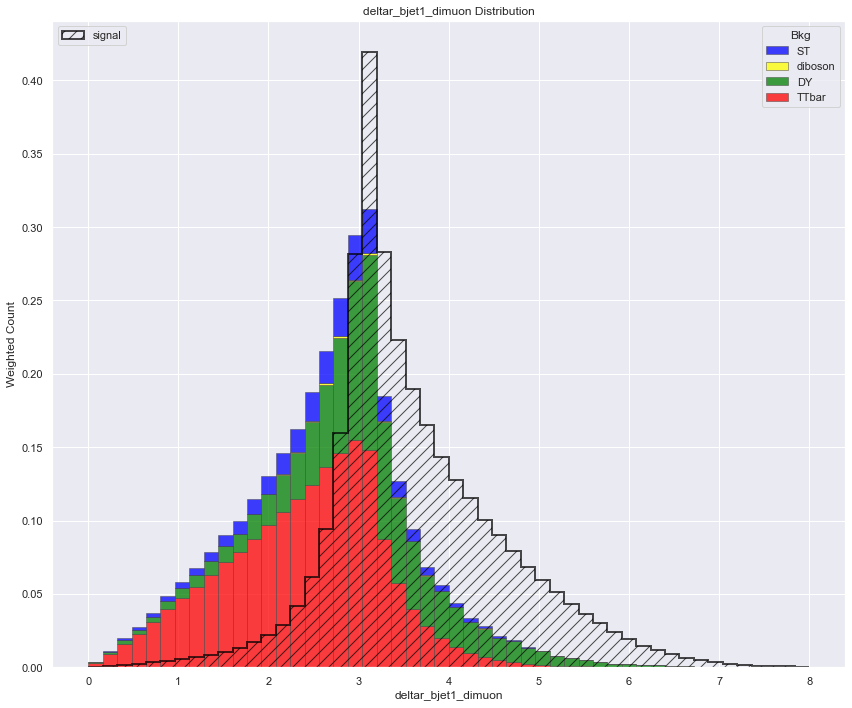

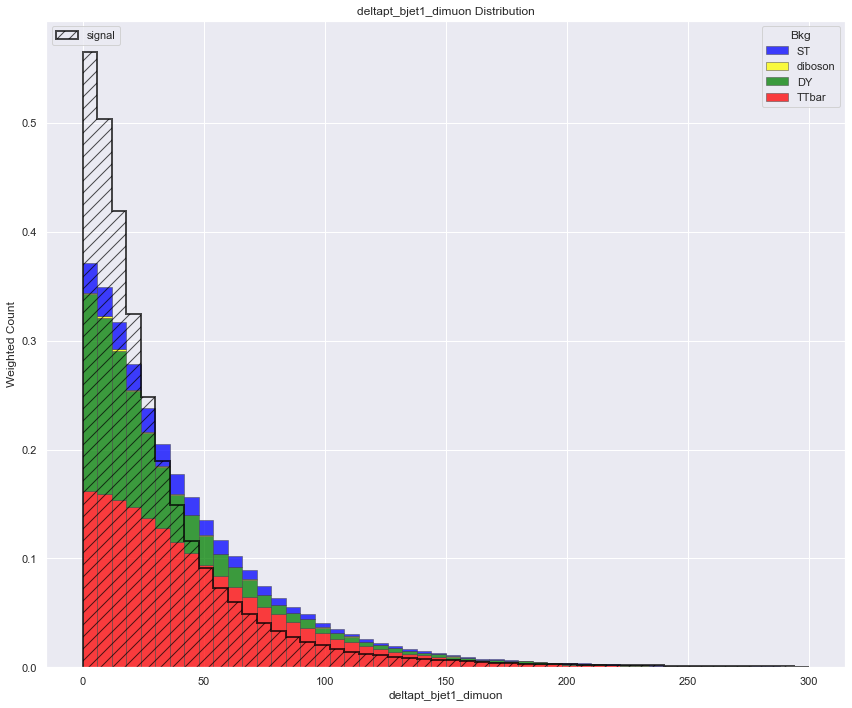

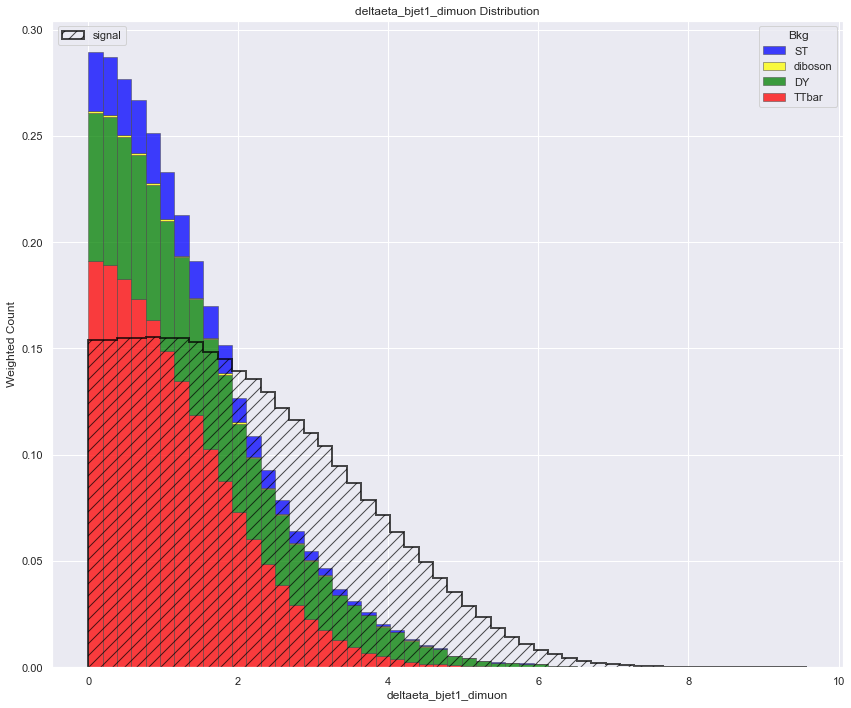

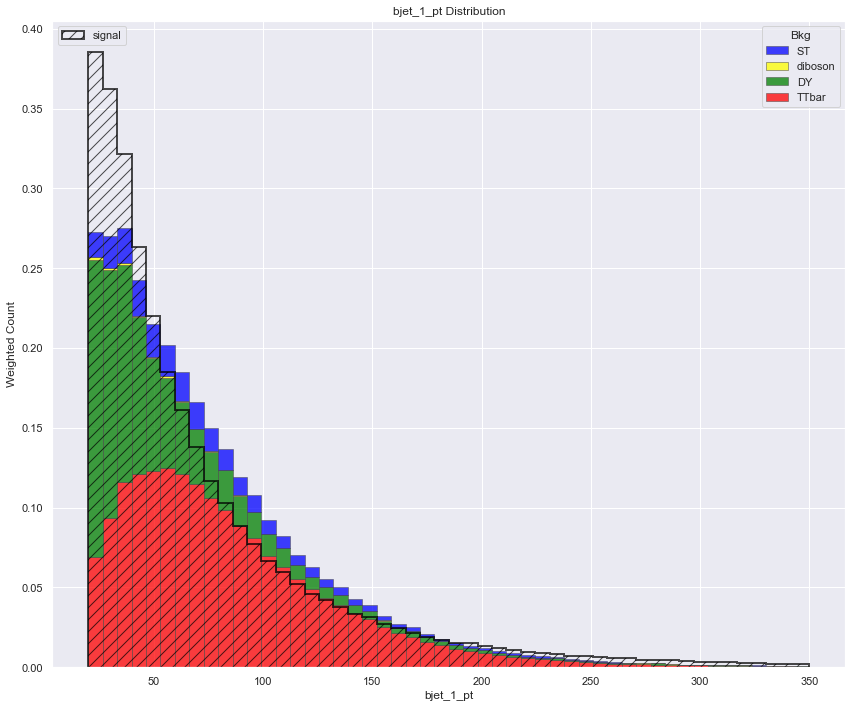

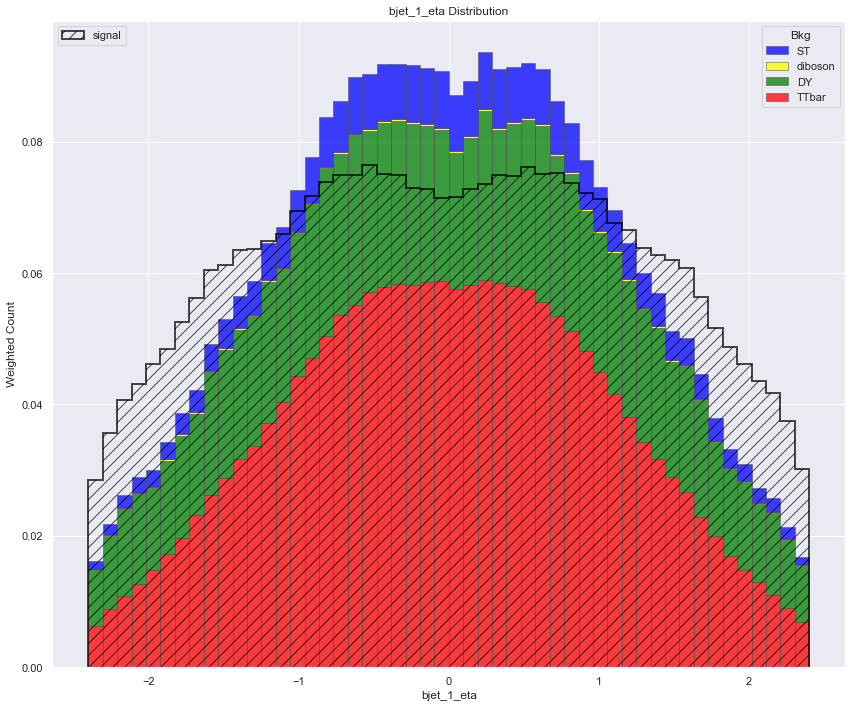

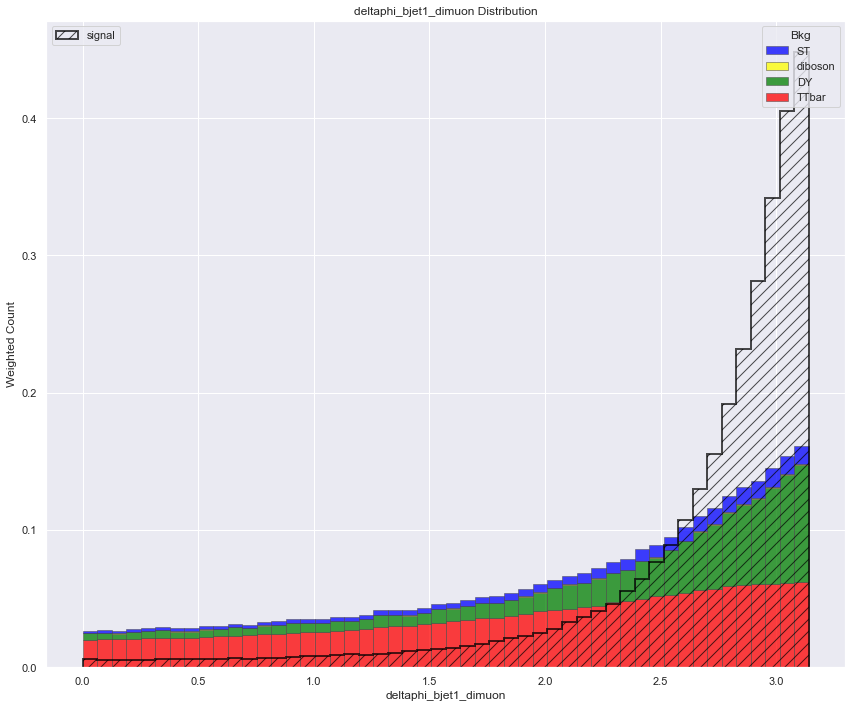

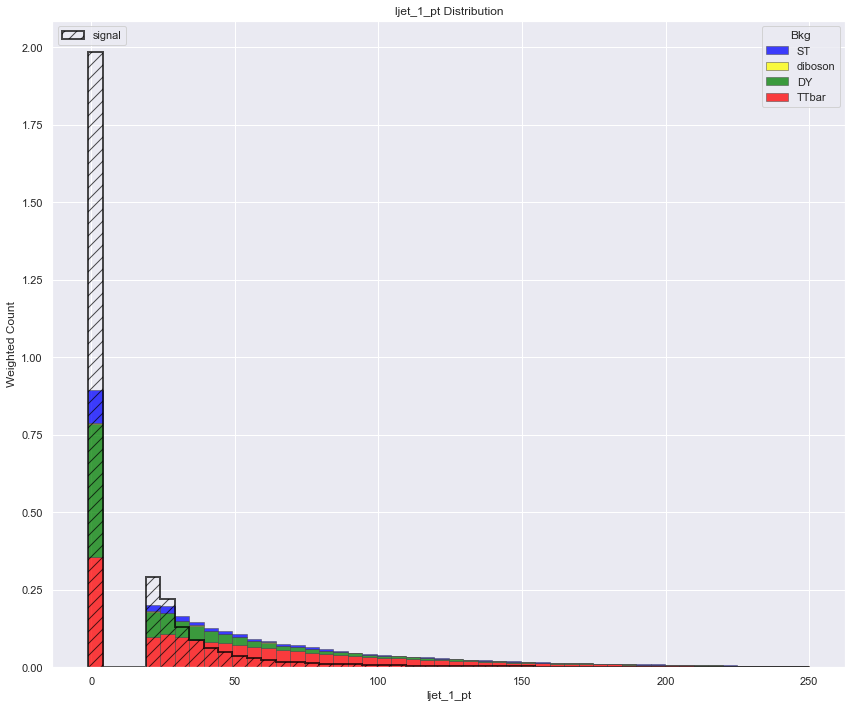

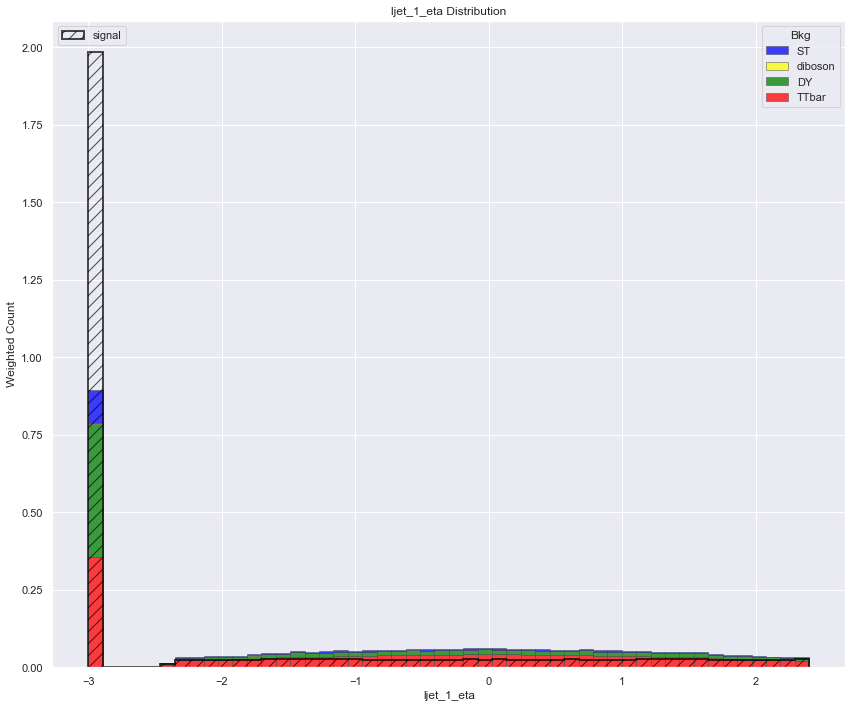

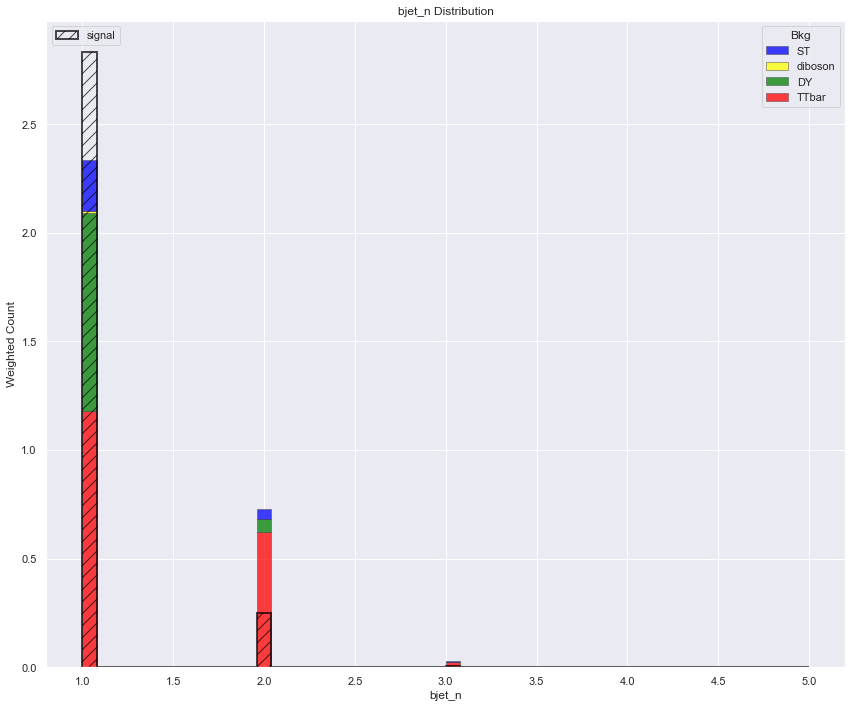

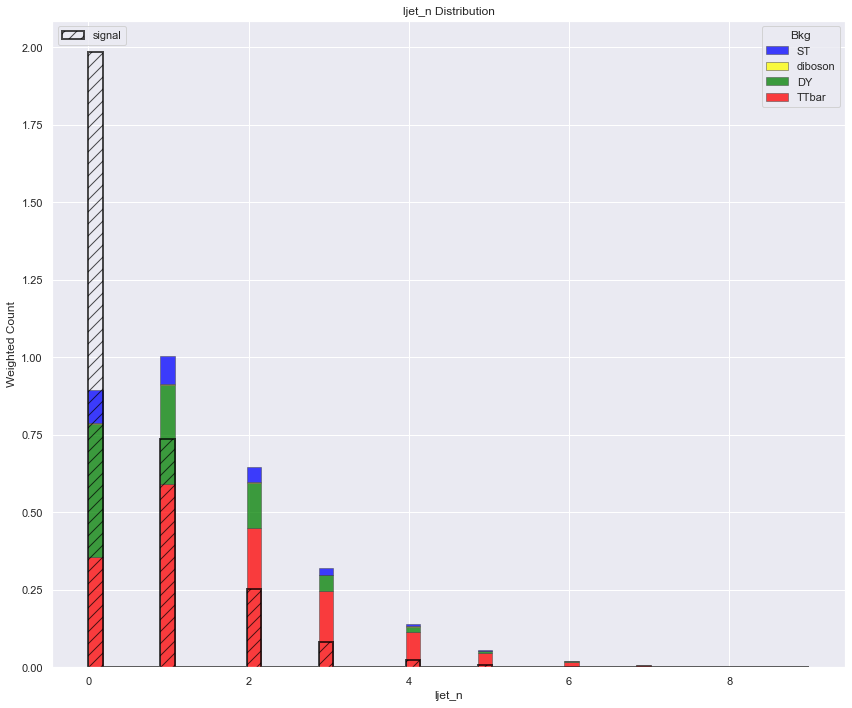

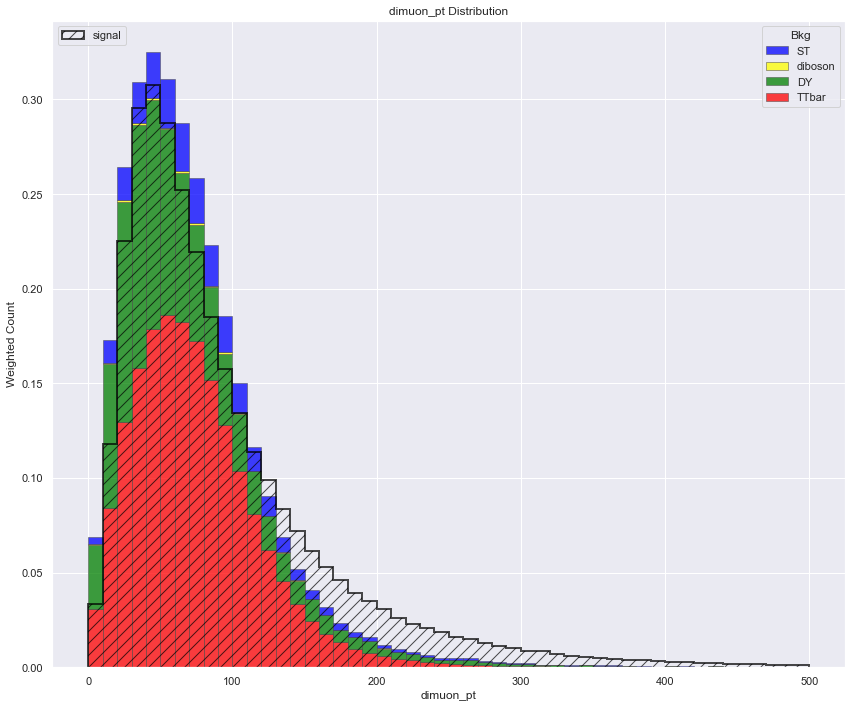

In [66]:
# variable plot on all data and mA
for var in VARS + ['dimuon_pt']:
    limit = 500
    
    if var in ['met_pt', 'deltapt_bjet1_dimuon']:
        limit = 300
    
    elif var == 'ljet_1_pt':
        limit = 250
    
    elif var == 'bjet_1_pt':
        limit = 350
    
    elif var == 'deltar_bjet1_dimuon':
        limit = 8
    
    elif var == 'bjet_n':
        limit = 5
    
    elif var == 'ljet_n':
        limit = 9
    
    cms.plot.var(data, variable=var, bins=50, max_limit=limit)

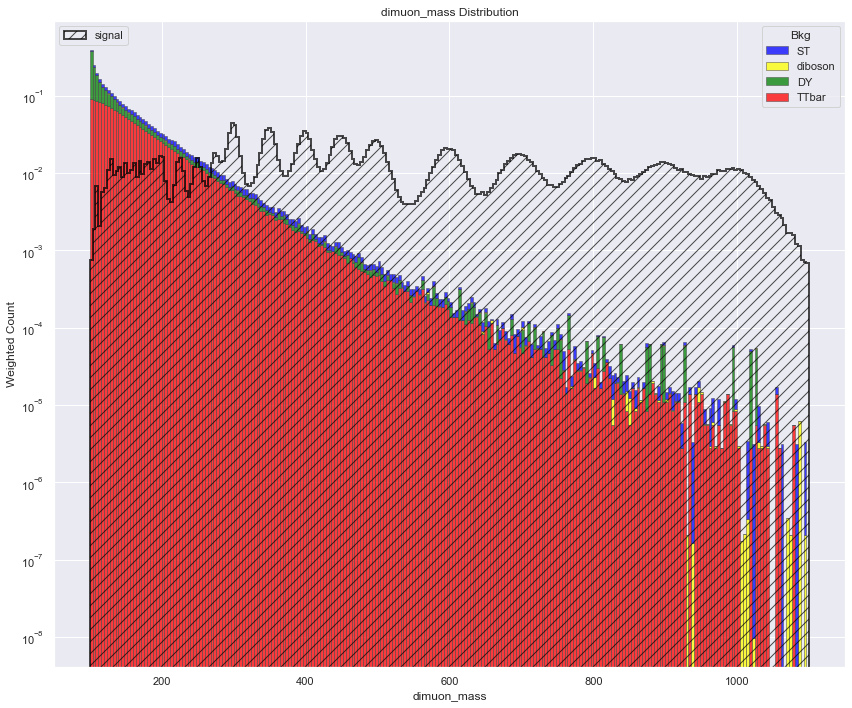

In [71]:
cms.plot.var(data, variable='dimuon_mass', bins=250, min_limit=100, max_limit=1100, y_scale='log')

---
### Correlation Plots
Pearsons correlation on:
* mA
* dimuon_mass
* class-label (type)

---
### Train-Test Split


In [75]:
len(data.ds), len(s), len(b)

(1348471, 533777, 814694)

In [77]:
a = (len(data.ds) - 1_000_000) / len(data.ds)
a

0.2584193505088356

In [81]:
s_test = s.sample(frac=a, replace=False, random_state=utils.SEED)
b_test = b.sample(frac=a, replace=False, random_state=utils.SEED)

len(s_test) + len(b_test)

348471

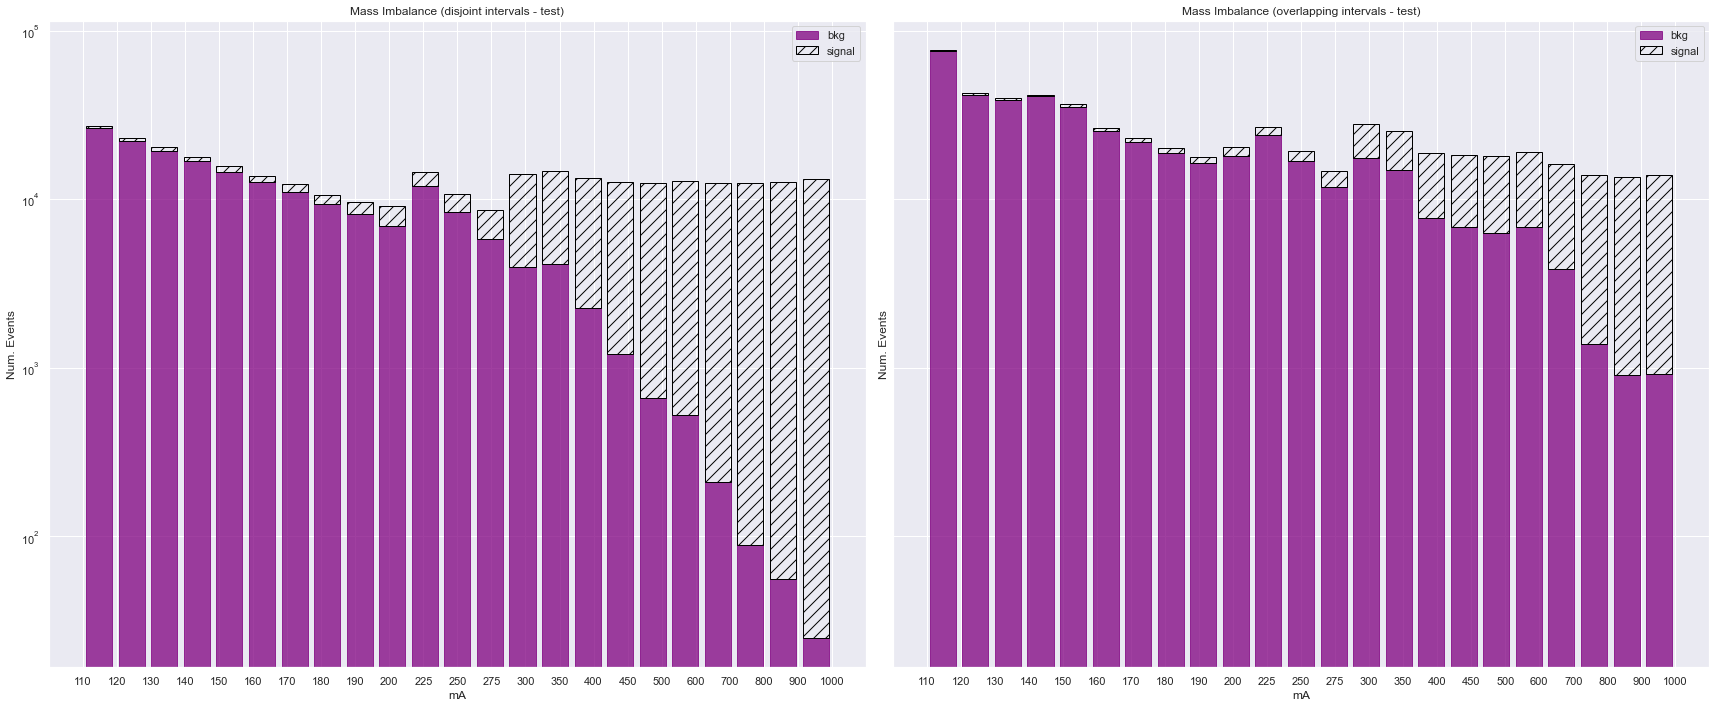

In [82]:
ax1, ax2 = utils.get_plot_axes(rows=1, cols=2, sharey=True)

plot_mA_imbalance(s_test, b_test, intervals=Benchmark.DISJOINT_INTERVALS, ax=ax1, 
                  title='disjoint intervals - test')
plot_mA_imbalance(s_test, b_test, intervals=Benchmark.INTERVALS, ax=ax2, 
                  title='overlapping intervals - test')

plt.tight_layout()
plt.show()

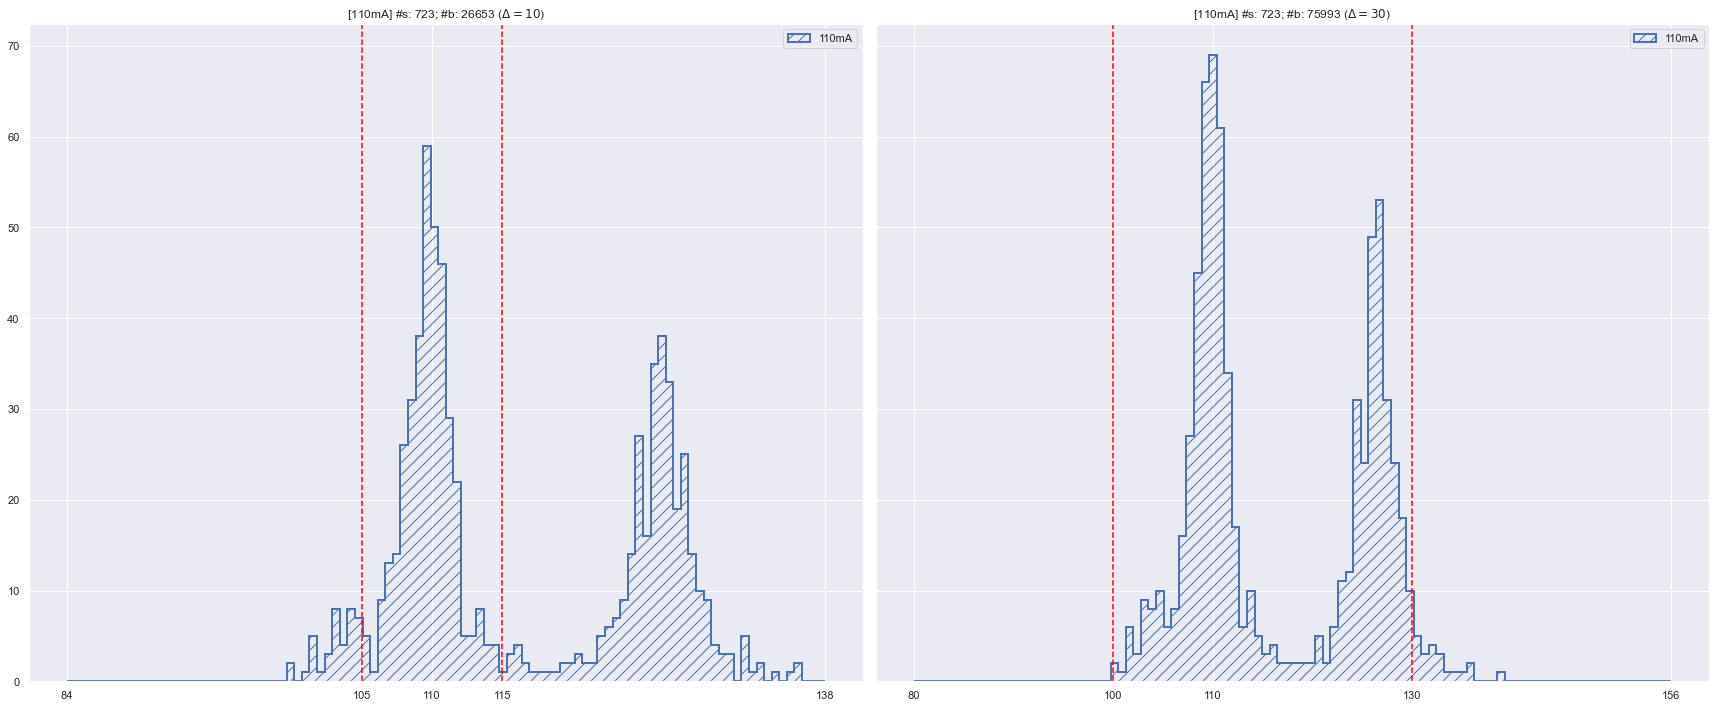

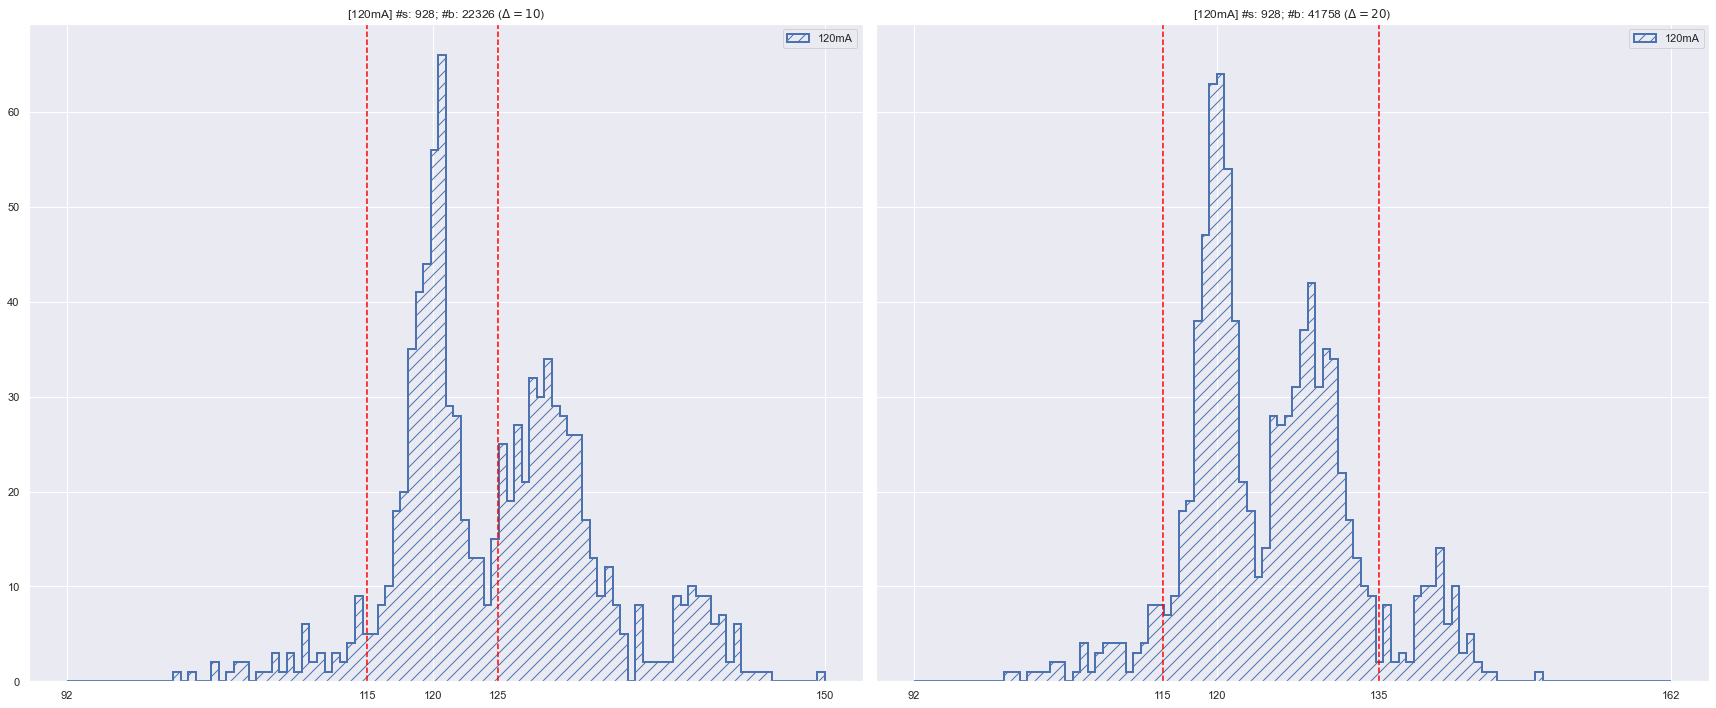

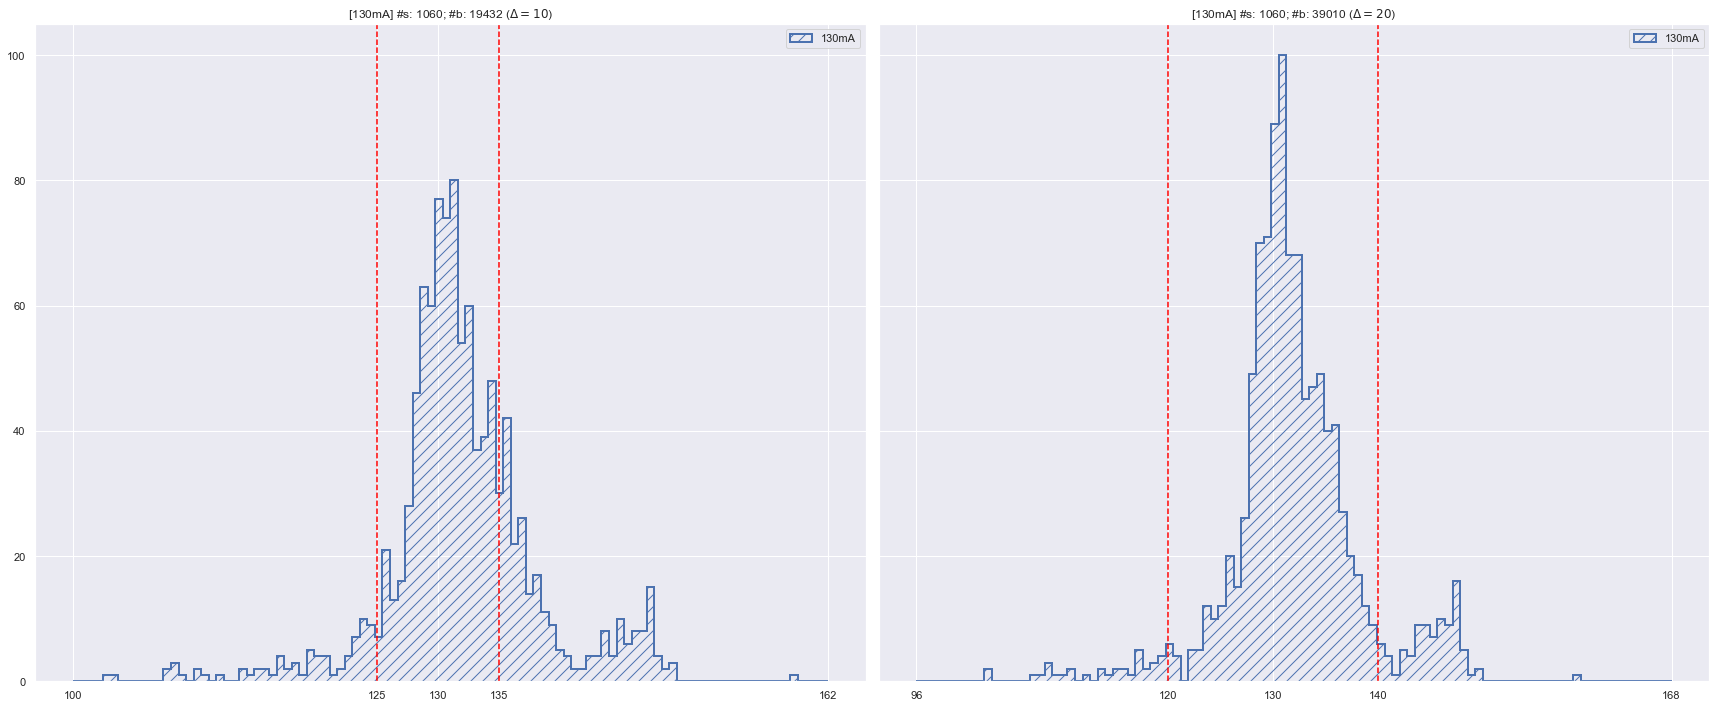

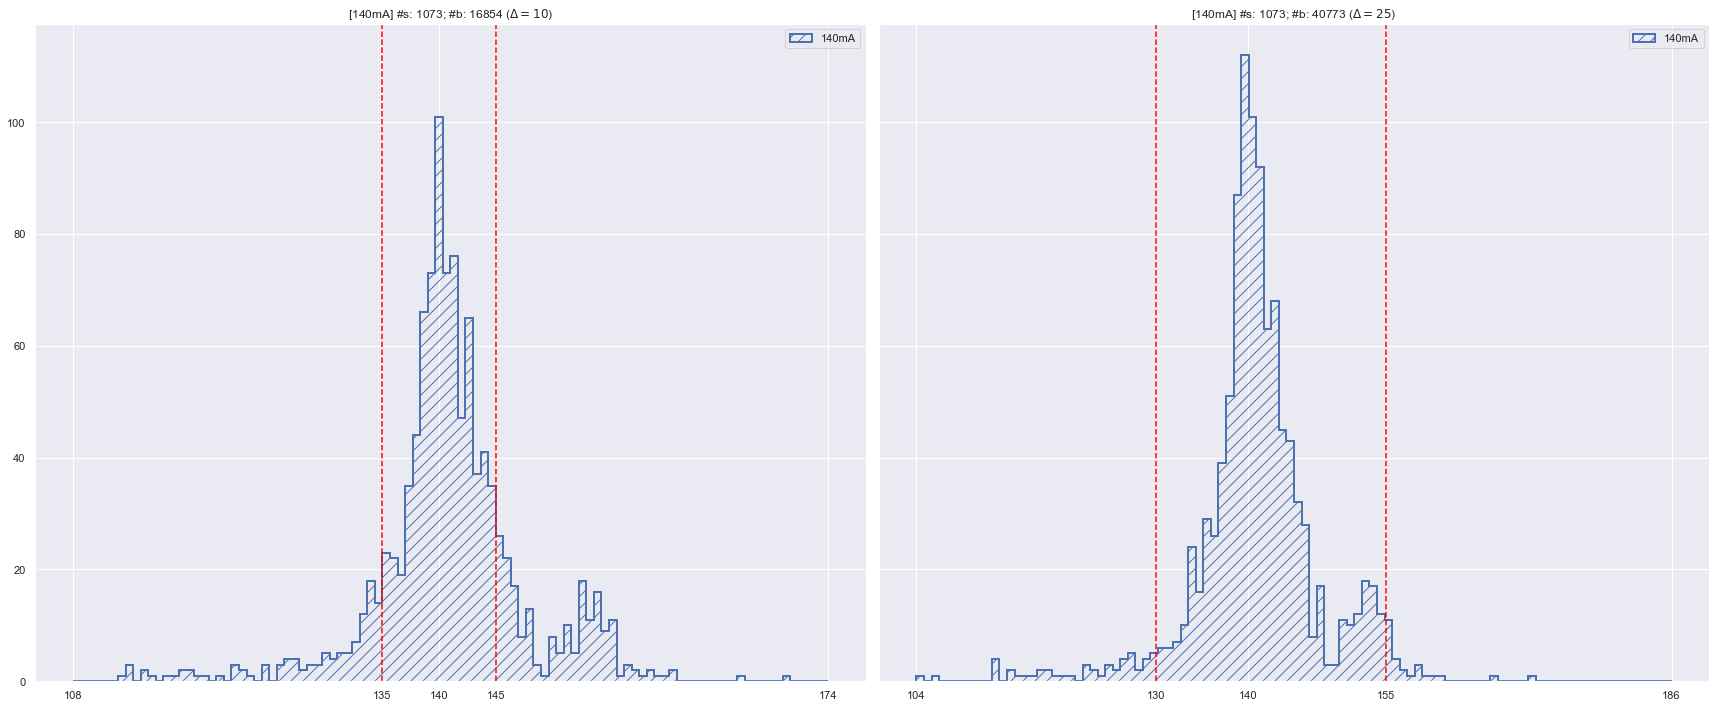

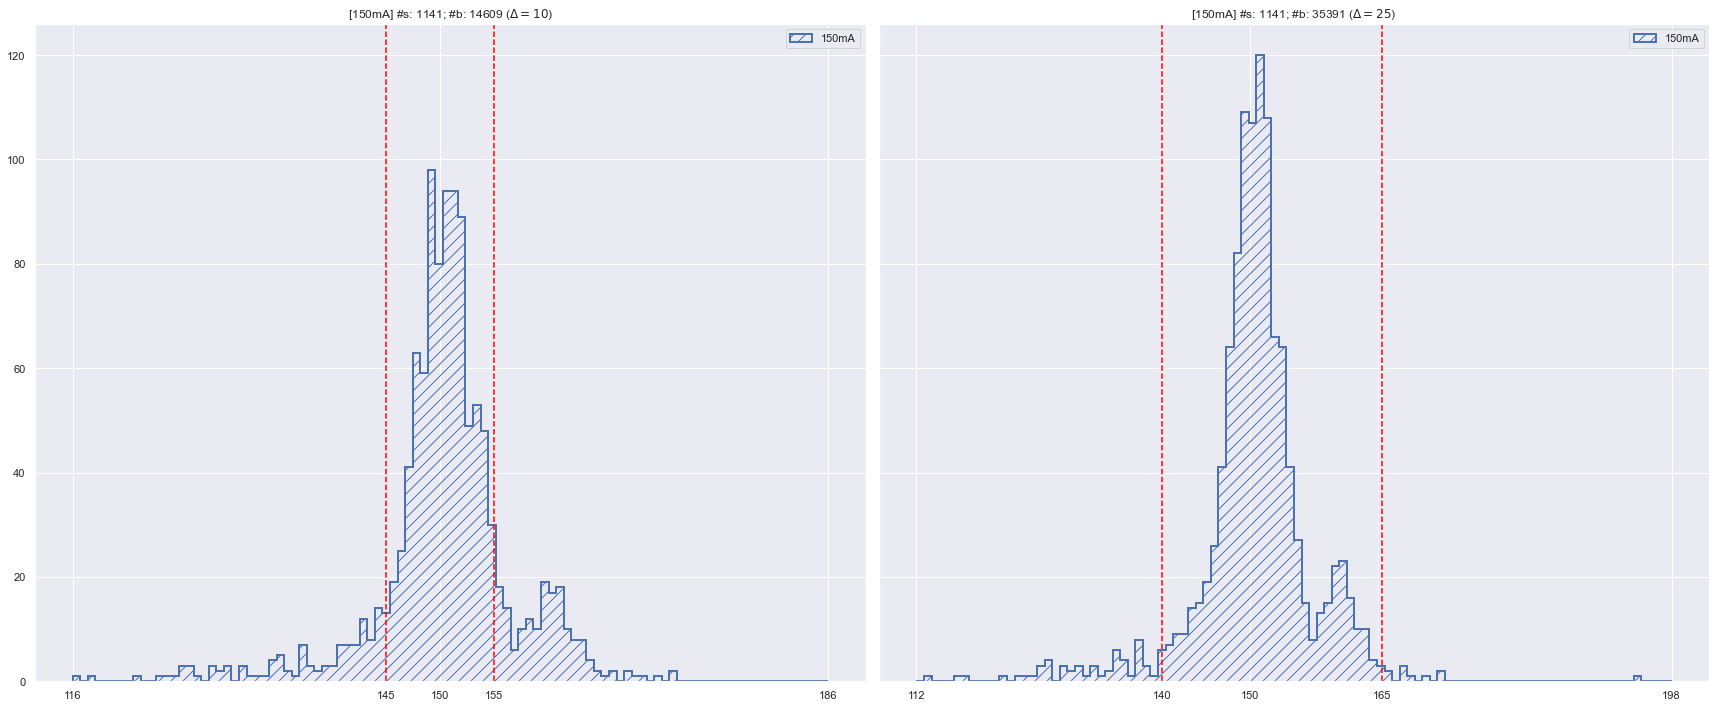

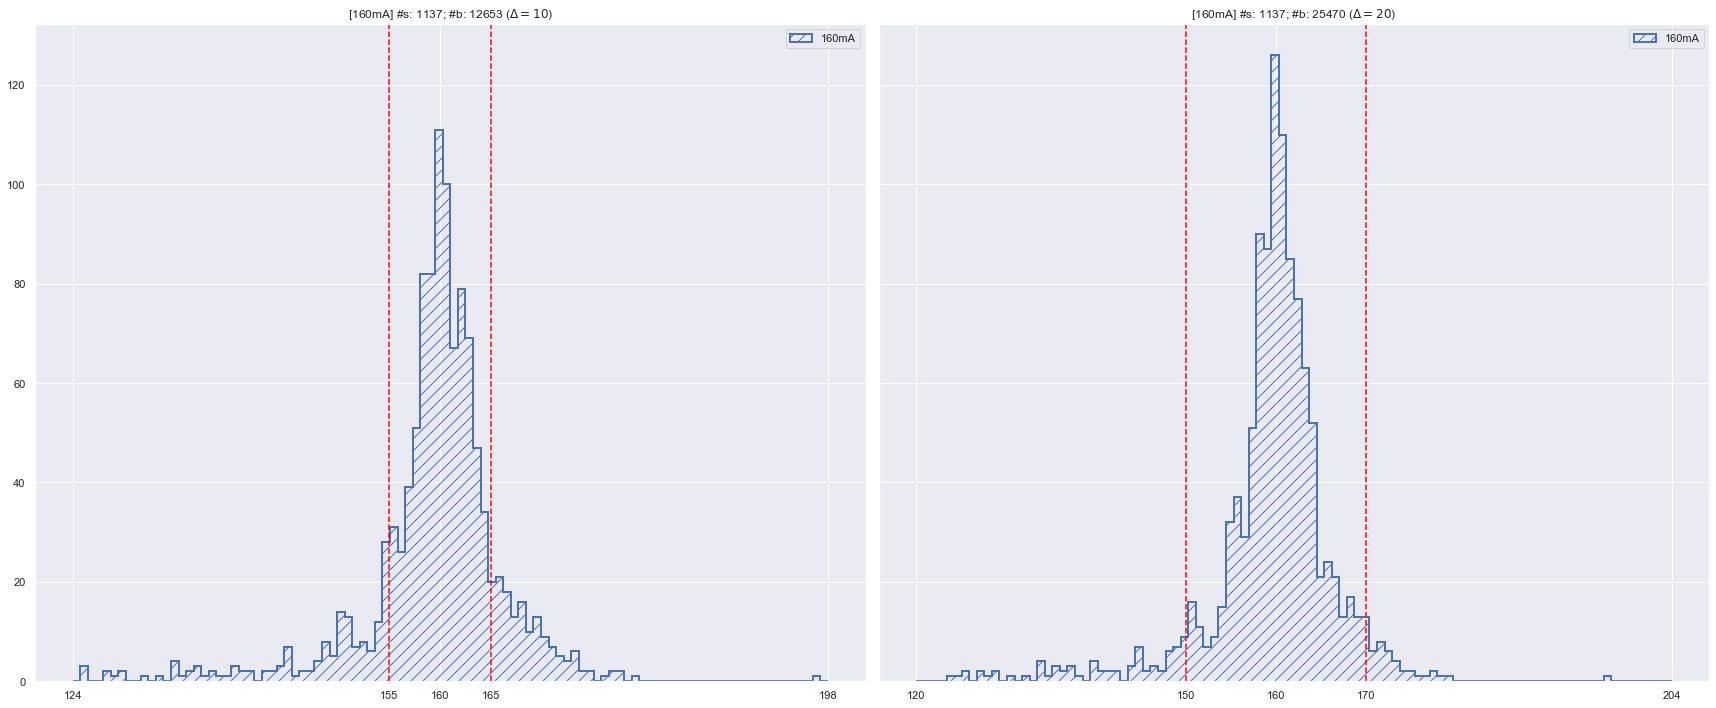

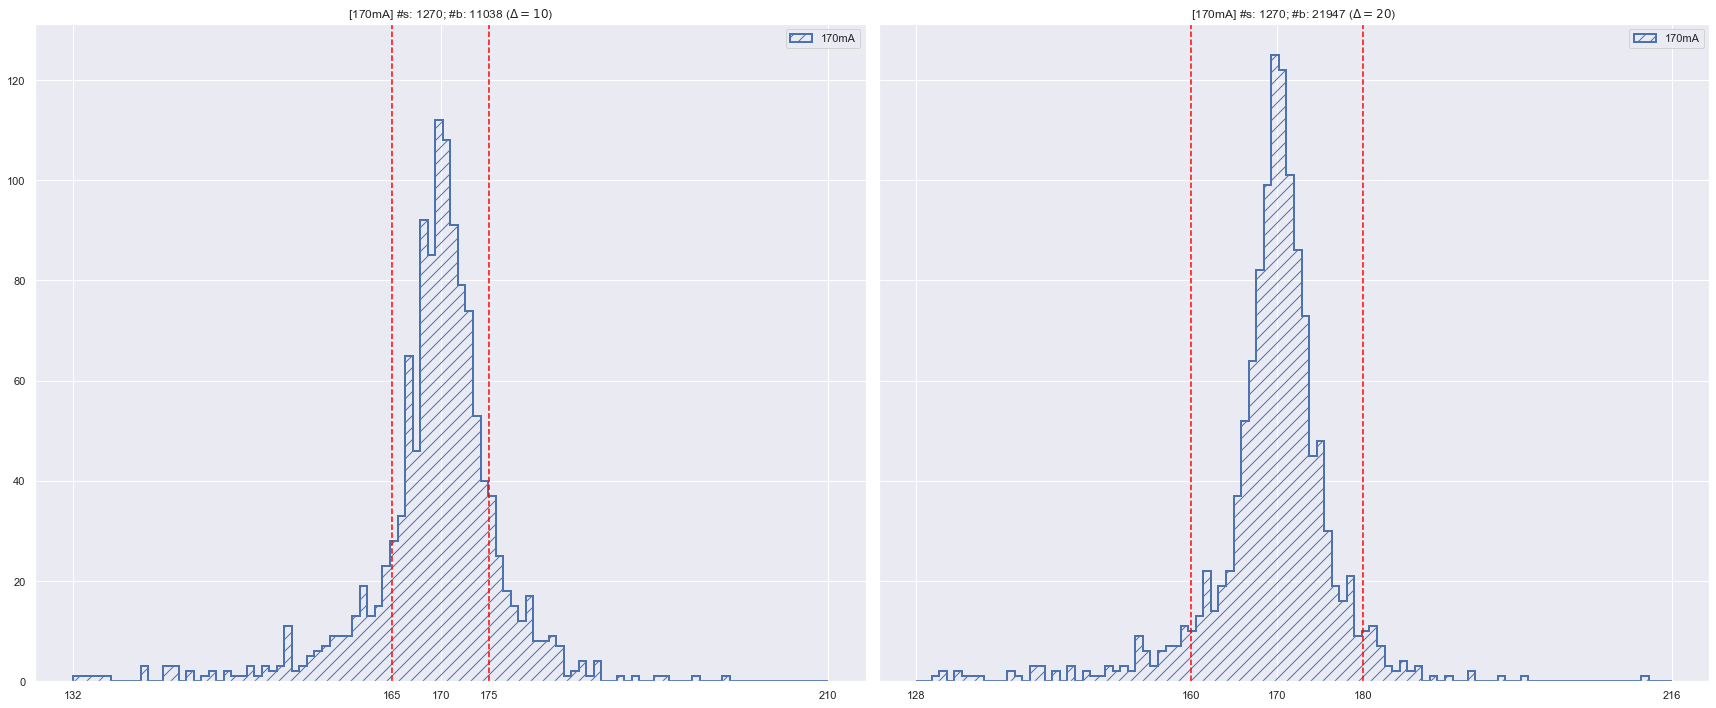

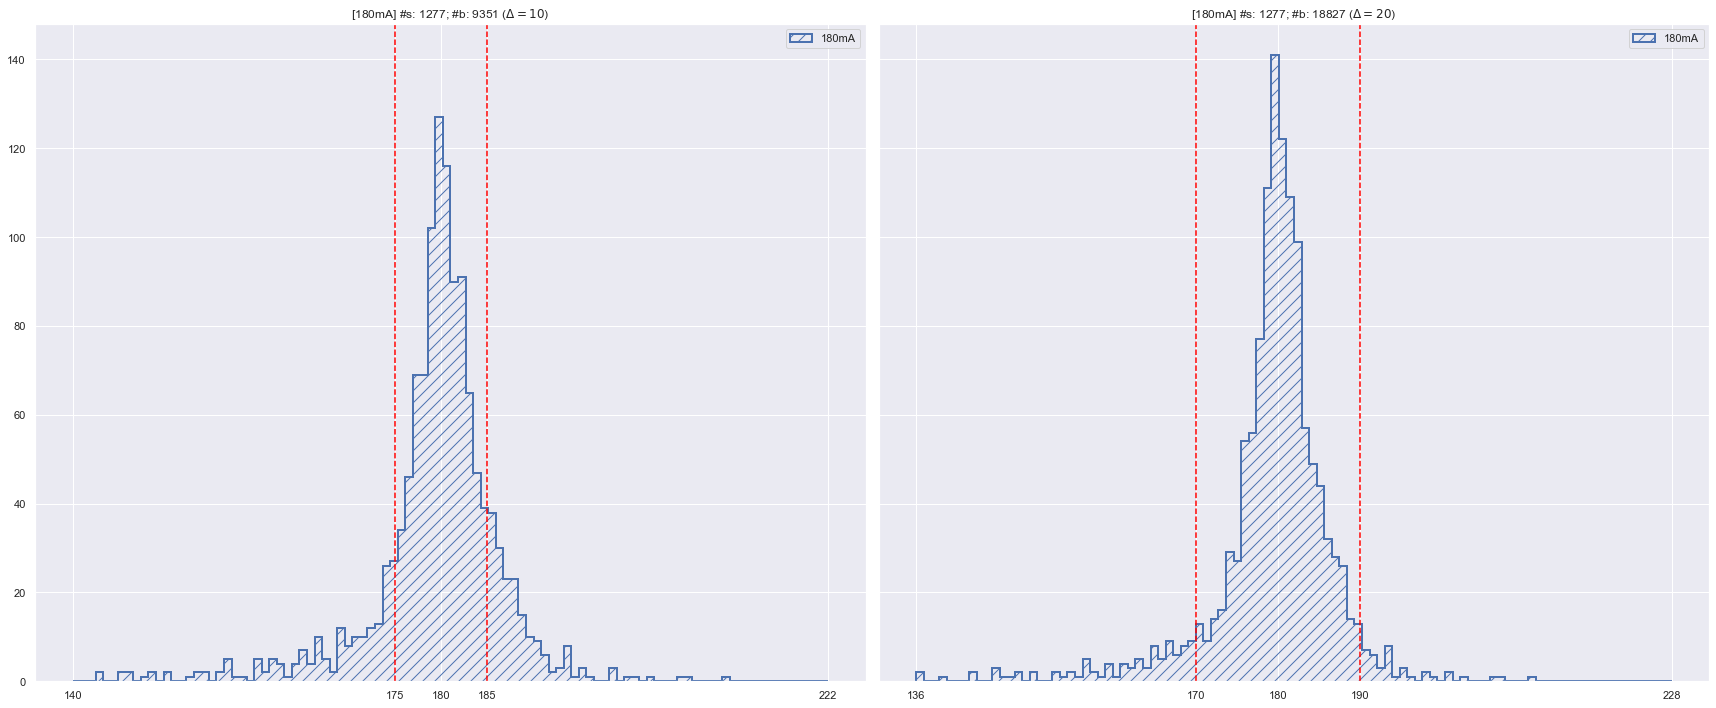

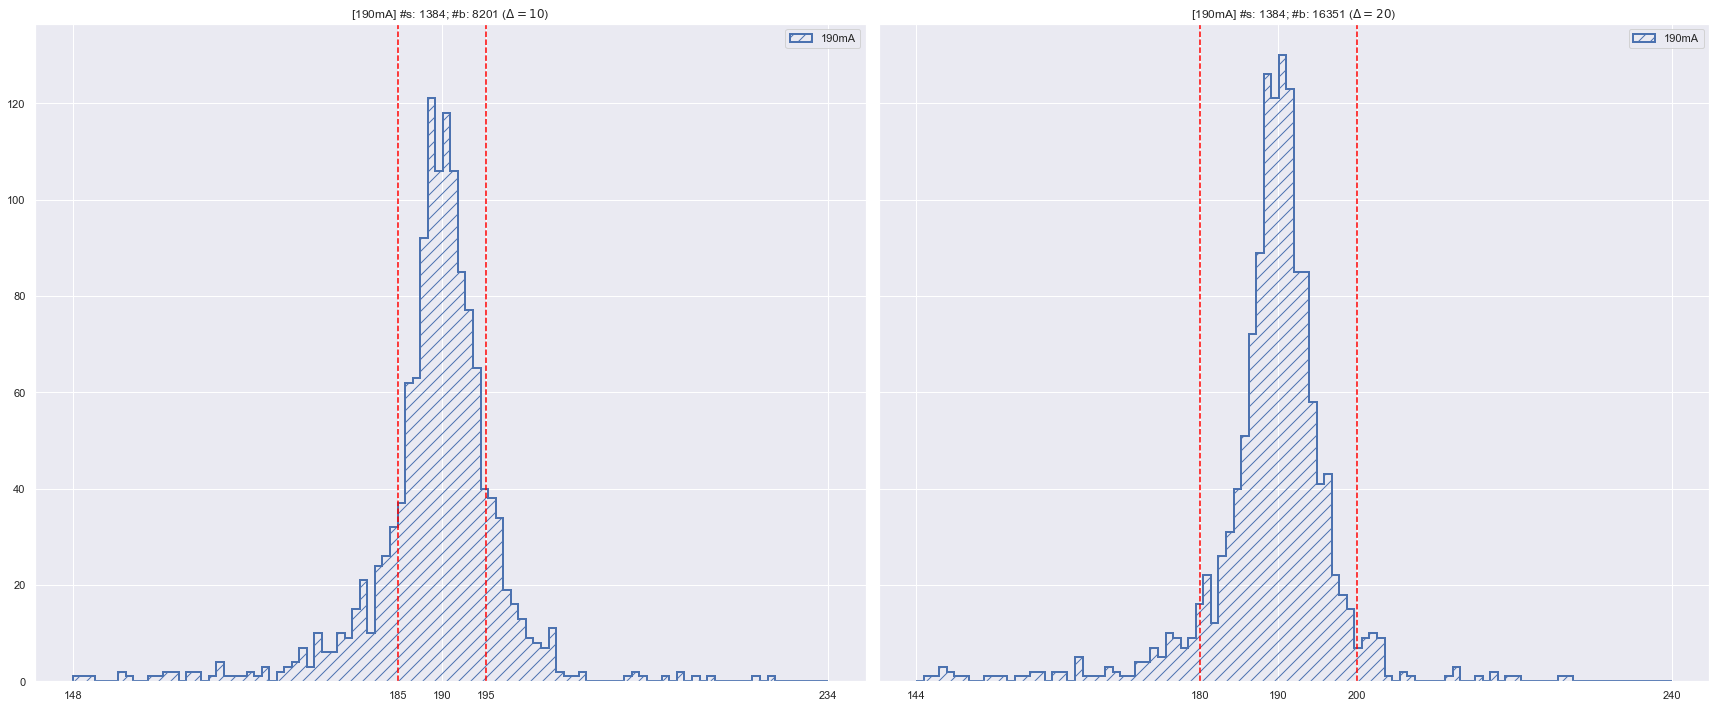

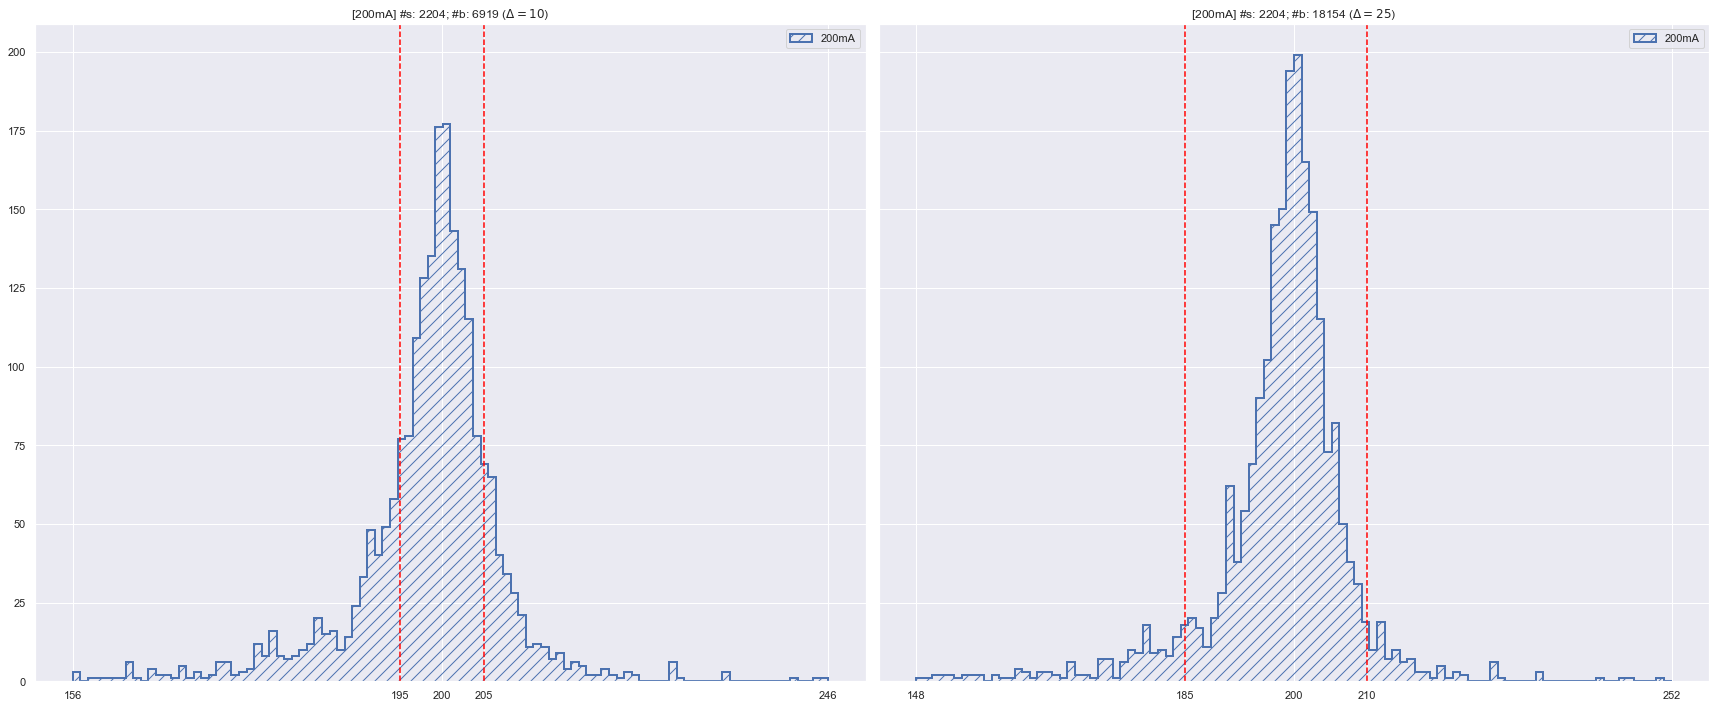

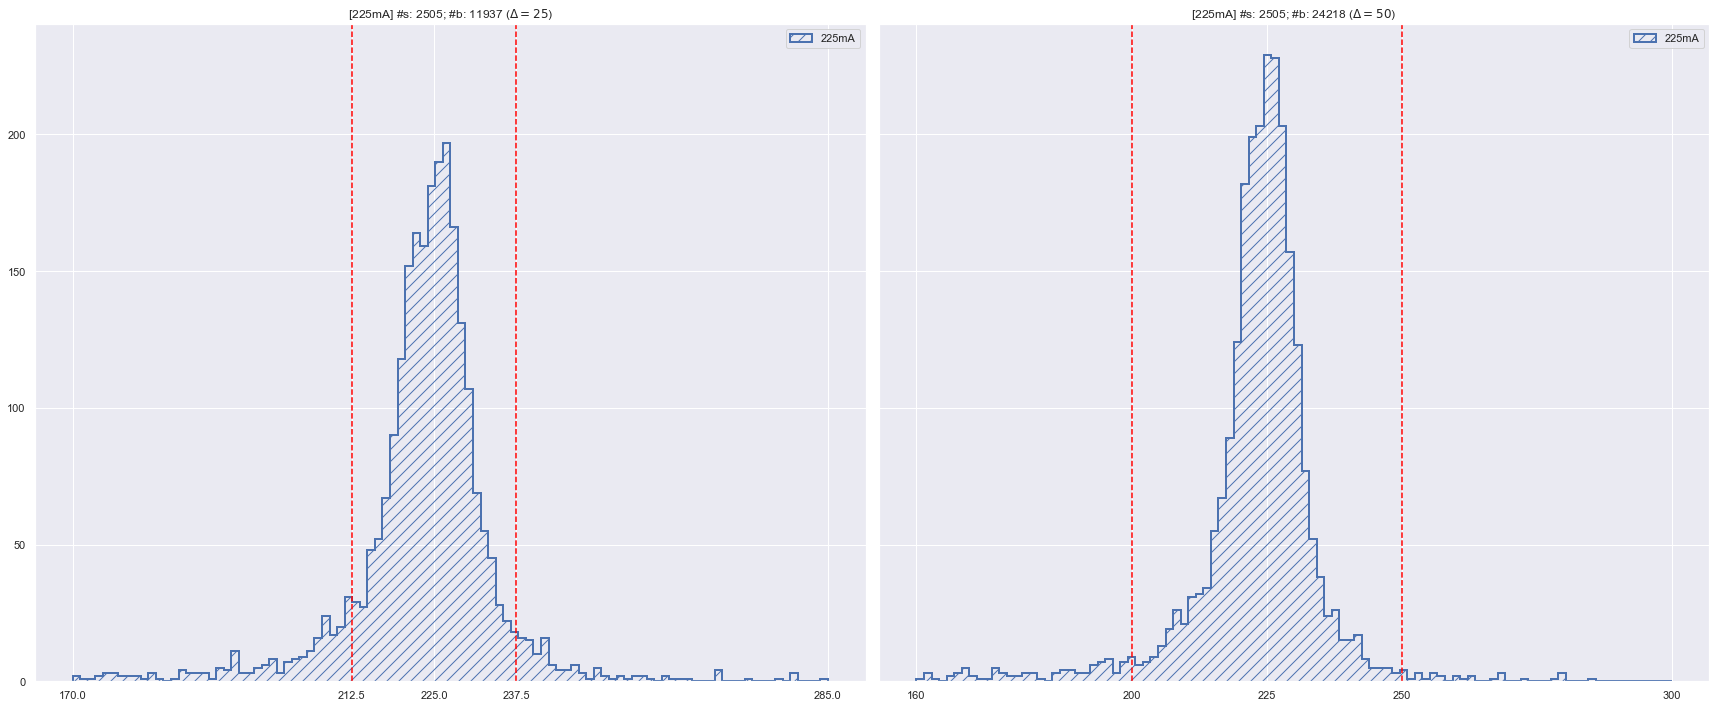

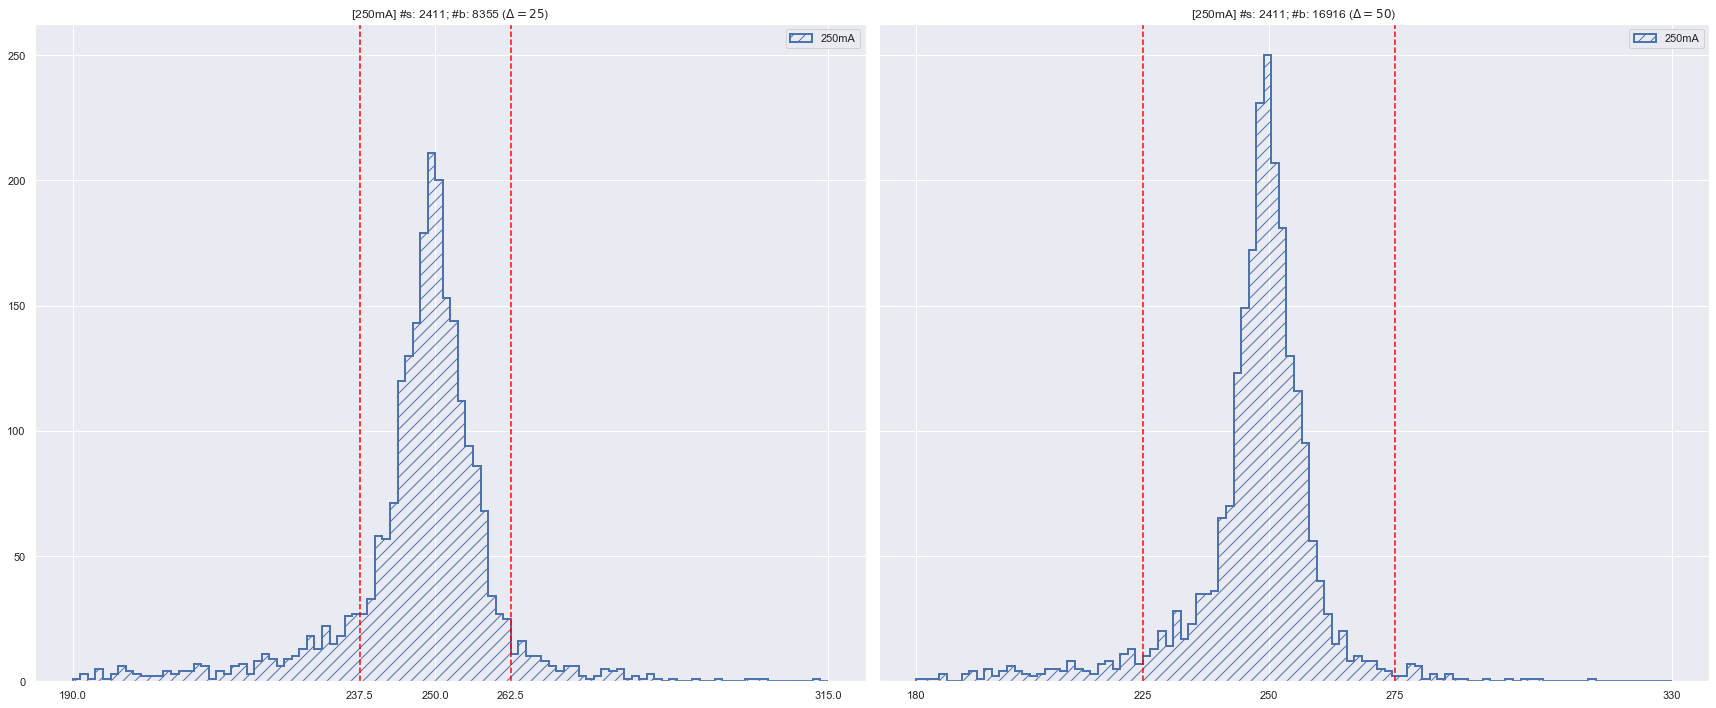

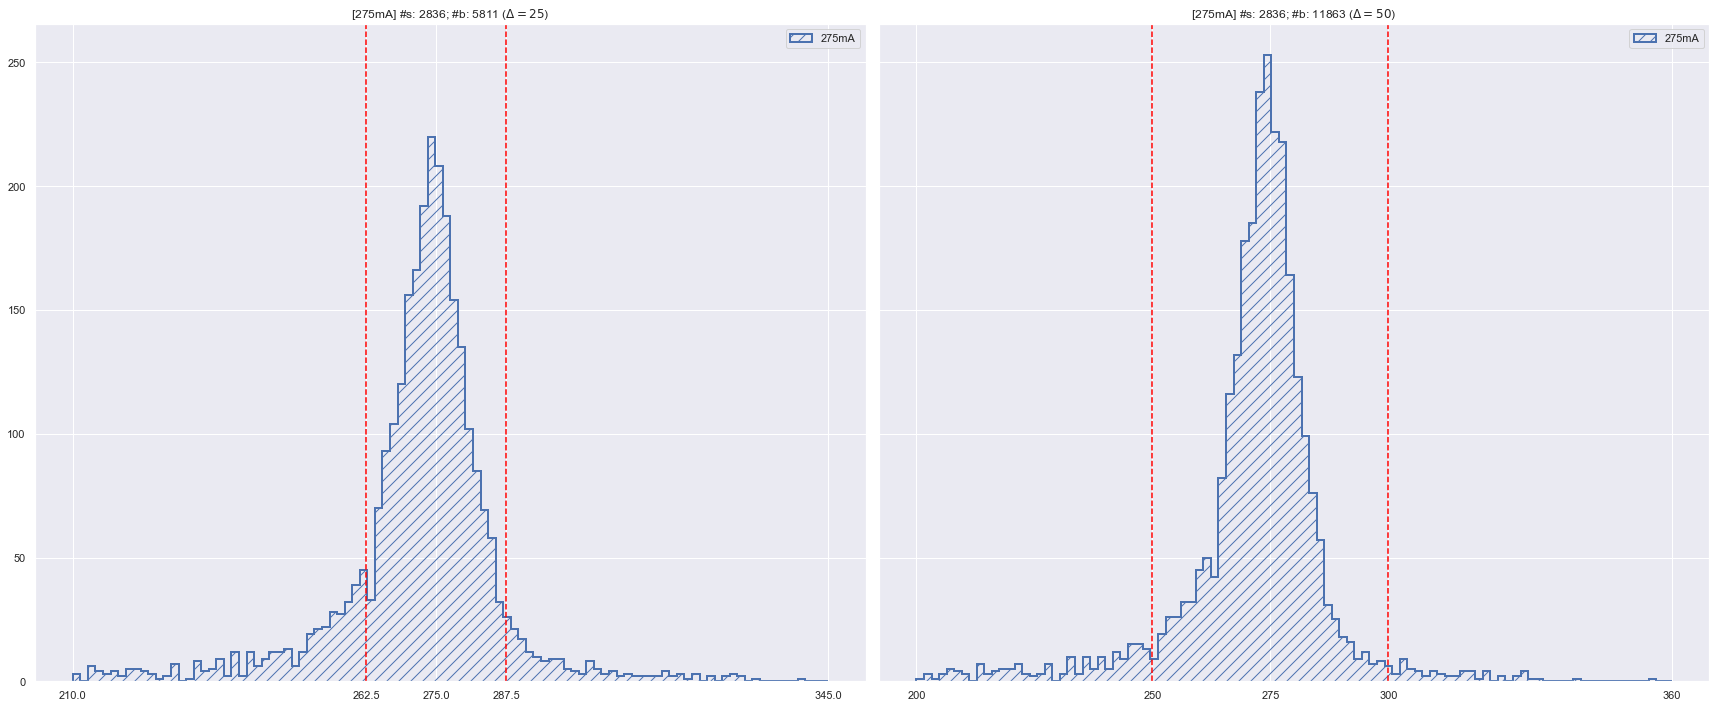

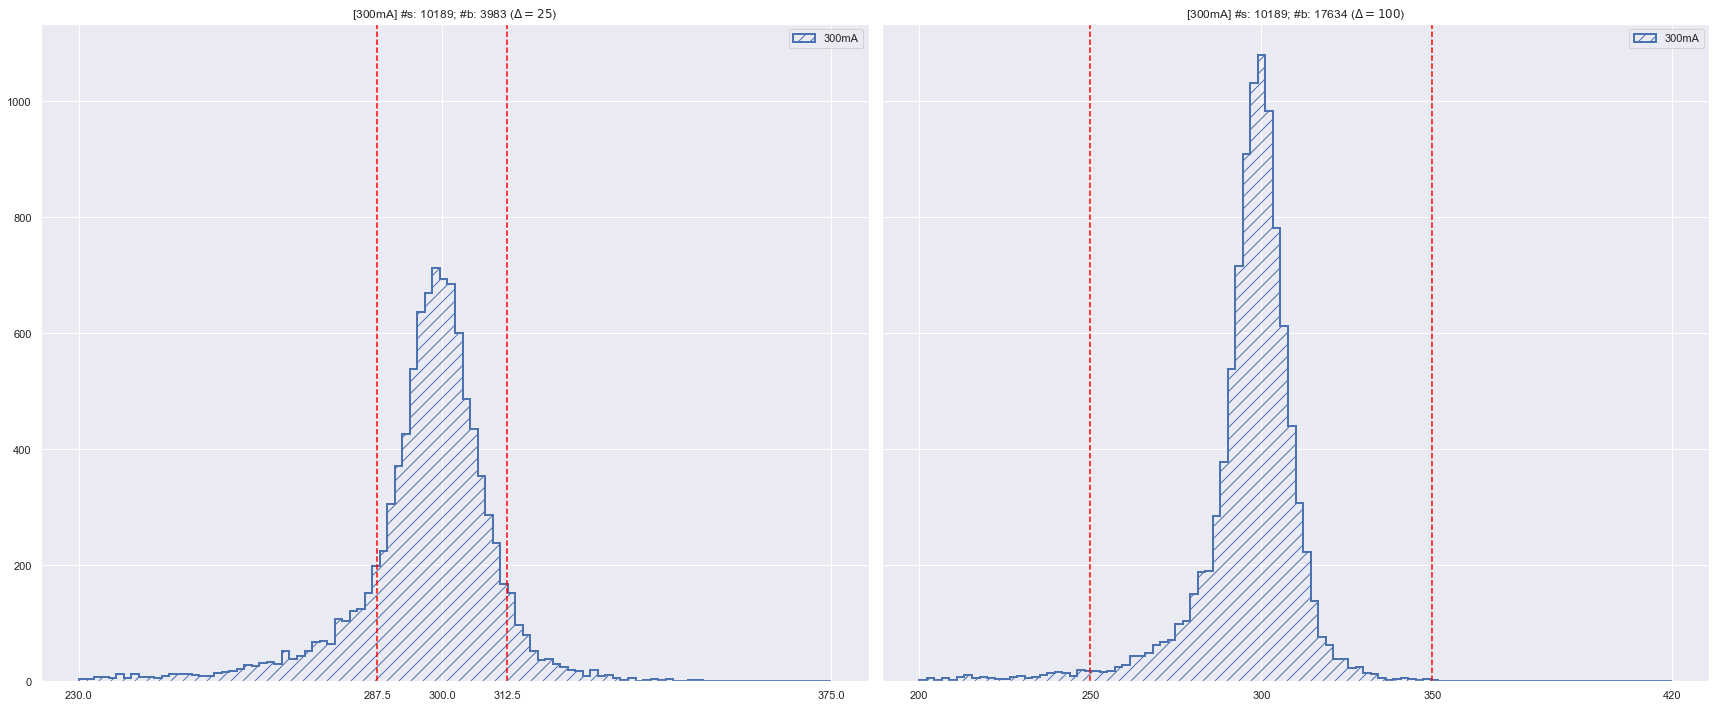

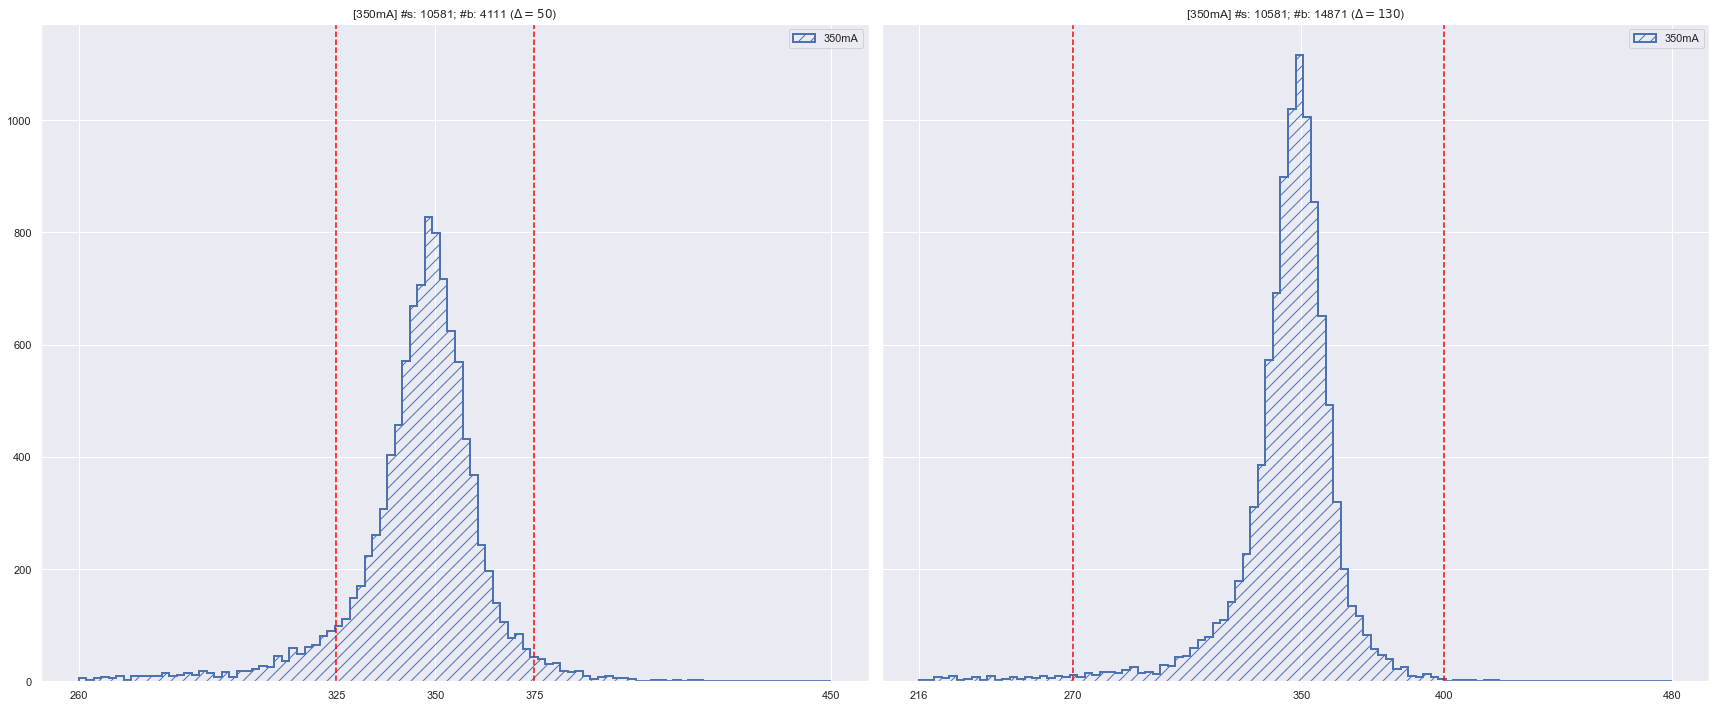

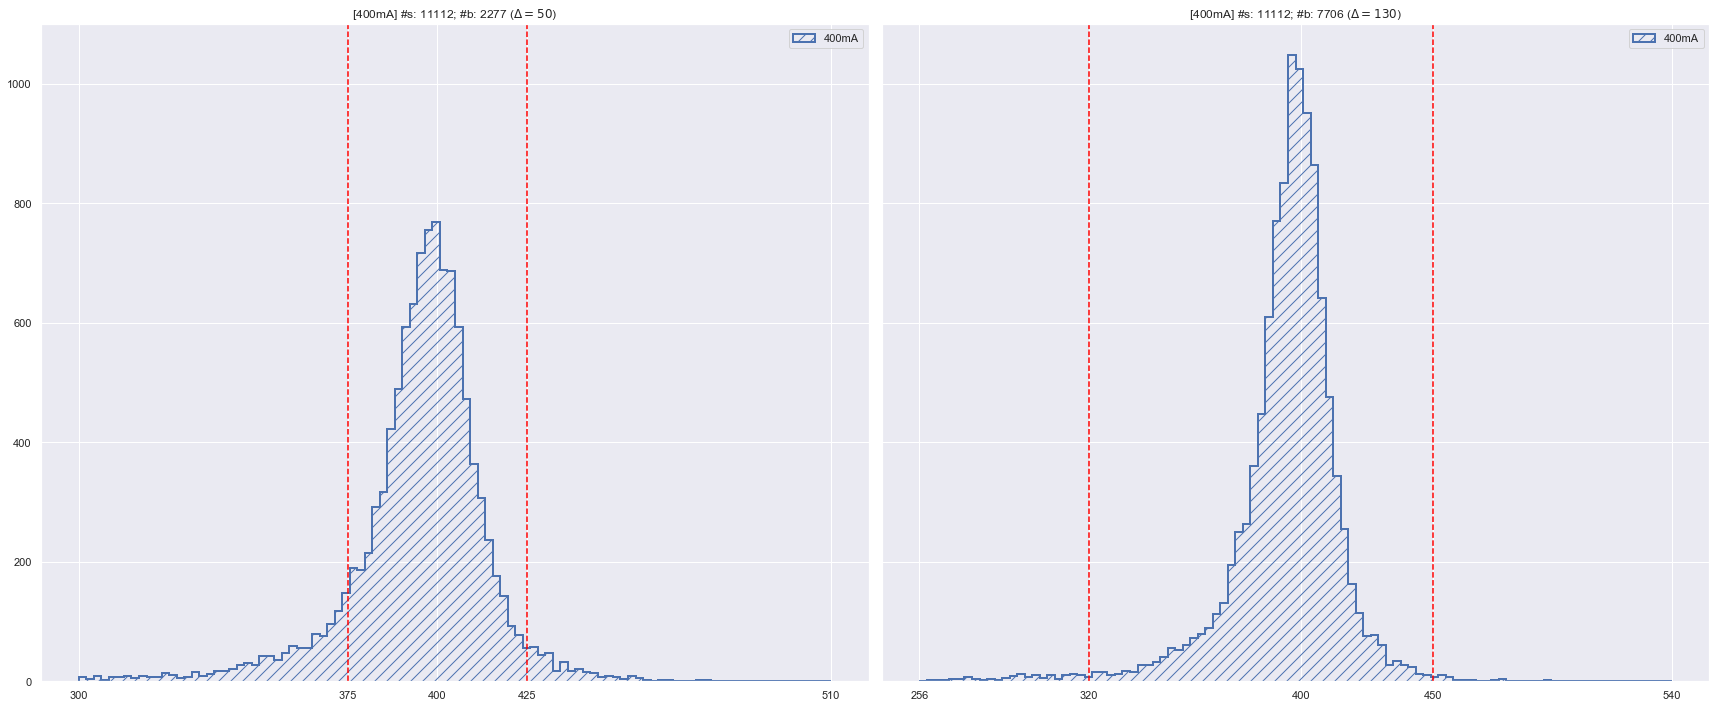

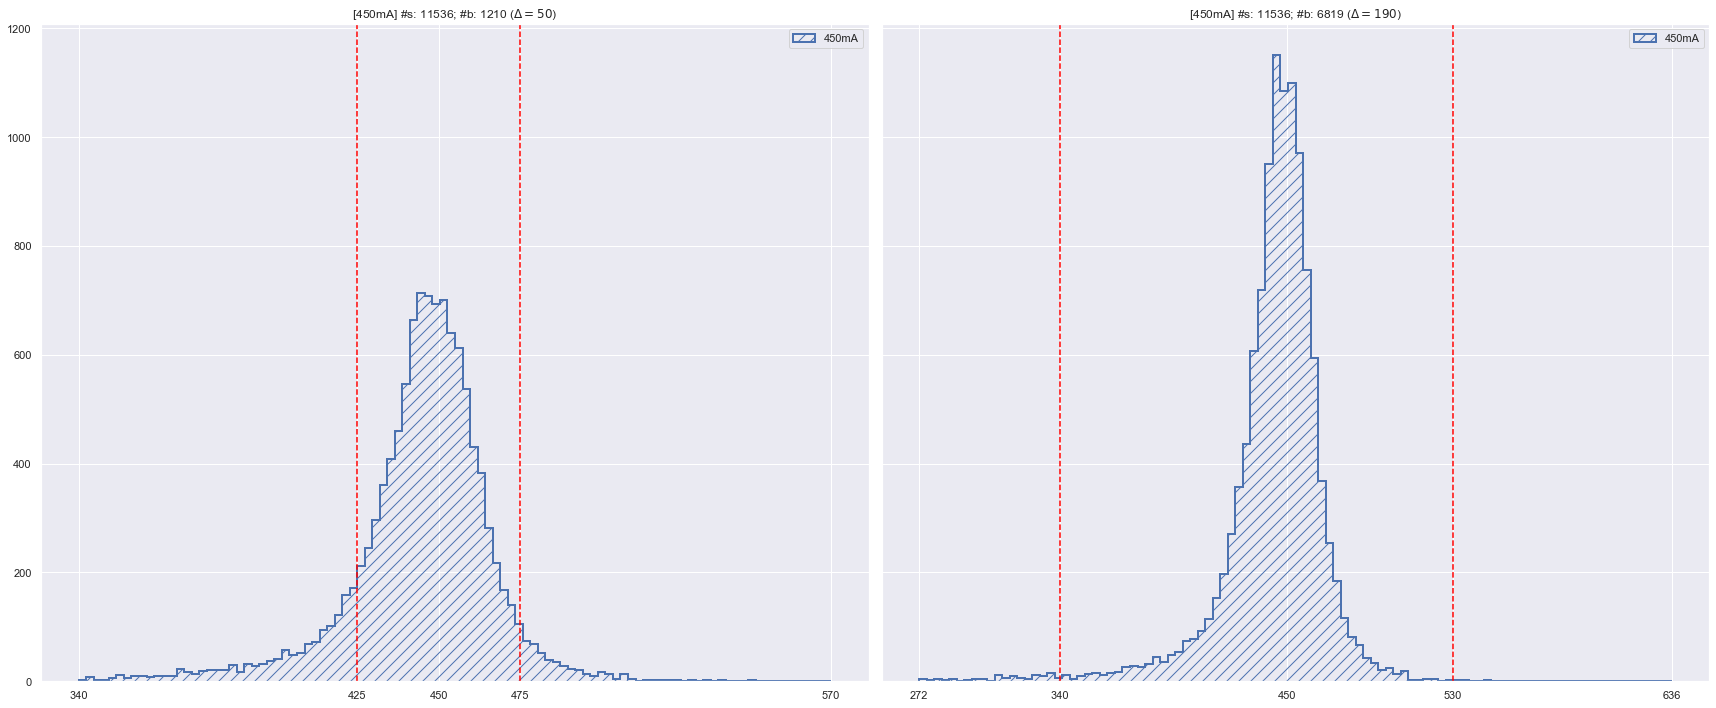

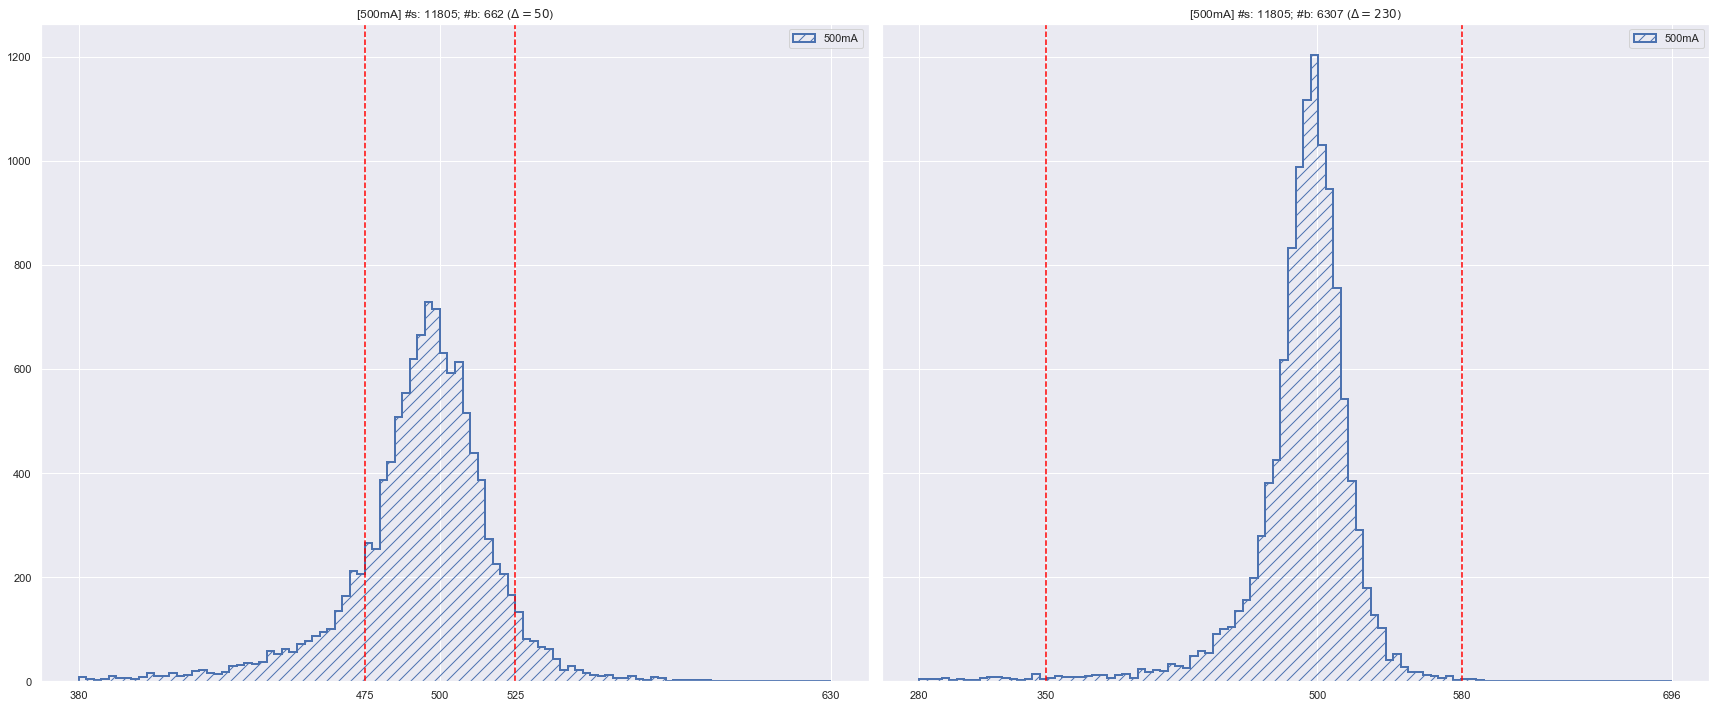

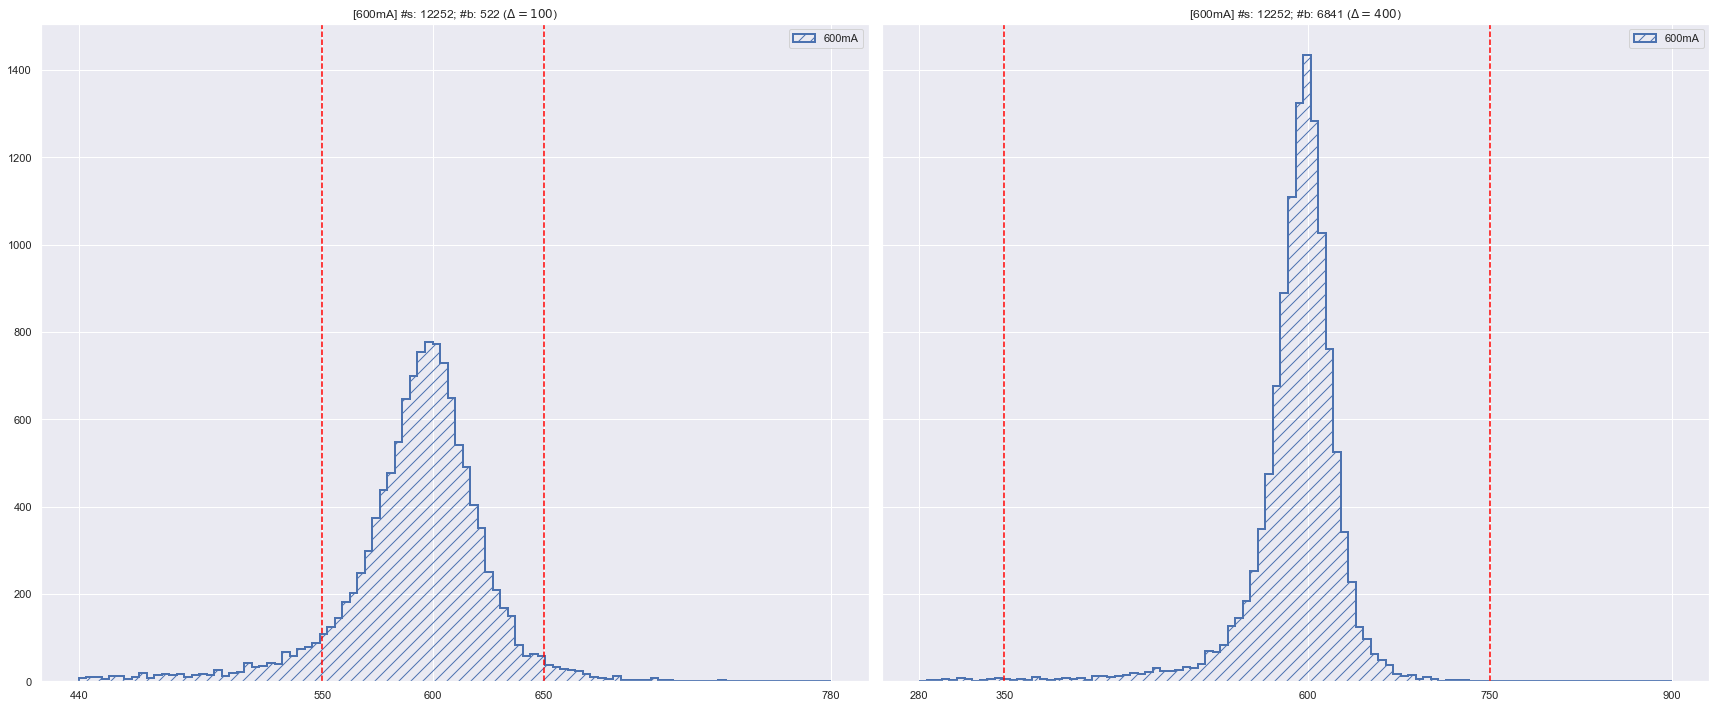

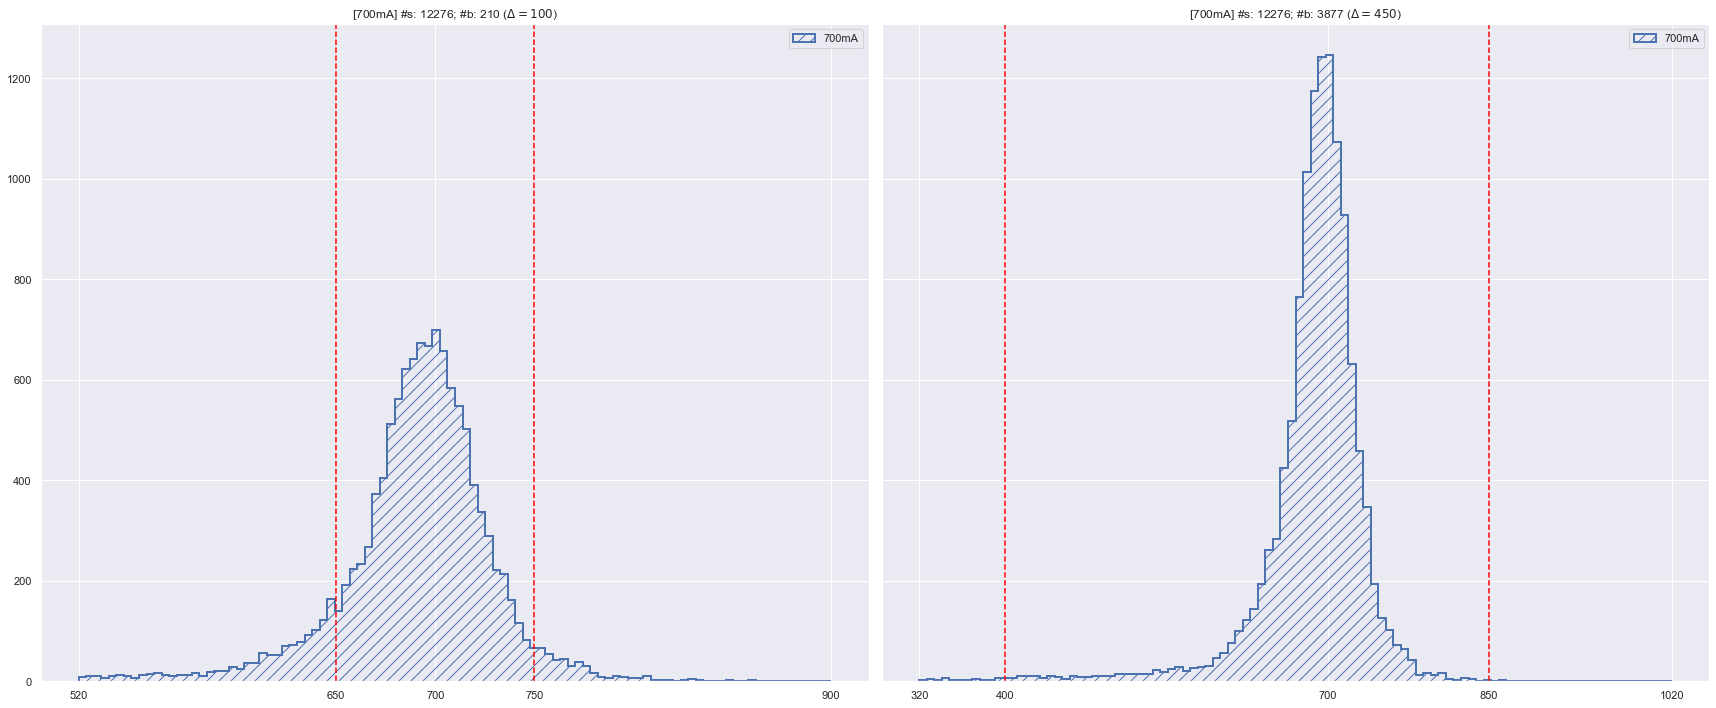

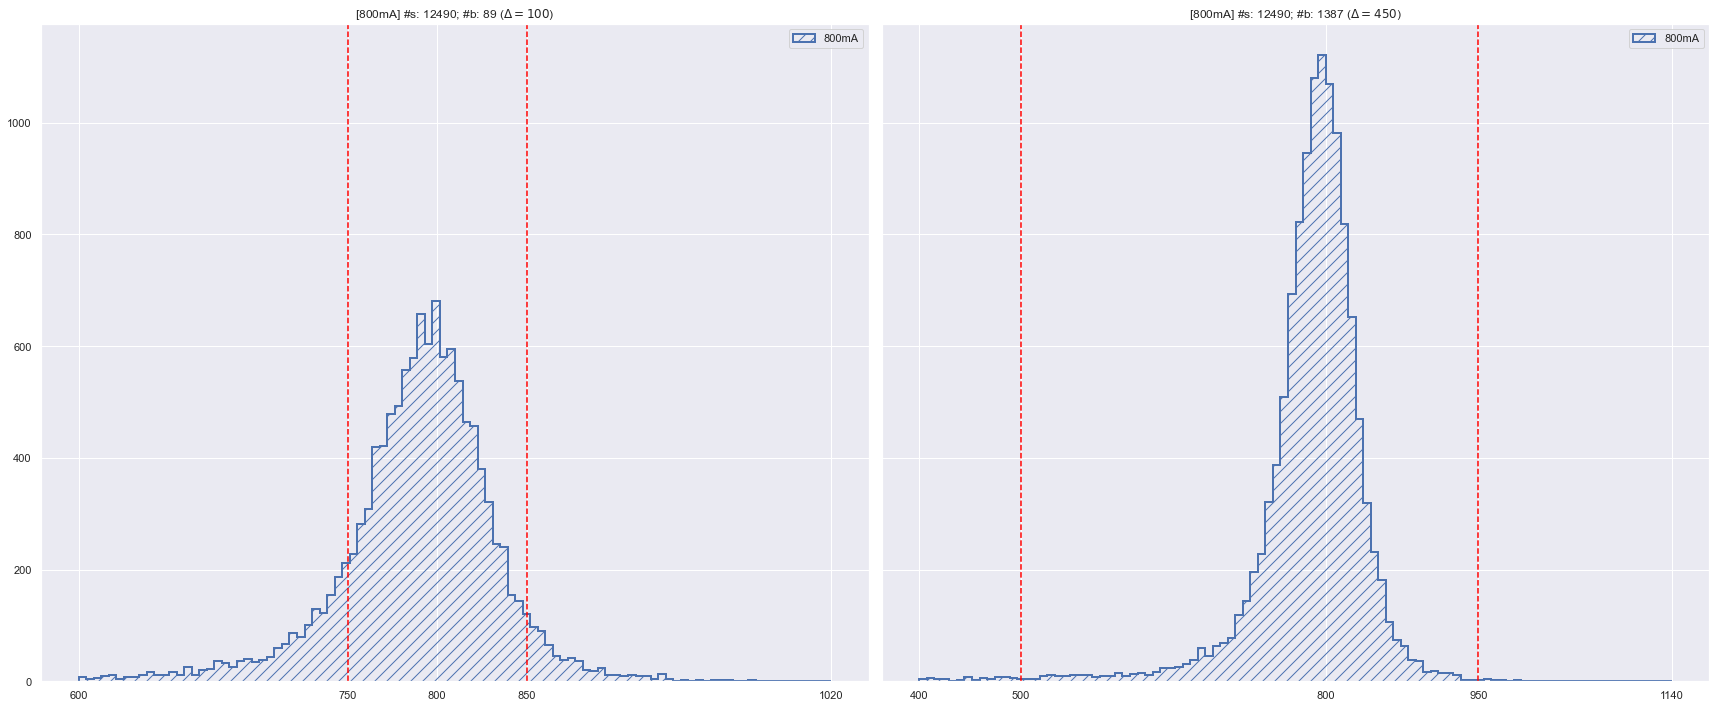

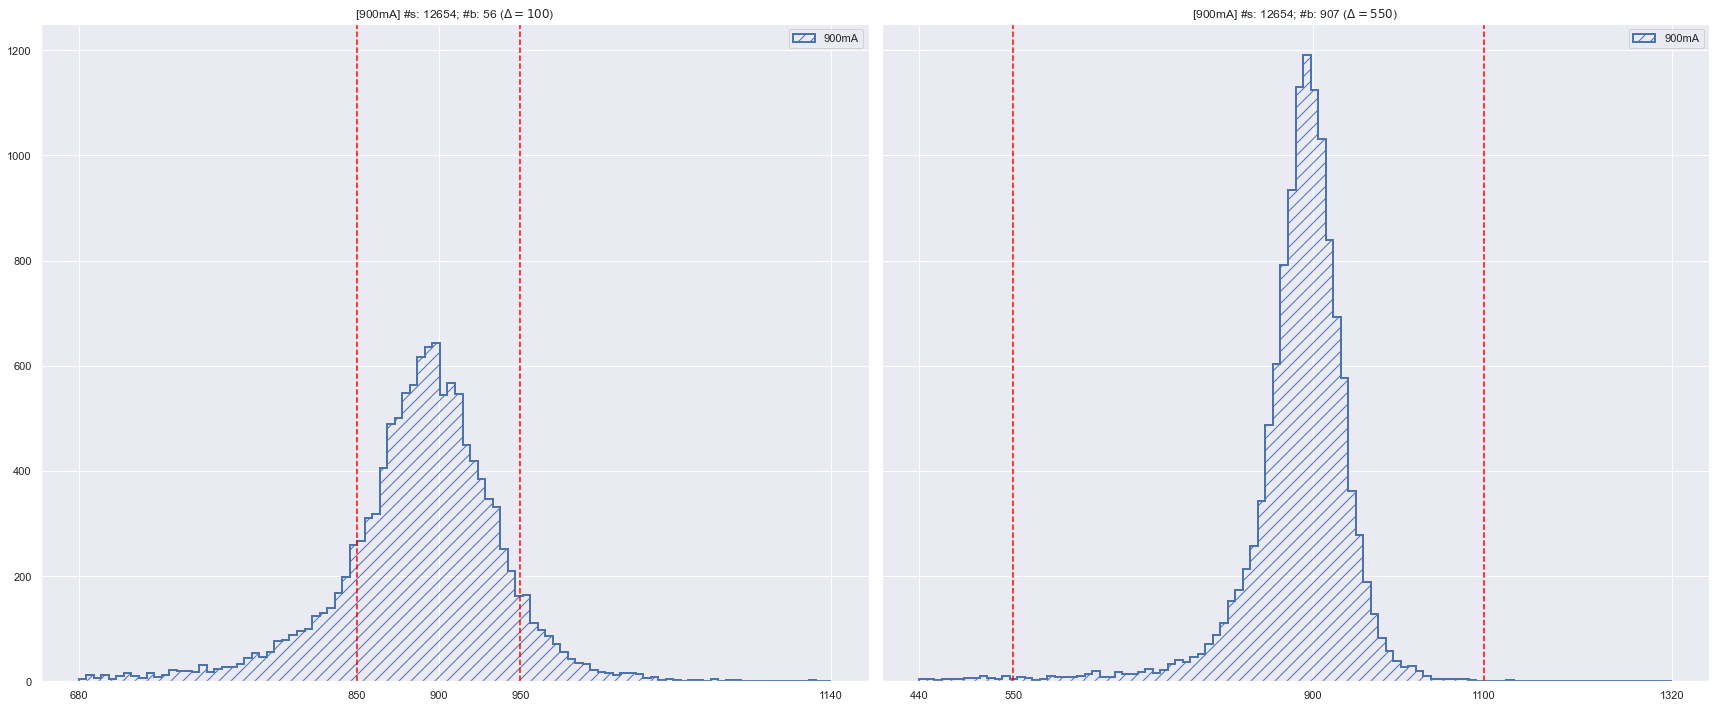

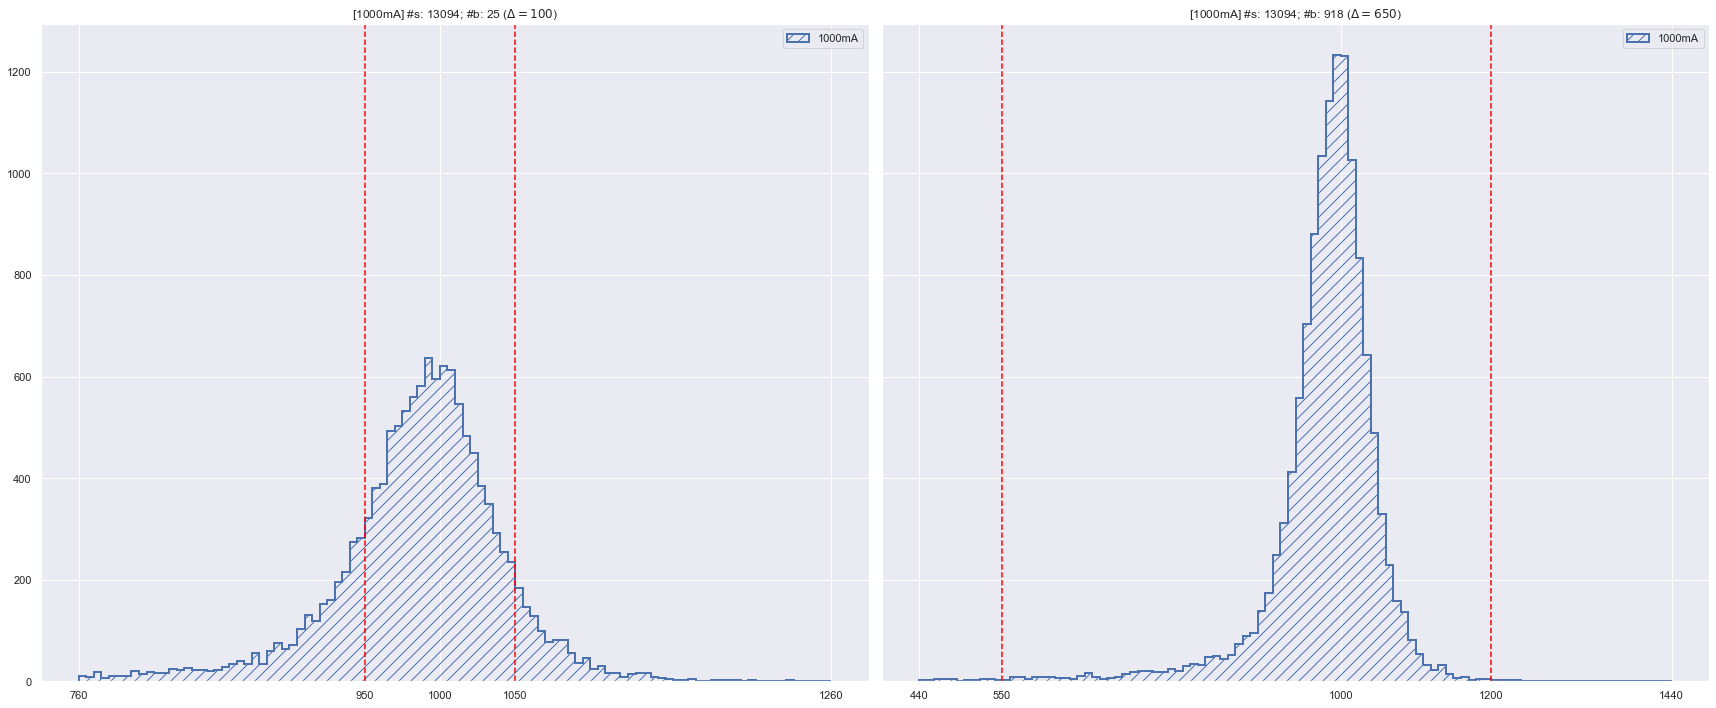

In [83]:
plot_intervals(s_test, b_test, intervals=(Benchmark.DISJOINT_INTERVALS, Benchmark.INTERVALS), 
               sharey=True)

In [84]:
test = Benchmark()
test.load(None, signal=s_test, bkg=b_test, features=VARS + ['dimuon_pt'])

loading...
dataset loaded.


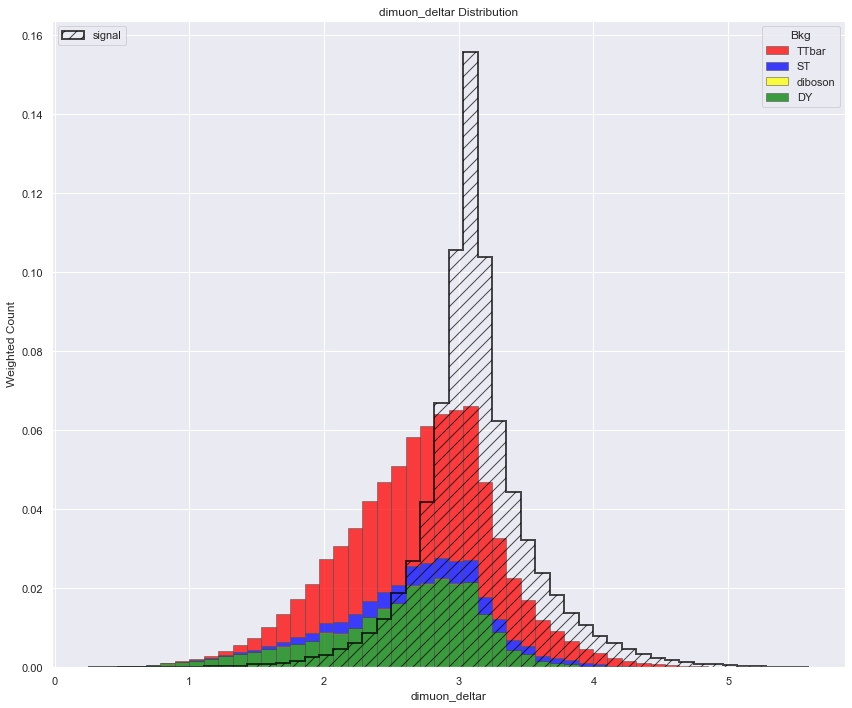

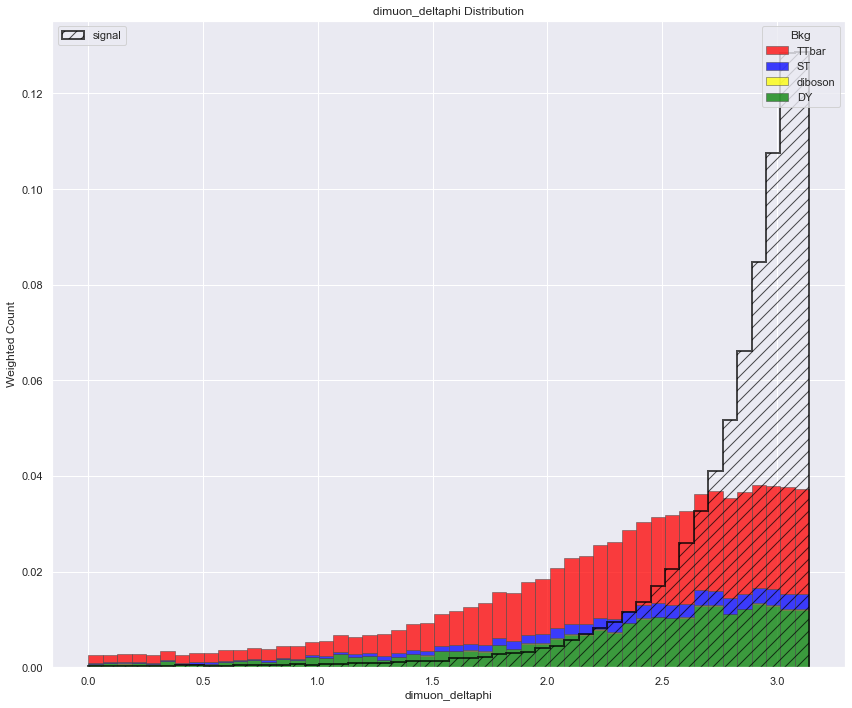

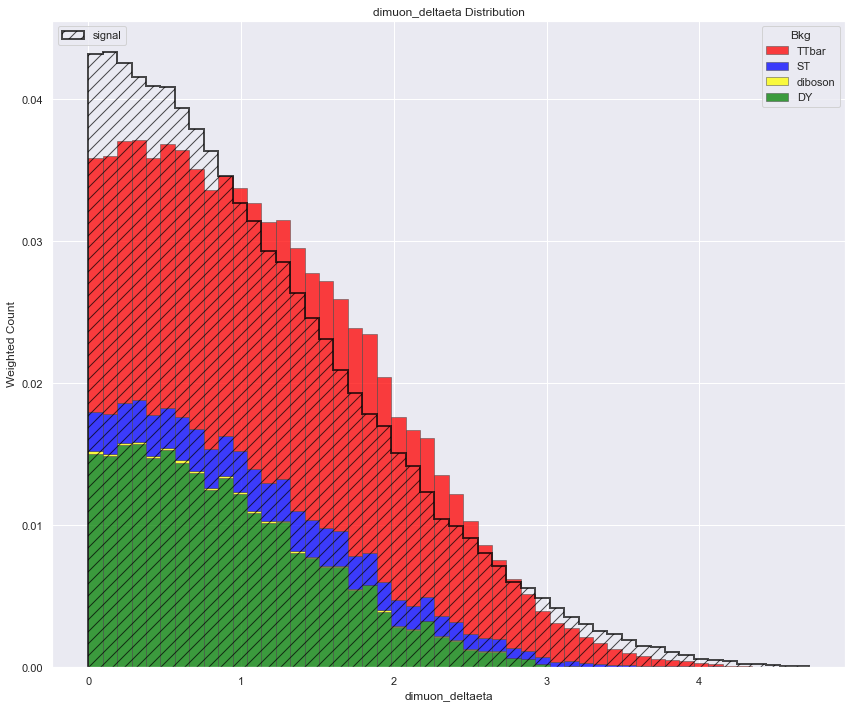

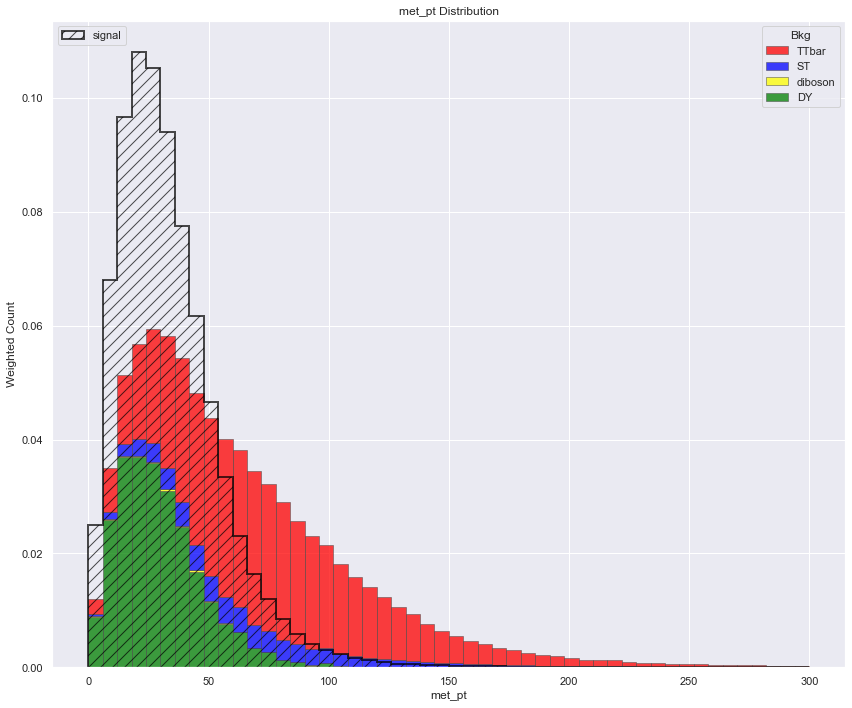

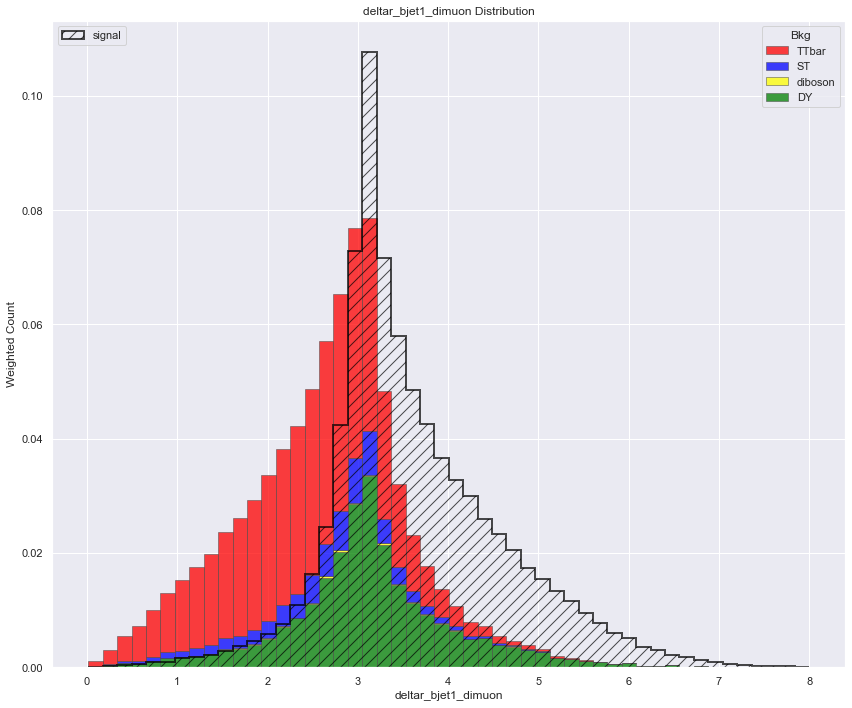

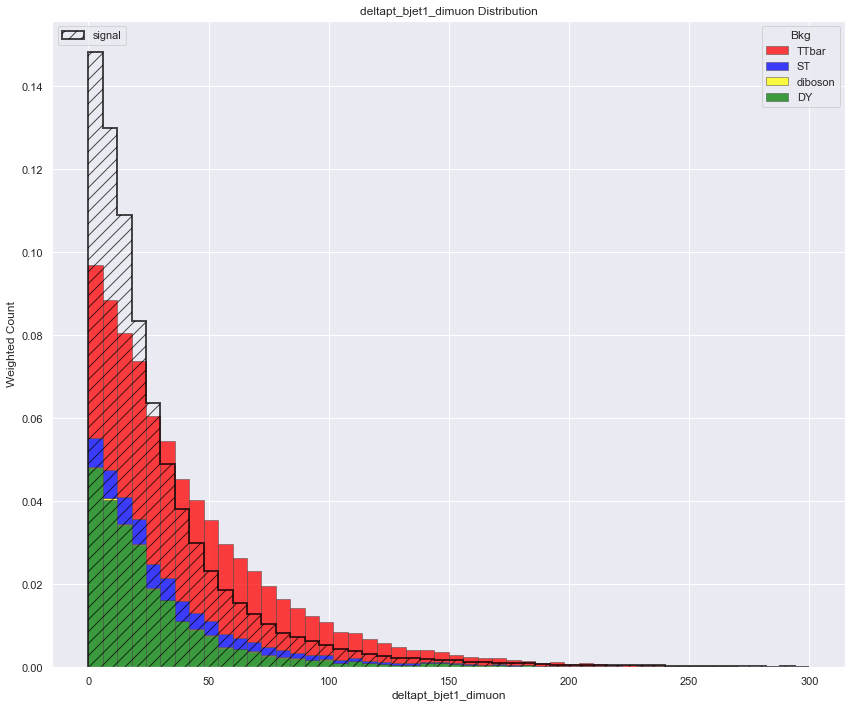

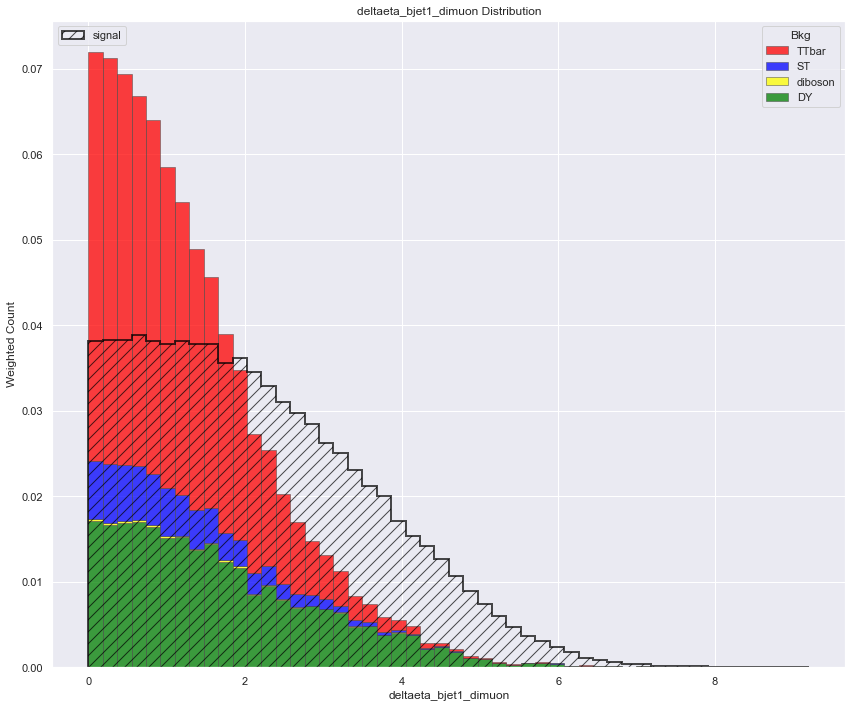

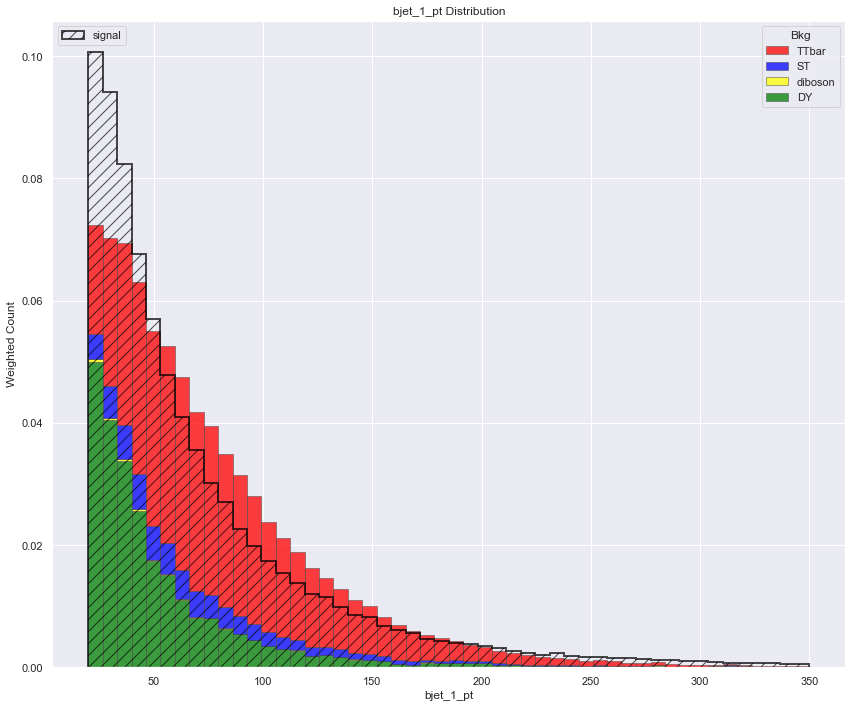

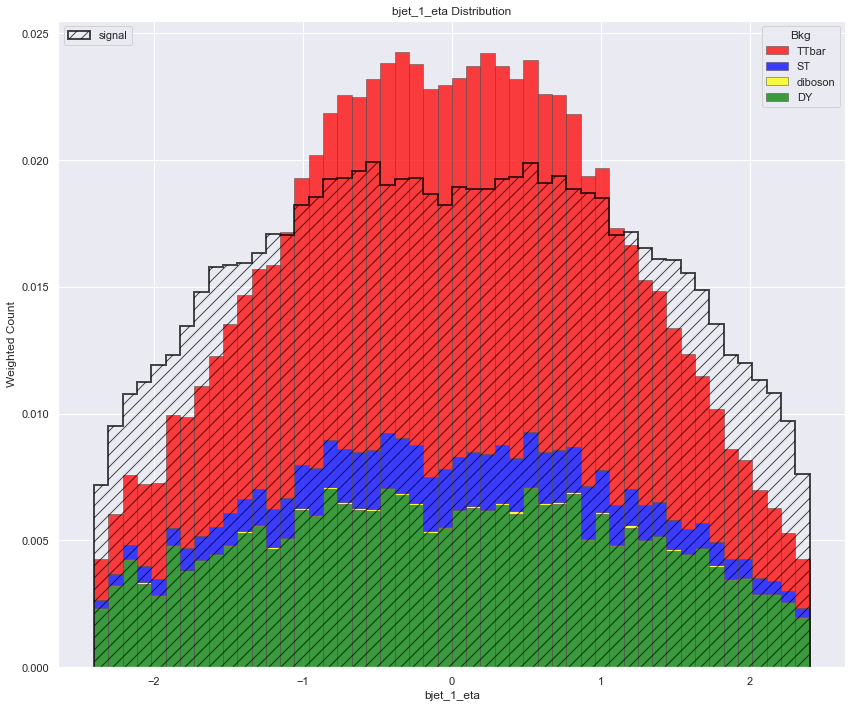

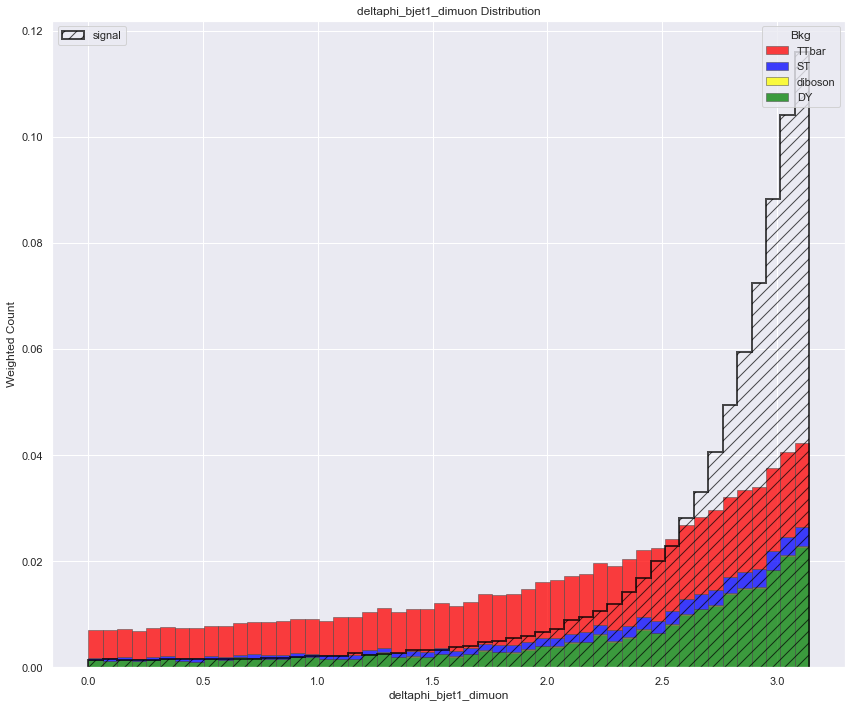

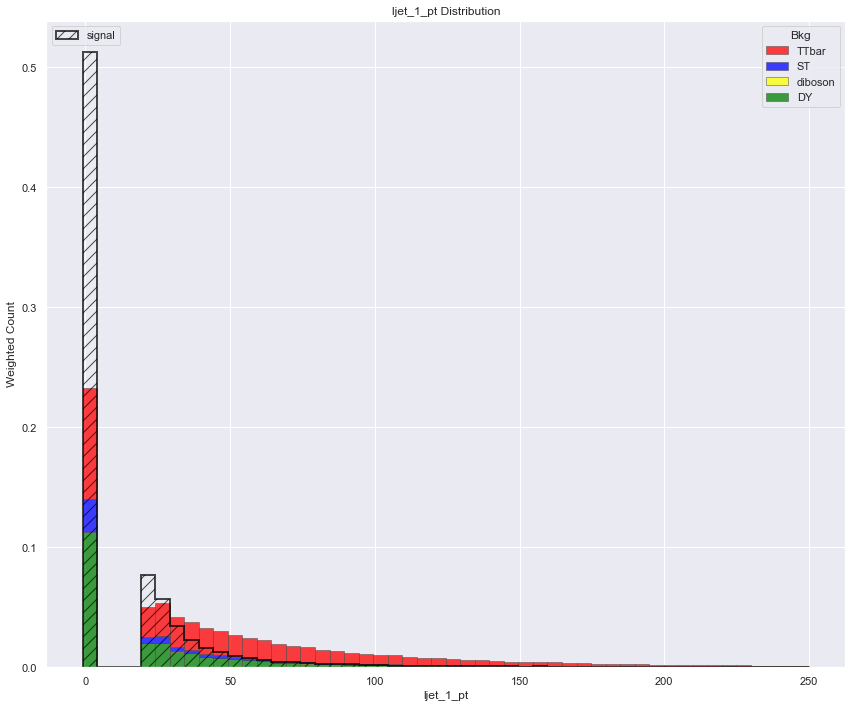

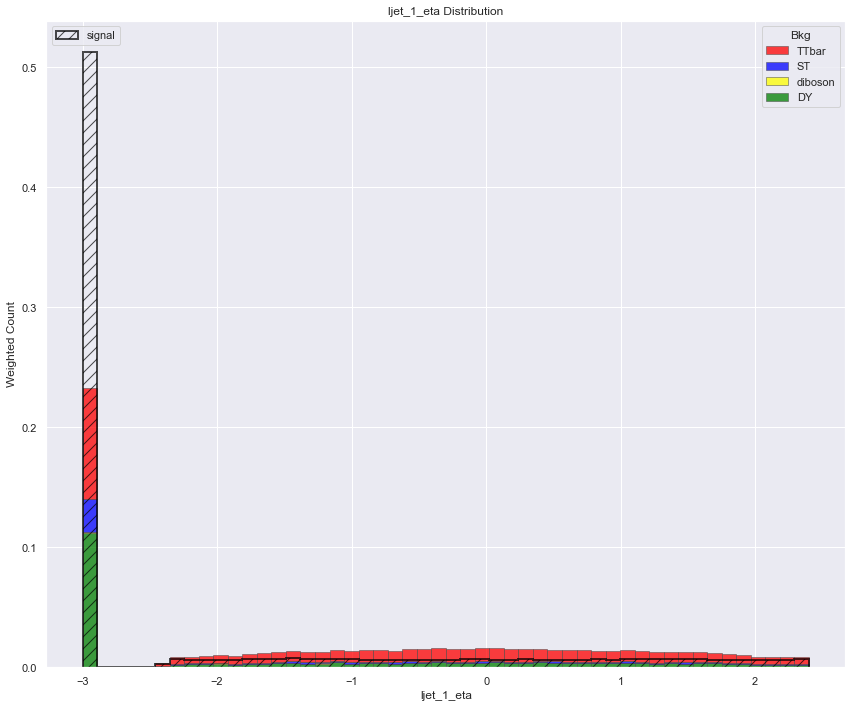

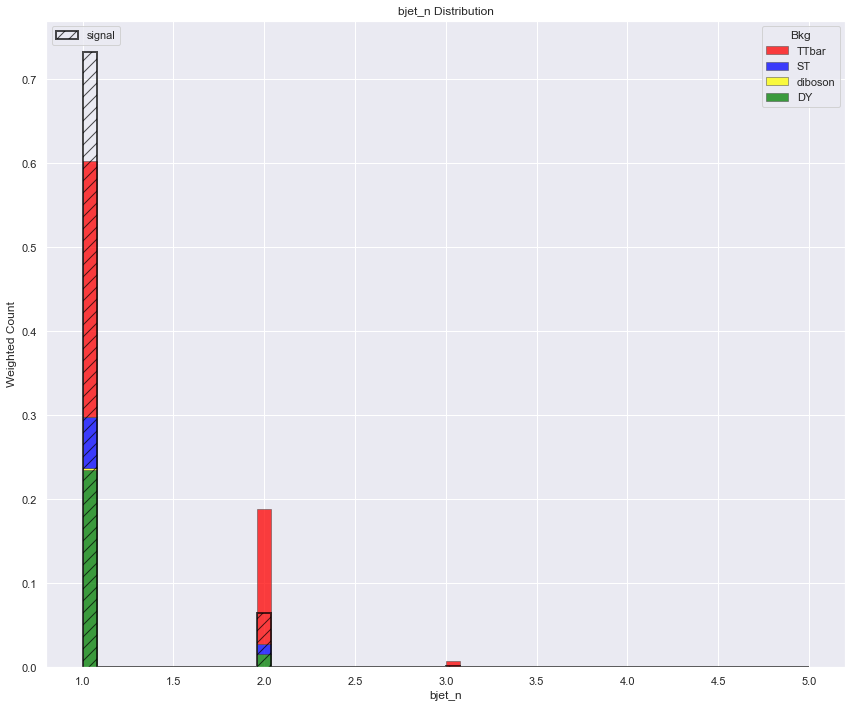

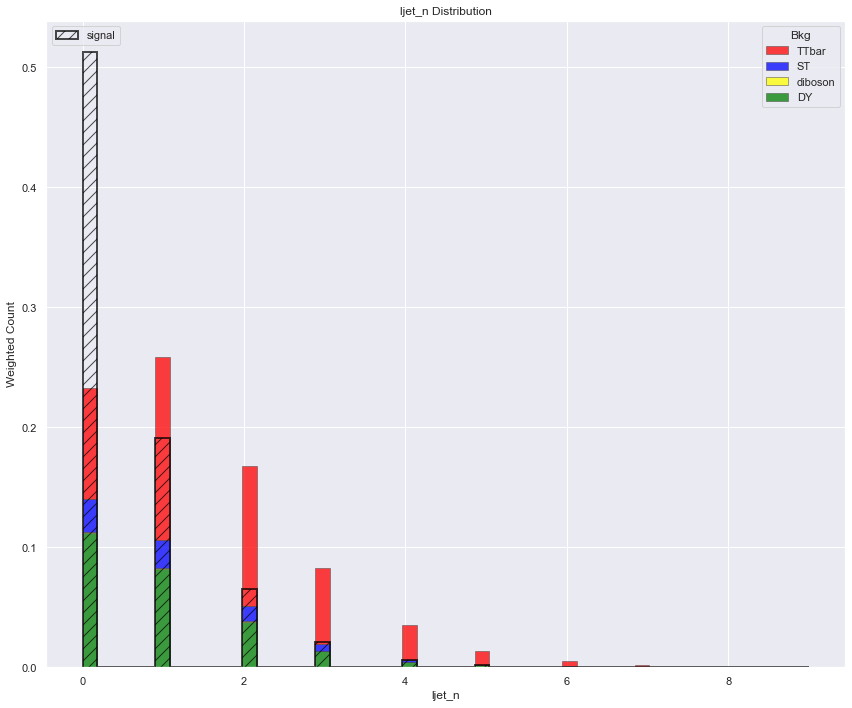

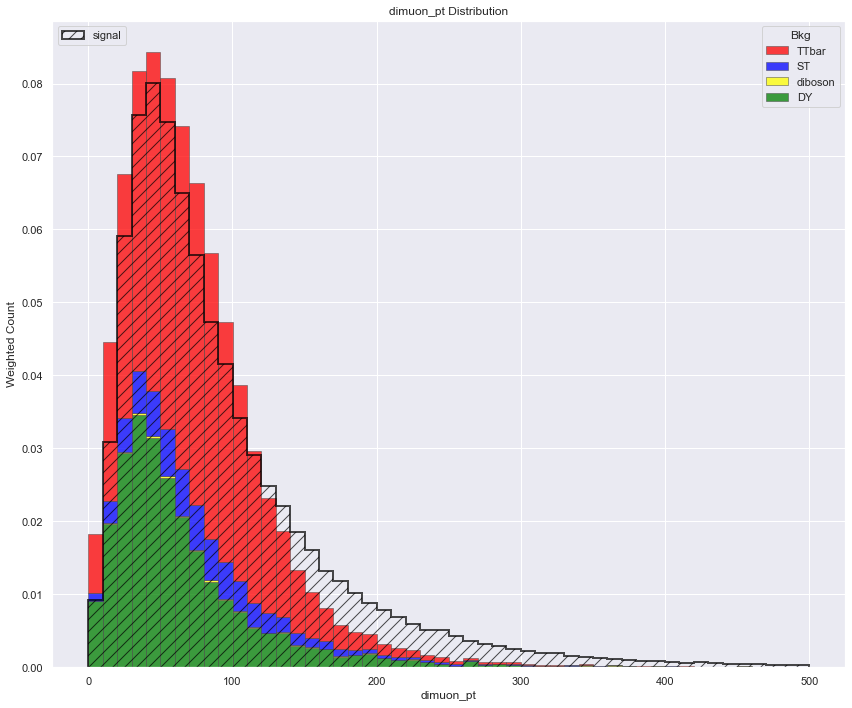

In [85]:
# variable plot on all data and mA
for var in VARS + ['dimuon_pt']:
    limit = 500
    
    if var in ['met_pt', 'deltapt_bjet1_dimuon']:
        limit = 300
    
    elif var == 'ljet_1_pt':
        limit = 250
    
    elif var == 'bjet_1_pt':
        limit = 350
    
    elif var == 'deltar_bjet1_dimuon':
        limit = 8
    
    elif var == 'bjet_n':
        limit = 5
    
    elif var == 'ljet_n':
        limit = 9
    
    cms.plot.var(test, variable=var, bins=50, max_limit=limit)

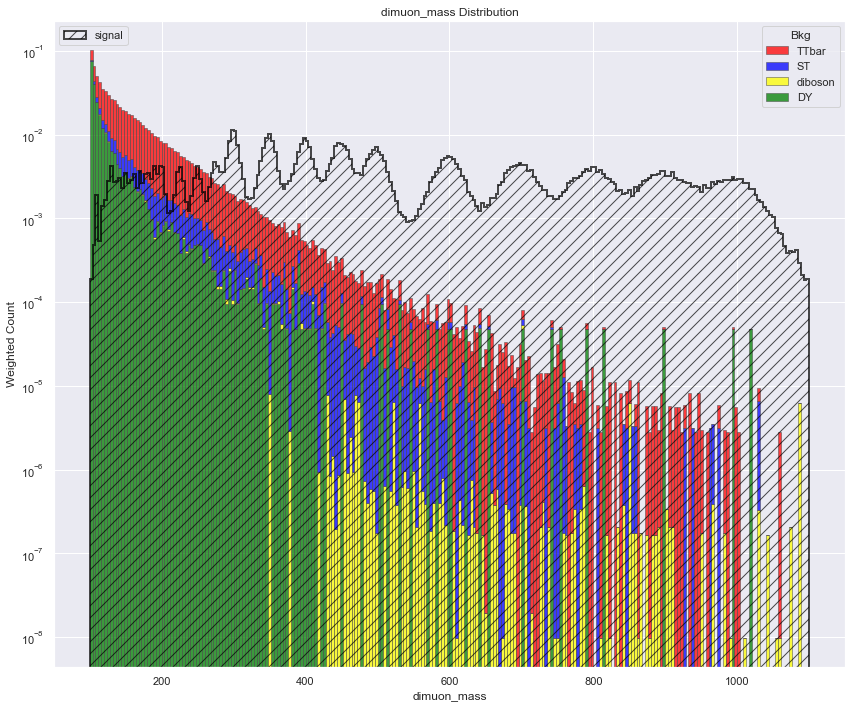

In [86]:
cms.plot.var(test, variable='dimuon_mass', bins=250, min_limit=100, max_limit=1100, y_scale='log')

In [96]:
# write to disk (test-set)
s_test.to_csv('data/benchmark/signal_bassociated_test.csv', index=False)
b_test.to_csv('data/benchmark/background_test.csv', index=False)

# train-set
s.loc[s.index.difference(s_test.index)].to_csv('data/benchmark/signal_bassociated_train.csv', index=False)
b.loc[b.index.difference(b_test.index)].to_csv('data/benchmark/background_train.csv', index=False)

---